In [1]:
from IPython.display import display; from IPython.display import HTML; import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)
# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)
# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

In [2]:
import numpy as np; import pandas as pd; from __future__ import division 
import matplotlib as mpl; import matplotlib.pyplot as plt; 
%matplotlib inline
import seaborn as sns
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap
#matplotlib.__version__

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
# Wildtype
#  AP   (9) - FK503, FK504, FK536, FK537, FK544, FKalb177, FKalb179, FKalb202, FKalb230
#  Sham (7) - FK502, FK534, FK535, FK545, FKalb180, FKalb205, FKalb229

# KMO null
#  AP (8)   - K1179, K1181, K1222, K1225, K1246, K1248, K1261, K1262 [K1217(exluded-surgical fail)]
#  Sham (7) - K1180, K1216, K1223, K1224, K1247, K1263, K1264

# KMO alb-cre
#  AP (10)   - Acre226, Acre235, Acre238, Acre241, Acre244, Acre246, Acre265, Acre272, Acre280, Acre281
#  Sham (7) - Acre227, Acre234, Acre243, Acre252, Acre253, Acre270, Acre282

In [4]:
dfFK502 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/FK502/FK502.csv')
df1FK502 = dfFK502.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1FK502.datetime = pd.to_datetime(df1FK502.datetime, dayfirst=True)
df1FK502.ZT0 = pd.to_datetime(df1FK502.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_FK502 = df1FK502['act'].expanding(min_periods=1).sum()
ActSum_FK502.name = 'sumAct'
ActHund_FK502 = df1FK502['act']/100
ActHund_FK502.name = 'actHund'
#Create column with ZT
tXFK502 = df1FK502.datetime; tYFK502 = df1FK502.ZT0
deltaZTFK502 = tXFK502 - tYFK502
ZTFK502 = deltaZTFK502 / np.timedelta64(1, 'h')
ZTFK502.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2FK502 = pd.concat([df1FK502, ActSum_FK502, ZTFK502, ActHund_FK502], axis=1)
df3FK502 = df2FK502.drop(['ZT0'], axis=1)
df4FK502 = df3FK502.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfFK502 = df3FK502.set_index('datetime')
df_tempFK502 = DTindexdfFK502['temp']
df_actFK502 = DTindexdfFK502['act']
df_ActSum_FK502 = DTindexdfFK502['sumAct']
df_actHundFK502 = DTindexdfFK502['actHund']
df_ZTFK502 = DTindexdfFK502['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1FK502 = df_tempFK502.resample('60min').mean()
s2FK502 = df_actFK502.resample('60min').sum()
s3FK502 = df_actHundFK502.resample('60min').sum()
s4FK502 = df_ActSum_FK502.resample('60min').last()
s5FK502 = df_ZTFK502.resample('60min').first()
df5FK502 = pd.concat([s1FK502, s2FK502, s3FK502, s4FK502, s5FK502], axis=1); df5FK502.insert(3, 'Exp', 'Sham'); df5FK502.insert(4, 'ID', 'FK502')
df5FK502.head(3)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-02-09 13:00:00,36.207000,3061,30.61,Sham,FK502,3061.0,0.0
2016-02-09 14:00:00,36.773833,2415,24.15,Sham,FK502,5476.0,1.0
2016-02-09 15:00:00,36.926333,1705,17.05,Sham,FK502,7181.0,2.0


In [5]:
dfFK503 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/FK503/FK503.csv')
df1FK503 = dfFK503.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1FK503.datetime = pd.to_datetime(df1FK503.datetime, dayfirst=True)
df1FK503.ZT0 = pd.to_datetime(df1FK503.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_FK503 = df1FK503['act'].expanding(min_periods=1).sum()
ActSum_FK503.name = 'sumAct'
ActHund_FK503 = df1FK503['act']/100
ActHund_FK503.name = 'actHund'
#Create column with ZT
tXFK503 = df1FK503.datetime; tYFK503 = df1FK503.ZT0
deltaZTFK503 = tXFK503 - tYFK503
ZTFK503 = deltaZTFK503 / np.timedelta64(1, 'h')
ZTFK503.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2FK503 = pd.concat([df1FK503, ActSum_FK503, ZTFK503, ActHund_FK503], axis=1)
df3FK503 = df2FK503.drop(['ZT0'], axis=1)
df4FK503 = df3FK503.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfFK503 = df3FK503.set_index('datetime')
df_tempFK503 = DTindexdfFK503['temp']
df_actFK503 = DTindexdfFK503['act']
df_ActSum_FK503 = DTindexdfFK503['sumAct']
df_actHundFK503 = DTindexdfFK503['actHund']
df_ZTFK503 = DTindexdfFK503['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1FK503 = df_tempFK503.resample('60min').mean()
s2FK503 = df_actFK503.resample('60min').sum()
s3FK503 = df_actHundFK503.resample('60min').sum()
s4FK503 = df_ActSum_FK503.resample('60min').last()
s5FK503 = df_ZTFK503.resample('60min').first()
df5FK503 = pd.concat([s1FK503, s2FK503, s3FK503, s4FK503, s5FK503], axis=1); df5FK503.insert(3, 'Exp', 'AP'); df5FK503.insert(4, 'ID', 'FK503')
df5FK503.head(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-02-09 13:00:00,36.318833,2368,23.68,AP,FK503,2368.0,0.0


In [6]:
dfFK504 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/FK504/FK504.csv')
df1FK504 = dfFK504.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1FK504.datetime = pd.to_datetime(df1FK504.datetime, dayfirst=True)
df1FK504.ZT0 = pd.to_datetime(df1FK504.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_FK504 = df1FK504['act'].expanding(min_periods=1).sum()
ActSum_FK504.name = 'sumAct'
ActHund_FK504 = df1FK504['act']/100
ActHund_FK504.name = 'actHund'
#Create column with ZT
tXFK504 = df1FK504.datetime; tYFK504 = df1FK504.ZT0
deltaZTFK504 = tXFK504 - tYFK504
ZTFK504 = deltaZTFK504 / np.timedelta64(1, 'h')
ZTFK504.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2FK504 = pd.concat([df1FK504, ActSum_FK504, ZTFK504, ActHund_FK504], axis=1)
df3FK504 = df2FK504.drop(['ZT0'], axis=1)
df4FK504 = df3FK504.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfFK504 = df3FK504.set_index('datetime')
df_tempFK504 = DTindexdfFK504['temp']
df_actFK504 = DTindexdfFK504['act']
df_ActSum_FK504 = DTindexdfFK504['sumAct']
df_actHundFK504 = DTindexdfFK504['actHund']
df_ZTFK504 = DTindexdfFK504['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1FK504 = df_tempFK504.resample('60min').mean()
s2FK504 = df_actFK504.resample('60min').sum()
s3FK504 = df_actHundFK504.resample('60min').sum()
s4FK504 = df_ActSum_FK504.resample('60min').last()
s5FK504 = df_ZTFK504.resample('60min').first()
df5FK504 = pd.concat([s1FK504, s2FK504, s3FK504, s4FK504, s5FK504], axis=1); df5FK504.insert(3, 'Exp', 'AP'); df5FK504.insert(4, 'ID', 'FK504')
df5FK504.head(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-02-09 13:00:00,35.2545,2685,26.85,AP,FK504,2685.0,0.0


In [7]:
dfFK534 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/FK534/FK534.csv')
df1FK534 = dfFK534.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1FK534.datetime = pd.to_datetime(df1FK534.datetime, dayfirst=True)
df1FK534.ZT0 = pd.to_datetime(df1FK534.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_FK534 = df1FK534['act'].expanding(min_periods=1).sum()
ActSum_FK534.name = 'sumAct'
ActHund_FK534 = df1FK534['act']/100
ActHund_FK534.name = 'actHund'
#Create column with ZT
tXFK534 = df1FK534.datetime; tYFK534 = df1FK534.ZT0
deltaZTFK534 = tXFK534 - tYFK534
ZTFK534 = deltaZTFK534 / np.timedelta64(1, 'h')
ZTFK534.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2FK534 = pd.concat([df1FK534, ActSum_FK534, ZTFK534, ActHund_FK534], axis=1)
df3FK534 = df2FK534.drop(['ZT0'], axis=1)
df4FK534 = df3FK534.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfFK534 = df3FK534.set_index('datetime')
df_tempFK534 = DTindexdfFK534['temp']
df_actFK534 = DTindexdfFK534['act']
df_ActSum_FK534 = DTindexdfFK534['sumAct']
df_actHundFK534 = DTindexdfFK534['actHund']
df_ZTFK534 = DTindexdfFK534['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1FK534 = df_tempFK534.resample('60min').mean()
s2FK534 = df_actFK534.resample('60min').sum()
s3FK534 = df_actHundFK534.resample('60min').sum()
s4FK534 = df_ActSum_FK534.resample('60min').last()
s5FK534 = df_ZTFK534.resample('60min').first()
df5FK534 = pd.concat([s1FK534, s2FK534, s3FK534, s4FK534, s5FK534], axis=1); df5FK534.insert(3, 'Exp', 'Sham'); df5FK534.insert(4, 'ID', 'FK534')
df5FK534.head(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-05-31 13:00:00,37.253167,2768,27.68,Sham,FK534,2768.0,0.0


In [8]:
dfFK535 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/FK535/FK535.csv')
df1FK535 = dfFK535.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1FK535.datetime = pd.to_datetime(df1FK535.datetime, dayfirst=True)
df1FK535.ZT0 = pd.to_datetime(df1FK535.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_FK535 = df1FK535['act'].expanding(min_periods=1).sum()
ActSum_FK535.name = 'sumAct'
ActHund_FK535 = df1FK535['act']/100
ActHund_FK535.name = 'actHund'
#Create column with ZT
tXFK535 = df1FK535.datetime; tYFK535 = df1FK535.ZT0
deltaZTFK535 = tXFK535 - tYFK535
ZTFK535 = deltaZTFK535 / np.timedelta64(1, 'h')
ZTFK535.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2FK535 = pd.concat([df1FK535, ActSum_FK535, ZTFK535, ActHund_FK535], axis=1)
df3FK535 = df2FK535.drop(['ZT0'], axis=1)
df4FK535 = df3FK535.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfFK535 = df3FK535.set_index('datetime')
df_tempFK535 = DTindexdfFK535['temp']
df_actFK535 = DTindexdfFK535['act']
df_ActSum_FK535 = DTindexdfFK535['sumAct']
df_actHundFK535 = DTindexdfFK535['actHund']
df_ZTFK535 = DTindexdfFK535['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1FK535 = df_tempFK535.resample('60min').mean()
s2FK535 = df_actFK535.resample('60min').sum()
s3FK535 = df_actHundFK535.resample('60min').sum()
s4FK535 = df_ActSum_FK535.resample('60min').last()
s5FK535 = df_ZTFK535.resample('60min').first()
df5FK535 = pd.concat([s1FK535, s2FK535, s3FK535, s4FK535, s5FK535], axis=1); df5FK535.insert(3, 'Exp', 'Sham'); df5FK535.insert(4, 'ID', 'FK535')
df5FK535.head(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-05-31 13:00:00,35.531186,1580,15.8,Sham,FK535,1580.0,0.0


In [9]:
dfFK536 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/FK536/FK536.csv')
df1FK536 = dfFK536.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1FK536.datetime = pd.to_datetime(df1FK536.datetime, dayfirst=True)
df1FK536.ZT0 = pd.to_datetime(df1FK536.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_FK536 = df1FK536['act'].expanding(min_periods=1).sum()
ActSum_FK536.name = 'sumAct'
ActHund_FK536 = df1FK536['act']/100
ActHund_FK536.name = 'actHund'
#Create column with ZT
tXFK536 = df1FK536.datetime; tYFK536 = df1FK536.ZT0
deltaZTFK536 = tXFK536 - tYFK536
ZTFK536 = deltaZTFK536 / np.timedelta64(1, 'h')
ZTFK536.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2FK536 = pd.concat([df1FK536, ActSum_FK536, ZTFK536, ActHund_FK536], axis=1)
df3FK536 = df2FK536.drop(['ZT0'], axis=1)
df4FK536 = df3FK536.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfFK536 = df3FK536.set_index('datetime')
df_tempFK536 = DTindexdfFK536['temp']
df_actFK536 = DTindexdfFK536['act']
df_ActSum_FK536 = DTindexdfFK536['sumAct']
df_actHundFK536 = DTindexdfFK536['actHund']
df_ZTFK536 = DTindexdfFK536['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1FK536 = df_tempFK536.resample('60min').mean()
s2FK536 = df_actFK536.resample('60min').sum()
s3FK536 = df_actHundFK536.resample('60min').sum()
s4FK536 = df_ActSum_FK536.resample('60min').last()
s5FK536 = df_ZTFK536.resample('60min').first()
df5FK536 = pd.concat([s1FK536, s2FK536, s3FK536, s4FK536, s5FK536], axis=1); df5FK536.insert(3, 'Exp', 'AP'); df5FK536.insert(4, 'ID', 'FK536')
df5FK536.head(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-05-31 13:00:00,36.714,2894,28.94,AP,FK536,2894.0,0.0


In [10]:
dfFK537 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/FK537/FK537.csv')
df1FK537 = dfFK537.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1FK537.datetime = pd.to_datetime(df1FK537.datetime, dayfirst=True)
df1FK537.ZT0 = pd.to_datetime(df1FK537.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_FK537 = df1FK537['act'].expanding(min_periods=1).sum()
ActSum_FK537.name = 'sumAct'
ActHund_FK537 = df1FK537['act']/100
ActHund_FK537.name = 'actHund'
#Create column with ZT
tXFK537 = df1FK537.datetime; tYFK537 = df1FK537.ZT0
deltaZTFK537 = tXFK537 - tYFK537
ZTFK537 = deltaZTFK537 / np.timedelta64(1, 'h')
ZTFK537.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2FK537 = pd.concat([df1FK537, ActSum_FK537, ZTFK537, ActHund_FK537], axis=1)
df3FK537 = df2FK537.drop(['ZT0'], axis=1)
df4FK537 = df3FK537.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfFK537 = df3FK537.set_index('datetime')
df_tempFK537 = DTindexdfFK537['temp']
df_actFK537 = DTindexdfFK537['act']
df_ActSum_FK537 = DTindexdfFK537['sumAct']
df_actHundFK537 = DTindexdfFK537['actHund']
df_ZTFK537 = DTindexdfFK537['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1FK537 = df_tempFK537.resample('60min').mean()
s2FK537 = df_actFK537.resample('60min').sum()
s3FK537 = df_actHundFK537.resample('60min').sum()
s4FK537 = df_ActSum_FK537.resample('60min').last()
s5FK537 = df_ZTFK537.resample('60min').first()
df5FK537 = pd.concat([s1FK537, s2FK537, s3FK537, s4FK537, s5FK537], axis=1); df5FK537.insert(3, 'Exp', 'AP'); df5FK537.insert(4, 'ID', 'FK537')
df5FK537.head(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-05-31 13:00:00,36.005333,2525,25.25,AP,FK537,2525.0,0.0


In [11]:
dfFK544 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/FK544/FK544.csv')
df1FK544 = dfFK544.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1FK544.datetime = pd.to_datetime(df1FK544.datetime, dayfirst=True)
df1FK544.ZT0 = pd.to_datetime(df1FK544.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_FK544 = df1FK544['act'].expanding(min_periods=1).sum()
ActSum_FK544.name = 'sumAct'
ActHund_FK544 = df1FK544['act']/100
ActHund_FK544.name = 'actHund'
#Create column with ZT
tXFK544 = df1FK544.datetime; tYFK544 = df1FK544.ZT0
deltaZTFK544 = tXFK544 - tYFK544
ZTFK544 = deltaZTFK544 / np.timedelta64(1, 'h')
ZTFK544.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2FK544 = pd.concat([df1FK544, ActSum_FK544, ZTFK544, ActHund_FK544], axis=1)
df3FK544 = df2FK544.drop(['ZT0'], axis=1)
df4FK544 = df3FK544.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfFK544 = df3FK544.set_index('datetime')
df_tempFK544 = DTindexdfFK544['temp']
df_actFK544 = DTindexdfFK544['act']
df_ActSum_FK544 = DTindexdfFK544['sumAct']
df_actHundFK544 = DTindexdfFK544['actHund']
df_ZTFK544 = DTindexdfFK544['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1FK544 = df_tempFK544.resample('60min').mean()
s2FK544 = df_actFK544.resample('60min').sum()
s3FK544 = df_actHundFK544.resample('60min').sum()
s4FK544 = df_ActSum_FK544.resample('60min').last()
s5FK544 = df_ZTFK544.resample('60min').first()
df5FK544 = pd.concat([s1FK544, s2FK544, s3FK544, s4FK544,s5FK544], axis=1); df5FK544.insert(3, 'Exp', 'AP'); df5FK544.insert(4, 'ID', 'FK544')
df5FK544.head(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-06-23 13:00:00,36.132,747.0,7.47,AP,FK544,747.0,0.0


In [12]:
dfFK545 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/FK545/FK545.csv')
df1FK545 = dfFK545.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1FK545.datetime = pd.to_datetime(df1FK545.datetime, dayfirst=True)
df1FK545.ZT0 = pd.to_datetime(df1FK545.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_FK545 = df1FK545['act'].expanding(min_periods=1).sum()
ActSum_FK545.name = 'sumAct'
ActHund_FK545 = df1FK545['act']/100
ActHund_FK545.name = 'actHund'
#Create column with ZT
tXFK545 = df1FK545.datetime; tYFK545 = df1FK545.ZT0
deltaZTFK545 = tXFK545 - tYFK545
ZTFK545 = deltaZTFK545 / np.timedelta64(1, 'h')
ZTFK545.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2FK545 = pd.concat([df1FK545, ActSum_FK545, ZTFK545, ActHund_FK545], axis=1)
df3FK545 = df2FK545.drop(['ZT0'], axis=1)
df4FK545 = df3FK545.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfFK545 = df3FK545.set_index('datetime')
df_tempFK545 = DTindexdfFK545['temp']
df_actFK545 = DTindexdfFK545['act']
df_ActSum_FK545 = DTindexdfFK545['sumAct']
df_actHundFK545 = DTindexdfFK545['actHund']
df_ZTFK545 = DTindexdfFK545['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1FK545 = df_tempFK545.resample('60min').mean()
s2FK545 = df_actFK545.resample('60min').sum()
s3FK545 = df_actHundFK545.resample('60min').sum()
s4FK545 = df_ActSum_FK545.resample('60min').last()
s5FK545 = df_ZTFK545.resample('60min').first()
df5FK545 = pd.concat([s1FK545, s2FK545, s3FK545, s4FK545, s5FK545], axis=1); df5FK545.insert(3, 'Exp', 'Sham'); df5FK545.insert(4, 'ID', 'FK545')
df5FK545.head(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-06-23 13:00:00,35.990333,3234.0,32.34,Sham,FK545,3234.0,0.0


In [13]:
dfFKalb177 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/FKalb177/FKalb177.csv')
df1FKalb177 = dfFKalb177.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1FKalb177.datetime = pd.to_datetime(df1FKalb177.datetime, dayfirst=True)
df1FKalb177.ZT0 = pd.to_datetime(df1FKalb177.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_FKalb177 = df1FKalb177['act'].expanding(min_periods=1).sum()
ActSum_FKalb177.name = 'sumAct'
ActHund_FKalb177 = df1FKalb177['act']/100
ActHund_FKalb177.name = 'actHund'
#Create column with ZT
tXFKalb177 = df1FKalb177.datetime; tYFKalb177 = df1FKalb177.ZT0
deltaZTFKalb177 = tXFKalb177 - tYFKalb177
ZTFKalb177 = deltaZTFKalb177 / np.timedelta64(1, 'h')
ZTFKalb177.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2FKalb177 = pd.concat([df1FKalb177, ActSum_FKalb177, ZTFKalb177, ActHund_FKalb177], axis=1)
df3FKalb177 = df2FKalb177.drop(['ZT0'], axis=1)
df4FKalb177 = df3FKalb177.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfFKalb177 = df3FKalb177.set_index('datetime')
df_tempFKalb177 = DTindexdfFKalb177['temp']
df_actFKalb177 = DTindexdfFKalb177['act']
df_ActSum_FKalb177 = DTindexdfFKalb177['sumAct']
df_actHundFKalb177 = DTindexdfFKalb177['actHund']
df_ZTFKalb177 = DTindexdfFKalb177['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1FKalb177 = df_tempFKalb177.resample('60min').mean()
s2FKalb177 = df_actFKalb177.resample('60min').sum()
s3FKalb177 = df_actHundFKalb177.resample('60min').sum()
s4FKalb177 = df_ActSum_FKalb177.resample('60min').last()
s5FKalb177 = df_ZTFKalb177.resample('60min').first()
df5FKalb177 = pd.concat([s1FKalb177, s2FKalb177, s3FKalb177, s4FKalb177, s5FKalb177], axis=1); df5FKalb177.insert(3, 'Exp', 'AP'); df5FKalb177.insert(4, 'ID', 'FKalb177')
df5FKalb177.head(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-04-20 13:00:00,35.6605,2311.0,23.11,AP,FKalb177,2311.0,0.0


In [14]:
dfFKalb179 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/FKalb179/FKalb179.csv')
df1FKalb179 = dfFKalb179.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1FKalb179.datetime = pd.to_datetime(df1FKalb179.datetime, dayfirst=True)
df1FKalb179.ZT0 = pd.to_datetime(df1FKalb179.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_FKalb179 = df1FKalb179['act'].expanding(min_periods=1).sum()
ActSum_FKalb179.name = 'sumAct'
ActHund_FKalb179 = df1FKalb179['act']/100
ActHund_FKalb179.name = 'actHund'
#Create column with ZT
tXFKalb179 = df1FKalb179.datetime; tYFKalb179 = df1FKalb179.ZT0
deltaZTFKalb179 = tXFKalb179 - tYFKalb179
ZTFKalb179 = deltaZTFKalb179 / np.timedelta64(1, 'h')
ZTFKalb179.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2FKalb179 = pd.concat([df1FKalb179, ActSum_FKalb179, ZTFKalb179, ActHund_FKalb179], axis=1)
df3FKalb179 = df2FKalb179.drop(['ZT0'], axis=1)
df4FKalb179 = df3FKalb179.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfFKalb179 = df3FKalb179.set_index('datetime')
df_tempFKalb179 = DTindexdfFKalb179['temp']
df_actFKalb179 = DTindexdfFKalb179['act']
df_ActSum_FKalb179 = DTindexdfFKalb179['sumAct']
df_actHundFKalb179 = DTindexdfFKalb179['actHund']
df_ZTFKalb179 = DTindexdfFKalb179['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1FKalb179 = df_tempFKalb179.resample('60min').mean()
s2FKalb179 = df_actFKalb179.resample('60min').sum()
s3FKalb179 = df_actHundFKalb179.resample('60min').sum()
s4FKalb179 = df_ActSum_FKalb179.resample('60min').last()
s5FKalb179 = df_ZTFKalb179.resample('60min').first()
df5FKalb179 = pd.concat([s1FKalb179, s2FKalb179, s3FKalb179, s4FKalb179, s5FKalb179], axis=1); df5FKalb179.insert(3, 'Exp', 'AP'); df5FKalb179.insert(4, 'ID', 'FKalb179')
df5FKalb179.head(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-04-20 13:00:00,36.667,1735.0,17.35,AP,FKalb179,1735.0,0.0


In [15]:
dfFKalb180 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/FKalb180/FKalb180.csv')
df1FKalb180 = dfFKalb180.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1FKalb180.datetime = pd.to_datetime(df1FKalb180.datetime, dayfirst=True)
df1FKalb180.ZT0 = pd.to_datetime(df1FKalb180.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_FKalb180 = df1FKalb180['act'].expanding(min_periods=1).sum()
ActSum_FKalb180.name = 'sumAct'
ActHund_FKalb180 = df1FKalb180['act']/100
ActHund_FKalb180.name = 'actHund'
#Create column with ZT
tXFKalb180 = df1FKalb180.datetime; tYFKalb180 = df1FKalb180.ZT0
deltaZTFKalb180 = tXFKalb180 - tYFKalb180
ZTFKalb180 = deltaZTFKalb180 / np.timedelta64(1, 'h')
ZTFKalb180.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2FKalb180 = pd.concat([df1FKalb180, ActSum_FKalb180, ZTFKalb180, ActHund_FKalb180], axis=1)
df3FKalb180 = df2FKalb180.drop(['ZT0'], axis=1)
df4FKalb180 = df3FKalb180.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfFKalb180 = df3FKalb180.set_index('datetime')
df_tempFKalb180 = DTindexdfFKalb180['temp']
df_actFKalb180 = DTindexdfFKalb180['act']
df_ActSum_FKalb180 = DTindexdfFKalb180['sumAct']
df_actHundFKalb180 = DTindexdfFKalb180['actHund']
df_ZTFKalb180 = DTindexdfFKalb180['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1FKalb180 = df_tempFKalb180.resample('60min').mean()
s2FKalb180 = df_actFKalb180.resample('60min').sum()
s3FKalb180 = df_actHundFKalb180.resample('60min').sum()
s4FKalb180 = df_ActSum_FKalb180.resample('60min').last()
s5FKalb180 = df_ZTFKalb180.resample('60min').first()
df5FKalb180 = pd.concat([s1FKalb180, s2FKalb180, s3FKalb180, s4FKalb180, s5FKalb180], axis=1); df5FKalb180.insert(3, 'Exp', 'Sham'); df5FKalb180.insert(4, 'ID', 'FKalb180')
df5FKalb180.head(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-04-20 13:00:00,36.8395,2785,27.85,Sham,FKalb180,2785.0,0.0


In [16]:
dfFKalb202 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/FKalb202/FKalb202.csv')
df1FKalb202 = dfFKalb202.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1FKalb202.datetime = pd.to_datetime(df1FKalb202.datetime, dayfirst=True)
df1FKalb202.ZT0 = pd.to_datetime(df1FKalb202.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_FKalb202 = df1FKalb202['act'].expanding(min_periods=1).sum()
ActSum_FKalb202.name = 'sumAct'
ActHund_FKalb202 = df1FKalb202['act']/100
ActHund_FKalb202.name = 'actHund'
#Create column with ZT
tXFKalb202 = df1FKalb202.datetime; tYFKalb202 = df1FKalb202.ZT0
deltaZTFKalb202 = tXFKalb202 - tYFKalb202
ZTFKalb202 = deltaZTFKalb202 / np.timedelta64(1, 'h')
ZTFKalb202.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2FKalb202 = pd.concat([df1FKalb202, ActSum_FKalb202, ZTFKalb202, ActHund_FKalb202], axis=1)
df3FKalb202 = df2FKalb202.drop(['ZT0'], axis=1)
df4FKalb202 = df3FKalb202.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfFKalb202 = df3FKalb202.set_index('datetime')
df_tempFKalb202 = DTindexdfFKalb202['temp']
df_actFKalb202 = DTindexdfFKalb202['act']
df_ActSum_FKalb202 = DTindexdfFKalb202['sumAct']
df_actHundFKalb202 = DTindexdfFKalb202['actHund']
df_ZTFKalb202 = DTindexdfFKalb202['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1FKalb202 = df_tempFKalb202.resample('60min').mean()
s2FKalb202 = df_actFKalb202.resample('60min').sum()
s3FKalb202 = df_actHundFKalb202.resample('60min').sum()
s4FKalb202 = df_ActSum_FKalb202.resample('60min').last()
s5FKalb202 = df_ZTFKalb202.resample('60min').first()
df5FKalb202 = pd.concat([s1FKalb202, s2FKalb202, s3FKalb202, s4FKalb202, s5FKalb202], axis=1); df5FKalb202.insert(3, 'Exp', 'AP'); df5FKalb202.insert(4, 'ID', 'FKalb202')
df5FKalb202.head(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-06-16 13:00:00,36.161207,688.0,6.88,AP,FKalb202,688.0,0.0


In [17]:
dfFKalb205 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/FKalb205/FKalb205.csv')
df1FKalb205 = dfFKalb205.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1FKalb205.datetime = pd.to_datetime(df1FKalb205.datetime, dayfirst=True)
df1FKalb205.ZT0 = pd.to_datetime(df1FKalb205.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_FKalb205 = df1FKalb205['act'].expanding(min_periods=1).sum()
ActSum_FKalb205.name = 'sumAct'
ActHund_FKalb205 = df1FKalb205['act']/100
ActHund_FKalb205.name = 'actHund'
#Create column with ZT
tXFKalb205 = df1FKalb205.datetime; tYFKalb205 = df1FKalb205.ZT0
deltaZTFKalb205 = tXFKalb205 - tYFKalb205
ZTFKalb205 = deltaZTFKalb205 / np.timedelta64(1, 'h')
ZTFKalb205.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2FKalb205 = pd.concat([df1FKalb205, ActSum_FKalb205, ZTFKalb205, ActHund_FKalb205], axis=1)
df3FKalb205 = df2FKalb205.drop(['ZT0'], axis=1)
df4FKalb205 = df3FKalb205.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfFKalb205 = df3FKalb205.set_index('datetime')
df_tempFKalb205 = DTindexdfFKalb205['temp']
df_actFKalb205 = DTindexdfFKalb205['act']
df_ActSum_FKalb205 = DTindexdfFKalb205['sumAct']
df_actHundFKalb205 = DTindexdfFKalb205['actHund']
df_ZTFKalb205 = DTindexdfFKalb205['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1FKalb205 = df_tempFKalb205.resample('60min').mean()
s2FKalb205 = df_actFKalb205.resample('60min').sum()
s3FKalb205 = df_actHundFKalb205.resample('60min').sum()
s4FKalb205 = df_ActSum_FKalb205.resample('60min').last()
s5FKalb205 = df_ZTFKalb205.resample('60min').first()
df5FKalb205 = pd.concat([s1FKalb205, s2FKalb205, s3FKalb205, s4FKalb205, s5FKalb205], axis=1); df5FKalb205.insert(3, 'Exp', 'Sham'); df5FKalb205.insert(4, 'ID', 'FKalb205')
df5FKalb205.head(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-06-16 13:00:00,37.319655,3006.0,30.06,Sham,FKalb205,3006.0,0.0


In [18]:
dfFKalb229 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/FKalb229/FKalb229.csv')
df1FKalb229 = dfFKalb229.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1FKalb229.datetime = pd.to_datetime(df1FKalb229.datetime, dayfirst=True)
df1FKalb229.ZT0 = pd.to_datetime(df1FKalb229.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_FKalb229 = df1FKalb229['act'].expanding(min_periods=1).sum()
ActSum_FKalb229.name = 'sumAct'
ActHund_FKalb229 = df1FKalb229['act']/100
ActHund_FKalb229.name = 'actHund'
#Create column with ZT
tXFKalb229 = df1FKalb229.datetime; tYFKalb229 = df1FKalb229.ZT0
deltaZTFKalb229 = tXFKalb229 - tYFKalb229
ZTFKalb229 = deltaZTFKalb229 / np.timedelta64(1, 'h')
ZTFKalb229.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2FKalb229 = pd.concat([df1FKalb229, ActSum_FKalb229, ZTFKalb229, ActHund_FKalb229], axis=1)
df3FKalb229 = df2FKalb229.drop(['ZT0'], axis=1)
df4FKalb229 = df3FKalb229.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfFKalb229 = df3FKalb229.set_index('datetime')
df_tempFKalb229 = DTindexdfFKalb229['temp']
df_actFKalb229 = DTindexdfFKalb229['act']
df_ActSum_FKalb229 = DTindexdfFKalb229['sumAct']
df_actHundFKalb229 = DTindexdfFKalb229['actHund']
df_ZTFKalb229 = DTindexdfFKalb229['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1FKalb229 = df_tempFKalb229.resample('60min').mean()
s2FKalb229 = df_actFKalb229.resample('60min').sum()
s3FKalb229 = df_actHundFKalb229.resample('60min').sum()
s4FKalb229 = df_ActSum_FKalb229.resample('60min').last()
s5FKalb229 = df_ZTFKalb229.resample('60min').first()
df5FKalb229 = pd.concat([s1FKalb229, s2FKalb229, s3FKalb229, s4FKalb229, s5FKalb229], axis=1); df5FKalb229.insert(3, 'Exp', 'Sham'); df5FKalb229.insert(4, 'ID', 'FKalb229')
df5FKalb229.head(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-08-01 13:00:00,37.126333,3334,33.34,Sham,FKalb229,3334.0,0.0


In [19]:
dfFKalb230 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/FKalb230/FKalb230.csv')
df1FKalb230 = dfFKalb230.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1FKalb230.datetime = pd.to_datetime(df1FKalb230.datetime, dayfirst=True)
df1FKalb230.ZT0 = pd.to_datetime(df1FKalb230.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_FKalb230 = df1FKalb230['act'].expanding(min_periods=1).sum()
ActSum_FKalb230.name = 'sumAct'
ActHund_FKalb230 = df1FKalb230['act']/100
ActHund_FKalb230.name = 'actHund'
#Create column with ZT
tXFKalb230 = df1FKalb230.datetime; tYFKalb230 = df1FKalb230.ZT0
deltaZTFKalb230 = tXFKalb230 - tYFKalb230
ZTFKalb230 = deltaZTFKalb230 / np.timedelta64(1, 'h')
ZTFKalb230.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2FKalb230 = pd.concat([df1FKalb230, ActSum_FKalb230, ZTFKalb230, ActHund_FKalb230], axis=1)
df3FKalb230 = df2FKalb230.drop(['ZT0'], axis=1)
df4FKalb230 = df3FKalb230.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfFKalb230 = df3FKalb230.set_index('datetime')
df_tempFKalb230 = DTindexdfFKalb230['temp']
df_actFKalb230 = DTindexdfFKalb230['act']
df_ActSum_FKalb230 = DTindexdfFKalb230['sumAct']
df_actHundFKalb230 = DTindexdfFKalb230['actHund']
df_ZTFKalb230 = DTindexdfFKalb230['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1FKalb230 = df_tempFKalb230.resample('60min').mean()
s2FKalb230 = df_actFKalb230.resample('60min').sum()
s3FKalb230 = df_actHundFKalb230.resample('60min').sum()
s4FKalb230 = df_ActSum_FKalb230.resample('60min').last()
s5FKalb230 = df_ZTFKalb230.resample('60min').first()
df5FKalb230 = pd.concat([s1FKalb230, s2FKalb230,s3FKalb230,s4FKalb230,s5FKalb230], axis=1); df5FKalb230.insert(3, 'Exp', 'AP'); df5FKalb230.insert(4, 'ID', 'FKalb230')
df5FKalb230.head(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-08-01 13:00:00,35.248833,837.0,8.37,AP,FKalb230,837.0,0.0


In [20]:
dfK1179 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/K1179/K1179.csv')
df1K1179 = dfK1179.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1K1179.datetime = pd.to_datetime(df1K1179.datetime, dayfirst=True)
df1K1179.ZT0 = pd.to_datetime(df1K1179.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_K1179 = df1K1179['act'].expanding(min_periods=1).sum()
ActSum_K1179.name = 'sumAct'
ActHund_K1179 = df1K1179['act']/100
ActHund_K1179.name = 'actHund'
#Create column with ZT
tXK1179 = df1K1179.datetime; tYK1179 = df1K1179.ZT0
deltaZTK1179 = tXK1179 - tYK1179
ZTK1179 = deltaZTK1179 / np.timedelta64(1, 'h')
ZTK1179.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2K1179 = pd.concat([df1K1179, ActSum_K1179, ZTK1179, ActHund_K1179], axis=1)
df3K1179 = df2K1179.drop(['ZT0'], axis=1)
df4K1179 = df3K1179.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfK1179 = df3K1179.set_index('datetime')
df_tempK1179 = DTindexdfK1179['temp']
df_actK1179 = DTindexdfK1179['act']
df_ActSum_K1179 = DTindexdfK1179['sumAct']
df_actHundK1179 = DTindexdfK1179['actHund']
df_ZTK1179 = DTindexdfK1179['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1K1179 = df_tempK1179.resample('60min').mean()
s2K1179 = df_actK1179.resample('60min').sum()
s3K1179 = df_actHundK1179.resample('60min').sum()
s4K1179 = df_ActSum_K1179.resample('60min').last()
s5K1179 = df_ZTK1179.resample('60min').first()
df5K1179 = pd.concat([s1K1179, s2K1179, s3K1179, s4K1179, s5K1179], axis=1); df5K1179.insert(3, 'Exp', 'AP'); df5K1179.insert(4, 'ID', 'K1179')
df5K1179.head(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-03-03 13:00:00,35.60625,1037,10.37,AP,K1179,1037.0,0.0


In [21]:
dfK1180 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/K1180/K1180.csv')
df1K1180 = dfK1180.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1K1180.datetime = pd.to_datetime(df1K1180.datetime, dayfirst=True)
df1K1180.ZT0 = pd.to_datetime(df1K1180.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_K1180 = df1K1180['act'].expanding(min_periods=1).sum()
ActSum_K1180.name = 'sumAct'
ActHund_K1180 = df1K1180['act']/100
ActHund_K1180.name = 'actHund'
#Create column with ZT
tXK1180 = df1K1180.datetime; tYK1180 = df1K1180.ZT0
deltaZTK1180 = tXK1180 - tYK1180
ZTK1180 = deltaZTK1180 / np.timedelta64(1, 'h')
ZTK1180.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2K1180 = pd.concat([df1K1180, ActSum_K1180, ZTK1180, ActHund_K1180], axis=1)
df3K1180 = df2K1180.drop(['ZT0'], axis=1)
df4K1180 = df3K1180.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfK1180 = df3K1180.set_index('datetime')
df_tempK1180 = DTindexdfK1180['temp']
df_actK1180 = DTindexdfK1180['act']
df_ActSum_K1180 = DTindexdfK1180['sumAct']
df_actHundK1180 = DTindexdfK1180['actHund']
df_ZTK1180 = DTindexdfK1180['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1K1180 = df_tempK1180.resample('60min').mean()
s2K1180 = df_actK1180.resample('60min').sum()
s3K1180 = df_actHundK1180.resample('60min').sum()
s4K1180 = df_ActSum_K1180.resample('60min').last()
s5K1180 = df_ZTK1180.resample('60min').first()
df5K1180 = pd.concat([s1K1180, s2K1180, s3K1180, s4K1180, s5K1180], axis=1); df5K1180.insert(3, 'Exp', 'Sham'); df5K1180.insert(4, 'ID', 'K1180')
df5K1180.head(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-03-03 13:00:00,36.443333,1211,12.11,Sham,K1180,1211.0,0.0


In [22]:
dfK1181 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/K1181/K1181.csv')
df1K1181 = dfK1181.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1K1181.datetime = pd.to_datetime(df1K1181.datetime, dayfirst=True)
df1K1181.ZT0 = pd.to_datetime(df1K1181.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_K1181 = df1K1181['act'].expanding(min_periods=1).sum()
ActSum_K1181.name = 'sumAct'
ActHund_K1181 = df1K1181['act']/100
ActHund_K1181.name = 'actHund'
#Create column with ZT
tXK1181 = df1K1181.datetime; tYK1181 = df1K1181.ZT0
deltaZTK1181 = tXK1181 - tYK1181
ZTK1181 = deltaZTK1181 / np.timedelta64(1, 'h')
ZTK1181.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2K1181 = pd.concat([df1K1181, ActSum_K1181, ZTK1181, ActHund_K1181], axis=1)
df3K1181 = df2K1181.drop(['ZT0'], axis=1)
df4K1181 = df3K1181.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfK1181 = df3K1181.set_index('datetime')
df_tempK1181 = DTindexdfK1181['temp']
df_actK1181 = DTindexdfK1181['act']
df_ActSum_K1181 = DTindexdfK1181['sumAct']
df_actHundK1181 = DTindexdfK1181['actHund']
df_ZTK1181 = DTindexdfK1181['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1K1181 = df_tempK1181.resample('60min').mean()
s2K1181 = df_actK1181.resample('60min').sum()
s3K1181 = df_actHundK1181.resample('60min').sum()
s4K1181 = df_ActSum_K1181.resample('60min').last()
s5K1181 = df_ZTK1181.resample('60min').first()
df5K1181 = pd.concat([s1K1181, s2K1181, s3K1181, s4K1181, s5K1181], axis=1); df5K1181.insert(3, 'Exp', 'AP'); df5K1181.insert(4, 'ID', 'K1181')
df5K1181.tail(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-03-10 13:00:00,35.09,10,0.1,AP,K1181,106876.0,168.0


In [23]:
dfK1216 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/K1216/K1216.csv')
df1K1216 = dfK1216.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1K1216.datetime = pd.to_datetime(df1K1216.datetime, dayfirst=True)
df1K1216.ZT0 = pd.to_datetime(df1K1216.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_K1216 = df1K1216['act'].expanding(min_periods=1).sum()
ActSum_K1216.name = 'sumAct'
ActHund_K1216 = df1K1216['act']/100
ActHund_K1216.name = 'actHund'
#Create column with ZT
tXK1216 = df1K1216.datetime; tYK1216 = df1K1216.ZT0
deltaZTK1216 = tXK1216 - tYK1216
ZTK1216 = deltaZTK1216 / np.timedelta64(1, 'h')
ZTK1216.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2K1216 = pd.concat([df1K1216, ActSum_K1216, ZTK1216, ActHund_K1216], axis=1)
df3K1216 = df2K1216.drop(['ZT0'], axis=1)
df4K1216 = df3K1216.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfK1216 = df3K1216.set_index('datetime')
df_tempK1216 = DTindexdfK1216['temp']
df_actK1216 = DTindexdfK1216['act']
df_ActSum_K1216 = DTindexdfK1216['sumAct']
df_actHundK1216 = DTindexdfK1216['actHund']
df_ZTK1216 = DTindexdfK1216['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1K1216 = df_tempK1216.resample('60min').mean()
s2K1216 = df_actK1216.resample('60min').sum()
s3K1216 = df_actHundK1216.resample('60min').sum()
s4K1216 = df_ActSum_K1216.resample('60min').last()
s5K1216 = df_ZTK1216.resample('60min').first()
df5K1216 = pd.concat([s1K1216, s2K1216, s3K1216, s4K1216, s5K1216], axis=1); df5K1216.insert(3, 'Exp', 'Sham'); df5K1216.insert(4, 'ID', 'K1216')
df5K1216.head(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-06-01 13:00:00,37.307,2663,26.63,Sham,K1216,2663.0,0.0


In [24]:
dfK1217 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/K1217/K1217.csv')
df1K1217 = dfK1217.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1K1217.datetime = pd.to_datetime(df1K1217.datetime, dayfirst=True)
df1K1217.ZT0 = pd.to_datetime(df1K1217.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_K1217 = df1K1217['act'].expanding(min_periods=1).sum()
ActSum_K1217.name = 'sumAct'
ActHund_K1217 = df1K1217['act']/100
ActHund_K1217.name = 'actHund'
#Create column with ZT
tXK1217 = df1K1217.datetime; tYK1217 = df1K1217.ZT0
deltaZTK1217 = tXK1217 - tYK1217
ZTK1217 = deltaZTK1217 / np.timedelta64(1, 'h')
ZTK1217.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2K1217 = pd.concat([df1K1217, ActSum_K1217, ZTK1217, ActHund_K1217], axis=1)
df3K1217 = df2K1217.drop(['ZT0'], axis=1)
df4K1217 = df3K1217.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfK1217 = df3K1217.set_index('datetime')
df_tempK1217 = DTindexdfK1217['temp']
df_actK1217 = DTindexdfK1217['act']
df_ActSum_K1217 = DTindexdfK1217['sumAct']
df_actHundK1217 = DTindexdfK1217['actHund']
df_ZTK1217 = DTindexdfK1217['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1K1217 = df_tempK1217.resample('60min').mean()
s2K1217 = df_actK1217.resample('60min').sum()
s3K1217 = df_actHundK1217.resample('60min').sum()
s4K1217 = df_ActSum_K1217.resample('60min').last()
s5K1217 = df_ZTK1217.resample('60min').first()
df5K1217 = pd.concat([s1K1217, s2K1217, s3K1217, s4K1217, s5K1217], axis=1); df5K1217.insert(3, 'Exp', 'AP'); df5K1217.insert(4, 'ID', 'K1217')
df5K1217.head(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-06-01 13:00:00,36.685,2334,23.34,AP,K1217,2334.0,0.0


In [25]:
dfK1222 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/K1222/K1222.csv')
df1K1222 = dfK1222.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1K1222.datetime = pd.to_datetime(df1K1222.datetime, dayfirst=True)
df1K1222.ZT0 = pd.to_datetime(df1K1222.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_K1222 = df1K1222['act'].expanding(min_periods=1).sum()
ActSum_K1222.name = 'sumAct'
ActHund_K1222 = df1K1222['act']/100
ActHund_K1222.name = 'actHund'
#Create column with ZT
tXK1222 = df1K1222.datetime; tYK1222 = df1K1222.ZT0
deltaZTK1222 = tXK1222 - tYK1222
ZTK1222 = deltaZTK1222 / np.timedelta64(1, 'h')
ZTK1222.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2K1222 = pd.concat([df1K1222, ActSum_K1222, ZTK1222, ActHund_K1222], axis=1)
df3K1222 = df2K1222.drop(['ZT0'], axis=1)
df4K1222 = df3K1222.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfK1222 = df3K1222.set_index('datetime')
df_tempK1222 = DTindexdfK1222['temp']
df_actK1222 = DTindexdfK1222['act']
df_ActSum_K1222 = DTindexdfK1222['sumAct']
df_actHundK1222 = DTindexdfK1222['actHund']
df_ZTK1222 = DTindexdfK1222['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1K1222 = df_tempK1222.resample('60min').mean()
s2K1222 = df_actK1222.resample('60min').sum()
s3K1222 = df_actHundK1222.resample('60min').sum()
s4K1222 = df_ActSum_K1222.resample('60min').last()
s5K1222 = df_ZTK1222.resample('60min').first()
df5K1222 = pd.concat([s1K1222, s2K1222, s3K1222, s4K1222, s5K1222], axis=1); df5K1222.insert(3, 'Exp', 'AP'); df5K1222.insert(4, 'ID', 'K1222')
df5K1222.head(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-06-01 13:00:00,36.389667,2369,23.69,AP,K1222,2369.0,0.0


In [26]:
dfK1223 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/K1223/K1223.csv')
df1K1223 = dfK1223.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1K1223.datetime = pd.to_datetime(df1K1223.datetime, dayfirst=True)
df1K1223.ZT0 = pd.to_datetime(df1K1223.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_K1223 = df1K1223['act'].expanding(min_periods=1).sum()
ActSum_K1223.name = 'sumAct'
ActHund_K1223 = df1K1223['act']/100
ActHund_K1223.name = 'actHund'
#Create column with ZT
tXK1223 = df1K1223.datetime; tYK1223 = df1K1223.ZT0
deltaZTK1223 = tXK1223 - tYK1223
ZTK1223 = deltaZTK1223 / np.timedelta64(1, 'h')
ZTK1223.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2K1223 = pd.concat([df1K1223, ActSum_K1223, ZTK1223, ActHund_K1223], axis=1)
df3K1223 = df2K1223.drop(['ZT0'], axis=1)
df4K1223 = df3K1223.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfK1223 = df3K1223.set_index('datetime')
df_tempK1223 = DTindexdfK1223['temp']
df_actK1223 = DTindexdfK1223['act']
df_actHundK1223 = DTindexdfK1223['actHund']
df_ActSum_K1223 = DTindexdfK1223['sumAct']
df_ZTK1223 = DTindexdfK1223['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1K1223 = df_tempK1223.resample('60min').mean()
s2K1223 = df_actK1223.resample('60min').sum()
s3K1223 = df_actHundK1223.resample('60min').sum()
s4K1223 = df_ActSum_K1223.resample('60min').last()
s5K1223 = df_ZTK1223.resample('60min').first()
df5K1223 = pd.concat([s1K1223, s2K1223, s3K1223, s4K1223, s5K1223], axis=1); df5K1223.insert(3, 'Exp', 'Sham'); df5K1223.insert(4, 'ID', 'K1223')
df5K1223.head(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-06-01 13:00:00,36.953667,3472,34.72,Sham,K1223,3472.0,0.0


In [27]:
dfK1224 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/K1224/K1224.csv')
df1K1224 = dfK1224.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1K1224.datetime = pd.to_datetime(df1K1224.datetime, dayfirst=True)
df1K1224.ZT0 = pd.to_datetime(df1K1224.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_K1224 = df1K1224['act'].expanding(min_periods=1).sum()
ActSum_K1224.name = 'sumAct'
ActHund_K1224 = df1K1224['act']/100
ActHund_K1224.name = 'actHund'
#Create column with ZT
tXK1224 = df1K1224.datetime; tYK1224 = df1K1224.ZT0
deltaZTK1224 = tXK1224 - tYK1224
ZTK1224 = deltaZTK1224 / np.timedelta64(1, 'h')
ZTK1224.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2K1224 = pd.concat([df1K1224, ActSum_K1224, ZTK1224, ActHund_K1224], axis=1)
df3K1224 = df2K1224.drop(['ZT0'], axis=1)
df4K1224 = df3K1224.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfK1224 = df3K1224.set_index('datetime')
df_tempK1224 = DTindexdfK1224['temp']
df_actK1224 = DTindexdfK1224['act']
df_ActSum_K1224 = DTindexdfK1224['sumAct']
df_actHundK1224 = DTindexdfK1224['actHund']
df_ZTK1224 = DTindexdfK1224['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1K1224 = df_tempK1224.resample('60min').mean()
s2K1224 = df_actK1224.resample('60min').sum()
s3K1224 = df_actHundK1224.resample('60min').sum()
s4K1224 = df_ActSum_K1224.resample('60min').last()
s5K1224 = df_ZTK1224.resample('60min').first()
df5K1224 = pd.concat([s1K1224, s2K1224, s3K1224, s4K1224, s5K1224], axis=1); df5K1224.insert(3, 'Exp', 'Sham'); df5K1224.insert(4, 'ID', 'K1224')
df5K1224.head(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-06-16 13:00:00,36.648966,3836,38.36,Sham,K1224,3836.0,0.0


In [28]:
dfK1225 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/K1225/K1225.csv')
df1K1225 = dfK1225.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1K1225.datetime = pd.to_datetime(df1K1225.datetime, dayfirst=True)
df1K1225.ZT0 = pd.to_datetime(df1K1225.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_K1225 = df1K1225['act'].expanding(min_periods=1).sum()
ActSum_K1225.name = 'sumAct'
ActHund_K1225 = df1K1225['act']/100
ActHund_K1225.name = 'actHund'
#Create column with ZT
tXK1225 = df1K1225.datetime; tYK1225 = df1K1225.ZT0
deltaZTK1225 = tXK1225 - tYK1225
ZTK1225 = deltaZTK1225 / np.timedelta64(1, 'h')
ZTK1225.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2K1225 = pd.concat([df1K1225, ActSum_K1225, ZTK1225, ActHund_K1225], axis=1)
df3K1225 = df2K1225.drop(['ZT0'], axis=1)
df4K1225 = df3K1225.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfK1225 = df3K1225.set_index('datetime')
df_tempK1225 = DTindexdfK1225['temp']
df_actK1225 = DTindexdfK1225['act']
df_ActSum_K1225 = DTindexdfK1225['sumAct']
df_actHundK1225 = DTindexdfK1225['actHund']
df_ZTK1225 = DTindexdfK1225['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1K1225 = df_tempK1225.resample('60min').mean()
s2K1225 = df_actK1225.resample('60min').sum()
s3K1225 = df_actHundK1225.resample('60min').sum()
s4K1225 = df_ActSum_K1225.resample('60min').last()
s5K1225 = df_ZTK1225.resample('60min').first()
df5K1225 = pd.concat([s1K1225, s2K1225, s3K1225, s4K1225, s5K1225], axis=1); df5K1225.insert(3, 'Exp', 'AP'); df5K1225.insert(4, 'ID', 'K1225')
df5K1225.head(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-06-16 13:00:00,36.408103,1918,19.18,AP,K1225,1918.0,0.0


In [29]:
dfK1246 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/K1246/K1246.csv')
df1K1246 = dfK1246.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1K1246.datetime = pd.to_datetime(df1K1246.datetime, dayfirst=True)
df1K1246.ZT0 = pd.to_datetime(df1K1246.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_K1246 = df1K1246['act'].expanding(min_periods=1).sum()
ActSum_K1246.name = 'sumAct'
ActHund_K1246 = df1K1246['act']/100
ActHund_K1246.name = 'actHund'
#Create column with ZT
tXK1246 = df1K1246.datetime; tYK1246 = df1K1246.ZT0
deltaZTK1246 = tXK1246 - tYK1246
ZTK1246 = deltaZTK1246 / np.timedelta64(1, 'h')
ZTK1246.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2K1246 = pd.concat([df1K1246, ActSum_K1246, ZTK1246, ActHund_K1246], axis=1)
df3K1246 = df2K1246.drop(['ZT0'], axis=1)
df4K1246 = df3K1246.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfK1246 = df3K1246.set_index('datetime')
df_tempK1246 = DTindexdfK1246['temp']
df_actK1246 = DTindexdfK1246['act']
df_ActSum_K1246 = DTindexdfK1246['sumAct']
df_actHundK1246 = DTindexdfK1246['actHund']
df_ZTK1246 = DTindexdfK1246['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1K1246 = df_tempK1246.resample('60min').mean()
s2K1246 = df_actK1246.resample('60min').sum()
s3K1246 = df_actHundK1246.resample('60min').sum()
s4K1246 = df_ActSum_K1246.resample('60min').last()
s5K1246 = df_ZTK1246.resample('60min').first()
df5K1246 = pd.concat([s1K1246, s2K1246, s3K1246, s4K1246, s5K1246], axis=1); df5K1246.insert(3, 'Exp', 'AP'); df5K1246.insert(4, 'ID', 'K1246')
df5K1246.head(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-07-28 13:00:00,35.962,1678,16.78,AP,K1246,1678.0,0.0


In [30]:
dfK1247 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/K1247/K1247.csv')
df1K1247 = dfK1247.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1K1247.datetime = pd.to_datetime(df1K1247.datetime, dayfirst=True)
df1K1247.ZT0 = pd.to_datetime(df1K1247.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_K1247 = df1K1247['act'].expanding(min_periods=1).sum()
ActSum_K1247.name = 'sumAct'
ActHund_K1247 = df1K1247['act']/100
ActHund_K1247.name = 'actHund'
#Create column with ZT
tXK1247 = df1K1247.datetime; tYK1247 = df1K1247.ZT0
deltaZTK1247 = tXK1247 - tYK1247
ZTK1247 = deltaZTK1247 / np.timedelta64(1, 'h')
ZTK1247.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2K1247 = pd.concat([df1K1247, ActSum_K1247, ZTK1247, ActHund_K1247], axis=1)
df3K1247 = df2K1247.drop(['ZT0'], axis=1)
df4K1247 = df3K1247.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfK1247 = df3K1247.set_index('datetime')
df_tempK1247 = DTindexdfK1247['temp']
df_actK1247 = DTindexdfK1247['act']
df_ActSum_K1247 = DTindexdfK1247['sumAct']
df_actHundK1247 = DTindexdfK1247['actHund']
df_ZTK1247 = DTindexdfK1247['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1K1247 = df_tempK1247.resample('60min').mean()
s2K1247 = df_actK1247.resample('60min').sum()
s3K1247 = df_actHundK1247.resample('60min').sum()
s4K1247 = df_ActSum_K1247.resample('60min').last()
s5K1247 = df_ZTK1247.resample('60min').first()
df5K1247 = pd.concat([s1K1247, s2K1247, s3K1247, s4K1247, s5K1247], axis=1); df5K1247.insert(3, 'Exp', 'Sham'); df5K1247.insert(4, 'ID', 'K1247')
df5K1247.head(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-07-28 13:00:00,36.5175,1778,17.78,Sham,K1247,1778.0,0.0


In [31]:
dfK1248 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/K1248/K1248.csv')
df1K1248 = dfK1248.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1K1248.datetime = pd.to_datetime(df1K1248.datetime, dayfirst=True)
df1K1248.ZT0 = pd.to_datetime(df1K1248.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_K1248 = df1K1248['act'].expanding(min_periods=1).sum()
ActSum_K1248.name = 'sumAct'
ActHund_K1248 = df1K1248['act']/100
ActHund_K1248.name = 'actHund'
#Create column with ZT
tXK1248 = df1K1248.datetime; tYK1248 = df1K1248.ZT0
deltaZTK1248 = tXK1248 - tYK1248
ZTK1248 = deltaZTK1248 / np.timedelta64(1, 'h')
ZTK1248.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2K1248 = pd.concat([df1K1248, ActSum_K1248, ZTK1248, ActHund_K1248], axis=1)
df3K1248 = df2K1248.drop(['ZT0'], axis=1)
df4K1248 = df3K1248.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfK1248 = df3K1248.set_index('datetime')
df_tempK1248 = DTindexdfK1248['temp']
df_actK1248 = DTindexdfK1248['act']
df_ActSum_K1248 = DTindexdfK1248['sumAct']
df_actHundK1248 = DTindexdfK1248['actHund']
df_ZTK1248 = DTindexdfK1248['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1K1248 = df_tempK1248.resample('60min').mean()
s2K1248 = df_actK1248.resample('60min').sum()
s3K1248 = df_actHundK1248.resample('60min').sum()
s4K1248 = df_ActSum_K1248.resample('60min').last()
s5K1248 = df_ZTK1248.resample('60min').first()
df5K1248 = pd.concat([s1K1248, s2K1248, s3K1248, s4K1248, s5K1248], axis=1); df5K1248.insert(3, 'Exp', 'Sham'); df5K1248.insert(4, 'ID', 'K1248')
df5K1248.head(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-07-28 13:00:00,36.535833,2689,26.89,Sham,K1248,2689.0,0.0


In [32]:
dfK1261 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/K1261/K1261.csv')
df1K1261 = dfK1261.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1K1261.datetime = pd.to_datetime(df1K1261.datetime, dayfirst=True)
df1K1261.ZT0 = pd.to_datetime(df1K1261.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_K1261 = df1K1261['act'].expanding(min_periods=1).sum()
ActSum_K1261.name = 'sumAct'
ActHund_K1261 = df1K1261['act']/100
ActHund_K1261.name = 'actHund'
#Create column with ZT
tXK1261 = df1K1261.datetime; tYK1261 = df1K1261.ZT0
deltaZTK1261 = tXK1261 - tYK1261
ZTK1261 = deltaZTK1261 / np.timedelta64(1, 'h')
ZTK1261.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2K1261 = pd.concat([df1K1261, ActSum_K1261, ZTK1261, ActHund_K1261], axis=1)
df3K1261 = df2K1261.drop(['ZT0'], axis=1)
df4K1261 = df3K1261.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfK1261 = df3K1261.set_index('datetime')
df_tempK1261 = DTindexdfK1261['temp']
df_actK1261 = DTindexdfK1261['act']
df_ActSum_K1261 = DTindexdfK1261['sumAct']
df_actHundK1261= DTindexdfK1261['actHund']
df_ZTK1261 = DTindexdfK1261['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1K1261 = df_tempK1261.resample('60min').mean()
s2K1261 = df_actK1261.resample('60min').sum()
s3K1261 = df_actHundK1261.resample('60min').sum()
s4K1261 = df_ActSum_K1261.resample('60min').last()
s5K1261 = df_ZTK1261.resample('60min').first()
df5K1261 = pd.concat([s1K1261, s2K1261, s3K1261, s4K1261, s5K1261], axis=1); df5K1261.insert(3, 'Exp', 'AP'); df5K1261.insert(4, 'ID', 'K1261')
df5K1261.head(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-09-08 13:00:00,36.168333,2418.0,24.18,AP,K1261,2418.0,0.0


In [33]:
dfK1262 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/K1262/K1262.csv')
df1K1262 = dfK1262.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1K1262.datetime = pd.to_datetime(df1K1262.datetime, dayfirst=True)
df1K1262.ZT0 = pd.to_datetime(df1K1262.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_K1262 = df1K1262['act'].expanding(min_periods=1).sum()
ActSum_K1262.name = 'sumAct'
ActHund_K1262 = df1K1262['act']/100
ActHund_K1262.name = 'actHund'
#Create column with ZT
tXK1262 = df1K1262.datetime; tYK1262 = df1K1262.ZT0
deltaZTK1262 = tXK1262 - tYK1262
ZTK1262 = deltaZTK1262 / np.timedelta64(1, 'h')
ZTK1262.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2K1262 = pd.concat([df1K1262, ActSum_K1262, ZTK1262, ActHund_K1262], axis=1)
df3K1262 = df2K1262.drop(['ZT0'], axis=1)
df4K1262 = df3K1262.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfK1262 = df3K1262.set_index('datetime')
df_tempK1262 = DTindexdfK1262['temp']
df_actK1262 = DTindexdfK1262['act']
df_ActSum_K1262 = DTindexdfK1262['sumAct']
df_actHundK1262 = DTindexdfK1262['actHund']
df_ZTK1262 = DTindexdfK1262['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1K1262 = df_tempK1262.resample('60min').mean()
s2K1262 = df_actK1262.resample('60min').sum()
s3K1262 = df_actHundK1262.resample('60min').sum()
s4K1262 = df_ActSum_K1262.resample('60min').last()
s5K1262 = df_ZTK1262.resample('60min').first()
df5K1262 = pd.concat([s1K1262, s2K1262, s3K1262, s4K1262, s5K1262], axis=1); df5K1262.insert(3, 'Exp', 'AP'); df5K1262.insert(4, 'ID', 'K1262')
df5K1262.head(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-09-08 13:00:00,35.737069,1285.0,12.85,AP,K1262,1285.0,0.0


In [34]:
dfK1263 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/K1263/K1263.csv')
df1K1263 = dfK1263.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1K1263.datetime = pd.to_datetime(df1K1263.datetime, dayfirst=True)
df1K1263.ZT0 = pd.to_datetime(df1K1263.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_K1263 = df1K1263['act'].expanding(min_periods=1).sum()
ActSum_K1263.name = 'sumAct'
ActHund_K1263 = df1K1263['act']/100
ActHund_K1263.name = 'actHund'
#Create column with ZT
tXK1263 = df1K1263.datetime; tYK1263 = df1K1263.ZT0
deltaZTK1263 = tXK1263 - tYK1263
ZTK1263 = deltaZTK1263 / np.timedelta64(1, 'h')
ZTK1263.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2K1263 = pd.concat([df1K1263, ActSum_K1263, ZTK1263, ActHund_K1263], axis=1)
df3K1263 = df2K1263.drop(['ZT0'], axis=1)
df4K1263 = df3K1263.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfK1263 = df3K1263.set_index('datetime')
df_tempK1263 = DTindexdfK1263['temp']
df_actK1263 = DTindexdfK1263['act']
df_ActSum_K1263 = DTindexdfK1263['sumAct']
df_actHundK1263 = DTindexdfK1263['actHund']
df_ZTK1263 = DTindexdfK1263['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1K1263 = df_tempK1263.resample('60min').mean()
s2K1263 = df_actK1263.resample('60min').sum()
s3K1263 = df_actHundK1263.resample('60min').sum()
s4K1263 = df_ActSum_K1263.resample('60min').last()
s5K1263 = df_ZTK1263.resample('60min').first()
df5K1263 = pd.concat([s1K1263, s2K1263, s3K1263, s4K1263, s5K1263], axis=1); df5K1263.insert(3, 'Exp', 'Sham'); df5K1263.insert(4, 'ID', 'K1263')
df5K1263.head(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-09-08 13:00:00,35.346818,2582.0,25.82,Sham,K1263,2582.0,0.0


In [35]:
dfK1264 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/K1264/K1264.csv')
df1K1264 = dfK1264.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1K1264.datetime = pd.to_datetime(df1K1264.datetime, dayfirst=True)
df1K1264.ZT0 = pd.to_datetime(df1K1264.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_K1264 = df1K1264['act'].expanding(min_periods=1).sum()
ActSum_K1264.name = 'sumAct'
ActHund_K1264 = df1K1264['act']/100
ActHund_K1264.name = 'actHund'
#Create column with ZT
tXK1264 = df1K1264.datetime; tYK1264 = df1K1264.ZT0
deltaZTK1264 = tXK1264 - tYK1264
ZTK1264 = deltaZTK1264 / np.timedelta64(1, 'h')
ZTK1264.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2K1264 = pd.concat([df1K1264, ActSum_K1264, ZTK1264, ActHund_K1264], axis=1)
df3K1264 = df2K1264.drop(['ZT0'], axis=1)
df4K1264 = df3K1264.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfK1264 = df3K1264.set_index('datetime')
df_tempK1264 = DTindexdfK1264['temp']
df_actK1264 = DTindexdfK1264['act']
df_actHundK1264 = DTindexdfK1264['actHund']
df_ActSum_K1264 = DTindexdfK1264['sumAct']
df_ZTK1264 = DTindexdfK1264['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1K1264 = df_tempK1264.resample('60min').mean()
s2K1264 = df_actK1264.resample('60min').sum()
s3K1264 = df_actHundK1264.resample('60min').sum()
s4K1264 = df_ActSum_K1264.resample('60min').last()
s5K1264 = df_ZTK1264.resample('60min').first()
df5K1264 = pd.concat([s1K1264, s2K1264, s3K1264, s4K1264, s5K1264], axis=1); df5K1264.insert(3, 'Exp', 'Sham'); df5K1264.insert(4, 'ID', 'K1264')
df5K1264.head(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-09-08 13:00:00,35.996667,1956.0,19.56,Sham,K1264,1956.0,0.0


In [36]:
dfA226 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/Acre226/Acre226.csv')
df1A226 = dfA226.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A226.datetime = pd.to_datetime(df1A226.datetime, dayfirst=True)
df1A226.ZT0 = pd.to_datetime(df1A226.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A226 = df1A226['act'].expanding(min_periods=1).sum()
ActSum_A226.name = 'sumAct'
ActHund_A226 = df1A226['act']/100
ActHund_A226.name = 'actHund'
#Create column with ZT
tXA226 = df1A226.datetime; tYA226 = df1A226.ZT0
deltaZTA226 = tXA226 - tYA226
ZTA226 = deltaZTA226 / np.timedelta64(1, 'h')
ZTA226.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A226 = pd.concat([df1A226, ActSum_A226, ZTA226, ActHund_A226], axis=1)
df3A226 = df2A226.drop(['ZT0'], axis=1)
df4A226 = df3A226.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA226 = df3A226.set_index('datetime')
df_tempA226 = DTindexdfA226['temp']
df_actA226 = DTindexdfA226['act']
df_actHundA226 = DTindexdfA226['actHund']
df_ActSum_A226 = DTindexdfA226['sumAct']
df_ZTA226 = DTindexdfA226['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A226 = df_tempA226.resample('60min').mean()
s2A226 = df_actA226.resample('60min').sum()
s3A226 = df_actHundA226.resample('60min').sum()
s4A226 = df_ActSum_A226.resample('60min').last()
s5A226 = df_ZTA226.resample('60min').first()
df5A226 = pd.concat([s1A226, s2A226, s3A226, s4A226, s5A226], axis=1); df5A226.insert(3, 'Exp', 'AP'); df5A226.insert(4, 'ID', 'Acre226')
df5A226.tail(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-08-03 15:00:00,25.71125,3,0.03,AP,Acre226,13136.0,50.0


In [37]:
dfA227 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/Acre227/Acre227.csv')
df1A227 = dfA227.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A227.datetime = pd.to_datetime(df1A227.datetime, dayfirst=True)
df1A227.ZT0 = pd.to_datetime(df1A227.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A227 = df1A227['act'].expanding(min_periods=1).sum()
ActSum_A227.name = 'sumAct'
ActHund_A227 = df1A227['act']/100
ActHund_A227.name = 'actHund'
#Create column with ZT
tXA227 = df1A227.datetime; tYA227 = df1A227.ZT0
deltaZTA227 = tXA227 - tYA227
ZTA227 = deltaZTA227 / np.timedelta64(1, 'h')
ZTA227.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A227 = pd.concat([df1A227, ActSum_A227, ZTA227, ActHund_A227], axis=1)
df3A227 = df2A227.drop(['ZT0'], axis=1)
df4A227 = df3A227.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA227 = df3A227.set_index('datetime')
df_tempA227 = DTindexdfA227['temp']
df_actA227 = DTindexdfA227['act']
df_actHundA227 = DTindexdfA227['actHund']
df_ActSum_A227 = DTindexdfA227['sumAct']
df_ZTA227 = DTindexdfA227['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A227 = df_tempA227.resample('60min').mean()
s2A227 = df_actA227.resample('60min').sum()
s3A227 = df_actHundA227.resample('60min').sum()
s4A227 = df_ActSum_A227.resample('60min').last()
s5A227 = df_ZTA227.resample('60min').first()
df5A227 = pd.concat([s1A227, s2A227, s3A227, s4A227, s5A227], axis=1); df5A227.insert(3, 'Exp', 'Sham'); df5A227.insert(4, 'ID', 'Acre227')
df5A227.tail(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-08-08 13:00:00,35.58,0,0.0,Sham,Acre227,155445.0,168.0


In [38]:
dfA234 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/Acre234/Acre234.csv')
df1A234 = dfA234.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A234.datetime = pd.to_datetime(df1A234.datetime, dayfirst=True)
df1A234.ZT0 = pd.to_datetime(df1A234.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A234 = df1A234['act'].expanding(min_periods=1).sum()
ActSum_A234.name = 'sumAct'
ActHund_A234 = df1A234['act']/100
ActHund_A234.name = 'actHund'
#Create column with ZT
tXA234 = df1A234.datetime; tYA234 = df1A234.ZT0
deltaZTA234 = tXA234 - tYA234
ZTA234 = deltaZTA234 / np.timedelta64(1, 'h')
ZTA234.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A234 = pd.concat([df1A234, ActSum_A234, ZTA234, ActHund_A234], axis=1)
df3A234 = df2A234.drop(['ZT0'], axis=1)
df4A234 = df3A234.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA234 = df3A234.set_index('datetime')
df_tempA234 = DTindexdfA234['temp']
df_actA234 = DTindexdfA234['act']
df_ActSum_A234 = DTindexdfA234['sumAct']
df_actHundA234 = DTindexdfA234['actHund']
df_ZTA234 = DTindexdfA234['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A234 = df_tempA234.resample('60min').mean()
s2A234 = df_actA234.resample('60min').sum()
s3A234 = df_actHundA234.resample('60min').sum()
s4A234 = df_ActSum_A234.resample('60min').last()
s5A234 = df_ZTA234.resample('60min').first()
df5A234 = pd.concat([s1A234, s2A234, s3A234, s4A234,s5A234], axis=1); df5A234.insert(3, 'Exp', 'Sham'); df5A234.insert(4, 'ID', 'Acre234')
df5A234.tail(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-08-09 13:00:00,36.01,0.0,0.0,Sham,Acre234,105159.0,168.0


In [39]:
dfA235 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/Acre235/Acre235.csv')
df1A235 = dfA235.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A235.datetime = pd.to_datetime(df1A235.datetime, dayfirst=True)
df1A235.ZT0 = pd.to_datetime(df1A235.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A235 = df1A235['act'].expanding(min_periods=1).sum()
ActSum_A235.name = 'sumAct'
ActHund_A235 = df1A235['act']/100
ActHund_A235.name = 'actHund'
#Create column with ZT
tXA235 = df1A235.datetime; tYA235 = df1A235.ZT0
deltaZTA235 = tXA235 - tYA235
ZTA235 = deltaZTA235 / np.timedelta64(1, 'h')
ZTA235.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A235 = pd.concat([df1A235, ActSum_A235, ZTA235, ActHund_A235], axis=1)
df3A235 = df2A235.drop(['ZT0'], axis=1)
df4A235 = df3A235.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA235 = df3A235.set_index('datetime')
df_tempA235 = DTindexdfA235['temp']
df_actA235 = DTindexdfA235['act']
df_ActSum_A235 = DTindexdfA235['sumAct']
df_actHundA235 = DTindexdfA235['actHund']
df_ZTA235 = DTindexdfA235['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A235 = df_tempA235.resample('60min').mean()
s2A235 = df_actA235.resample('60min').sum()
s3A235 = df_actHundA235.resample('60min').sum()
s4A235 = df_ActSum_A235.resample('60min').last()
s5A235 = df_ZTA235.resample('60min').first()
df5A235 = pd.concat([s1A235, s2A235, s3A235, s4A235, s5A235], axis=1); df5A235.insert(3, 'Exp', 'AP'); df5A235.insert(4, 'ID', 'Acre235')
df5A235.tail(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-08-04 09:00:00,23.202381,0,0.0,AP,Acre235,17651.0,44.0


In [40]:
dfA238 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/Acre238/Acre238.csv')
df1A238 = dfA238.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A238.datetime = pd.to_datetime(df1A238.datetime, dayfirst=True)
df1A238.ZT0 = pd.to_datetime(df1A238.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A238 = df1A238['act'].expanding(min_periods=1).sum()
ActSum_A238.name = 'sumAct'
ActHund_A238 = df1A238['act']/100
ActHund_A238.name = 'actHund'
#Create column with ZT
tXA238 = df1A238.datetime; tYA238 = df1A238.ZT0
deltaZTA238 = tXA238 - tYA238
ZTA238 = deltaZTA238 / np.timedelta64(1, 'h')
ZTA238.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A238 = pd.concat([df1A238, ActSum_A238, ZTA238, ActHund_A238], axis=1)
df3A238 = df2A238.drop(['ZT0'], axis=1)
df4A238 = df3A238.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA238 = df3A238.set_index('datetime')
df_tempA238 = DTindexdfA238['temp']
df_actA238 = DTindexdfA238['act']
df_ActSum_A238 = DTindexdfA238['sumAct']
df_actHundA238 = DTindexdfA238['actHund']
df_ZTA238 = DTindexdfA238['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A238 = df_tempA238.resample('60min').mean()
s2A238 = df_actA238.resample('60min').sum()
s3A238 = df_actHundA238.resample('60min').sum()
s4A238 = df_ActSum_A238.resample('60min').last()
s5A238 = df_ZTA238.resample('60min').first()
df5A238 = pd.concat([s1A238, s2A238, s3A238, s4A238, s5A238], axis=1); df5A238.insert(3, 'Exp', 'AP'); df5A238.insert(4, 'ID', 'Acre238')
df5A238.tail(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-08-23 13:00:00,35.61,16,0.16,AP,Acre238,117908.0,168.0


In [41]:
dfA241 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/Acre241/Acre241.csv')
df1A241 = dfA241.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A241.datetime = pd.to_datetime(df1A241.datetime, dayfirst=True)
df1A241.ZT0 = pd.to_datetime(df1A241.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A241 = df1A241['act'].expanding(min_periods=1).sum()
ActSum_A241.name = 'sumAct'
ActHund_A241 = df1A241['act']/100
ActHund_A241.name = 'actHund'
#Create column with ZT
tXA241 = df1A241.datetime; tYA241 = df1A241.ZT0
deltaZTA241 = tXA241 - tYA241
ZTA241 = deltaZTA241 / np.timedelta64(1, 'h')
ZTA241.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A241 = pd.concat([df1A241, ActSum_A241, ZTA241, ActHund_A241], axis=1)
df3A241 = df2A241.drop(['ZT0'], axis=1)
df4A241 = df3A241.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA241 = df3A241.set_index('datetime')
df_tempA241 = DTindexdfA241['temp']
df_actA241 = DTindexdfA241['act']
df_ActSum_A241 = DTindexdfA241['sumAct']
df_actHundA241 = DTindexdfA241['actHund']
df_ZTA241 = DTindexdfA241['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A241 = df_tempA241.resample('60min').mean()
s2A241 = df_actA241.resample('60min').sum()
s3A241 = df_actHundA241.resample('60min').sum()
s4A241 = df_ActSum_A241.resample('60min').last()
s5A241 = df_ZTA241.resample('60min').first()
df5A241 = pd.concat([s1A241, s2A241, s3A241, s4A241, s5A241], axis=1); df5A241.insert(3, 'Exp', 'AP'); df5A241.insert(4, 'ID', 'Acre241')
df5A241.tail(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-08-23 13:00:00,34.78,0,0.0,AP,Acre241,103024.0,168.0


In [42]:
dfA243 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/Acre243/Acre243.csv')
df1A243 = dfA243.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A243.datetime = pd.to_datetime(df1A243.datetime, dayfirst=True)
df1A243.ZT0 = pd.to_datetime(df1A243.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A243 = df1A243['act'].expanding(min_periods=1).sum()
ActSum_A243.name = 'sumAct'
ActHund_A243 = df1A243['act']/100
ActHund_A243.name = 'actHund'
#Create column with ZT
tXA243 = df1A243.datetime; tYA243 = df1A243.ZT0
deltaZTA243 = tXA243 - tYA243
ZTA243 = deltaZTA243 / np.timedelta64(1, 'h')
ZTA243.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A243 = pd.concat([df1A243, ActSum_A243, ZTA243, ActHund_A243], axis=1)
df3A243 = df2A243.drop(['ZT0'], axis=1)
df4A243 = df3A243.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA243 = df3A243.set_index('datetime')
df_tempA243 = DTindexdfA243['temp']
df_actA243 = DTindexdfA243['act']
df_ActSum_A243 = DTindexdfA243['sumAct']
df_actHundA243 = DTindexdfA243['actHund']
df_ZTA243 = DTindexdfA243['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A243 = df_tempA243.resample('60min').mean()
s2A243 = df_actA243.resample('60min').sum()
s3A243 = df_actHundA243.resample('60min').sum()
s4A243 = df_ActSum_A243.resample('60min').last()
s5A243 = df_ZTA243.resample('60min').first()
df5A243 = pd.concat([s1A243, s2A243, s3A243, s4A243, s5A243], axis=1); df5A243.insert(3, 'Exp', 'Sham'); df5A243.insert(4, 'ID', 'Acre243')
df5A243.tail(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-08-23 13:00:00,35.7,0,0.0,Sham,Acre243,160670.0,168.0


In [43]:
dfA244 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/Acre244/Acre244.csv')
df1A244 = dfA244.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A244.datetime = pd.to_datetime(df1A244.datetime, dayfirst=True)
df1A244.ZT0 = pd.to_datetime(df1A244.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A244 = df1A244['act'].expanding(min_periods=1).sum()
ActSum_A244.name = 'sumAct'
ActHund_A244 = df1A244['act']/100
ActHund_A244.name = 'actHund'
#Create column with ZT
tXA244 = df1A244.datetime; tYA244 = df1A244.ZT0
deltaZTA244 = tXA244 - tYA244
ZTA244 = deltaZTA244 / np.timedelta64(1, 'h')
ZTA244.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A244 = pd.concat([df1A244, ActSum_A244, ZTA244, ActHund_A244], axis=1)
df3A244 = df2A244.drop(['ZT0'], axis=1)
df4A244 = df3A244.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA244 = df3A244.set_index('datetime')
df_tempA244 = DTindexdfA244['temp']
df_actA244 = DTindexdfA244['act']
df_ActSum_A244 = DTindexdfA244['sumAct']
df_actHundA244 = DTindexdfA244['actHund']
df_ZTA244 = DTindexdfA244['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A244 = df_tempA244.resample('60min').mean()
s2A244 = df_actA244.resample('60min').sum()
s3A244 = df_actHundA244.resample('60min').sum()
s4A244 = df_ActSum_A244.resample('60min').last()
s5A244 = df_ZTA244.resample('60min').first()
df5A244 = pd.concat([s1A244, s2A244, s3A244, s4A244, s5A244], axis=1); df5A244.insert(3, 'Exp', 'AP'); df5A244.insert(4, 'ID', 'Acre244')
df5A244.tail(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-08-24 13:00:00,37.27,0.0,0.0,AP,Acre244,68024.0,168.0


In [44]:
dfA246 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/Acre246/Acre246.csv')
df1A246 = dfA246.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A246.datetime = pd.to_datetime(df1A246.datetime, dayfirst=True)
df1A246.ZT0 = pd.to_datetime(df1A246.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A246 = df1A246['act'].expanding(min_periods=1).sum()
ActSum_A246.name = 'sumAct'
ActHund_A246 = df1A246['act']/100
ActHund_A246.name = 'actHund'
#Create column with ZT
tXA246 = df1A246.datetime; tYA246 = df1A246.ZT0
deltaZTA246 = tXA246 - tYA246
ZTA246 = deltaZTA246 / np.timedelta64(1, 'h')
ZTA246.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A246 = pd.concat([df1A246, ActSum_A246, ZTA246, ActHund_A246], axis=1)
df3A246 = df2A246.drop(['ZT0'], axis=1)
df4A246 = df3A246.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA246 = df3A246.set_index('datetime')
df_tempA246 = DTindexdfA246['temp']
df_actA246 = DTindexdfA246['act']
df_ActSum_A246 = DTindexdfA246['sumAct']
df_actHundA246 = DTindexdfA246['actHund']
df_ZTA246 = DTindexdfA246['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A246 = df_tempA246.resample('60min').mean()
s2A246 = df_actA246.resample('60min').sum()
s3A246 = df_actHundA246.resample('60min').sum()
s4A246 = df_ActSum_A246.resample('60min').last()
s5A246 = df_ZTA246.resample('60min').first()
df5A246 = pd.concat([s1A246, s2A246, s3A246, s4A246, s5A246], axis=1); df5A246.insert(3, 'Exp', 'AP'); df5A246.insert(4, 'ID', 'Acre246')
df5A246.tail(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-08-19 11:00:00,27.673636,12.0,0.12,AP,Acre246,39641.0,46.0


In [45]:
dfA252 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/Acre252/Acre252.csv')
df1A252 = dfA252.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A252.datetime = pd.to_datetime(df1A252.datetime, dayfirst=True)
df1A252.ZT0 = pd.to_datetime(df1A252.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A252 = df1A252['act'].expanding(min_periods=1).sum()
ActSum_A252.name = 'sumAct'
ActHund_A252 = df1A252['act']/100
ActHund_A252.name = 'actHund'
#Create column with ZT
tXA252 = df1A252.datetime; tYA252 = df1A252.ZT0
deltaZTA252 = tXA252 - tYA252
ZTA252 = deltaZTA252 / np.timedelta64(1, 'h')
ZTA252.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A252 = pd.concat([df1A252, ActSum_A252, ZTA252, ActHund_A252], axis=1)
df3A252 = df2A252.drop(['ZT0'], axis=1)
df4A252 = df3A252.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA252 = df3A252.set_index('datetime')
df_tempA252 = DTindexdfA252['temp']
df_actA252 = DTindexdfA252['act']
df_ActSum_A252 = DTindexdfA252['sumAct']
df_actHundA252 = DTindexdfA252['actHund']
df_ZTA252 = DTindexdfA252['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A252 = df_tempA252.resample('60min').mean()
s2A252 = df_actA252.resample('60min').sum()
s3A252 = df_actHundA252.resample('60min').sum()
s4A252 = df_ActSum_A252.resample('60min').last()
s5A252 = df_ZTA252.resample('60min').first()
df5A252 = pd.concat([s1A252, s2A252, s3A252, s4A252, s5A252], axis=1); df5A252.insert(3, 'Exp', 'Sham'); df5A252.insert(4, 'ID', 'Acre252')
df5A252.tail(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-08-24 13:00:00,35.39,0.0,0.0,Sham,Acre252,178645.0,168.0


In [46]:
dfA253 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/Acre253/Acre253.csv')
df1A253 = dfA253.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A253.datetime = pd.to_datetime(df1A253.datetime, dayfirst=True)
df1A253.ZT0 = pd.to_datetime(df1A253.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A253 = df1A253['act'].expanding(min_periods=1).sum()
ActSum_A253.name = 'sumAct'
ActHund_A253 = df1A253['act']/100
ActHund_A253.name = 'actHund'
#Create column with ZT
tXA253 = df1A253.datetime; tYA253 = df1A253.ZT0
deltaZTA253 = tXA253 - tYA253
ZTA253 = deltaZTA253 / np.timedelta64(1, 'h')
ZTA253.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A253 = pd.concat([df1A253, ActSum_A253, ZTA253, ActHund_A253], axis=1)
df3A253 = df2A253.drop(['ZT0'], axis=1)
df4A253 = df3A253.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA253 = df3A253.set_index('datetime')
df_tempA253 = DTindexdfA253['temp']
df_actA253 = DTindexdfA253['act']
df_ActSum_A253 = DTindexdfA253['sumAct']
df_actHundA253 = DTindexdfA253['actHund']
df_ZTA253 = DTindexdfA253['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A253 = df_tempA253.resample('60min').mean()
s2A253 = df_actA253.resample('60min').sum()
s3A253 = df_actHundA253.resample('60min').sum()
s4A253 = df_ActSum_A253.resample('60min').last()
s5A253 = df_ZTA253.resample('60min').first()
df5A253 = pd.concat([s1A253, s2A253, s3A253, s4A253, s5A253], axis=1); df5A253.insert(3, 'Exp', 'Sham'); df5A253.insert(4, 'ID', 'Acre253')
df5A253.tail(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-09-06 13:00:00,36.12,0.0,0.0,Sham,Acre253,142455.0,168.0


In [47]:
dfA265 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/Acre265/Acre265.csv')
df1A265 = dfA265.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A265.datetime = pd.to_datetime(df1A265.datetime, dayfirst=True)
df1A265.ZT0 = pd.to_datetime(df1A265.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A265 = df1A265['act'].expanding(min_periods=1).sum()
ActSum_A265.name = 'sumAct'
ActHund_A265 = df1A265['act']/100
ActHund_A265.name = 'actHund'
#Create column with ZT
tXA265 = df1A265.datetime; tYA265 = df1A265.ZT0
deltaZTA265 = tXA265 - tYA265
ZTA265 = deltaZTA265 / np.timedelta64(1, 'h')
ZTA265.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A265 = pd.concat([df1A265, ActSum_A265, ZTA265, ActHund_A265], axis=1)
df3A265 = df2A265.drop(['ZT0'], axis=1)
df4A265 = df3A265.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA265 = df3A265.set_index('datetime')
df_tempA265 = DTindexdfA265['temp']
df_actA265 = DTindexdfA265['act']
df_ActSum_A265 = DTindexdfA265['sumAct']
df_actHundA265 = DTindexdfA265['actHund']
df_ZTA265 = DTindexdfA265['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A265 = df_tempA265.resample('60min').mean()
s2A265 = df_actA265.resample('60min').sum()
s3A265 = df_actHundA265.resample('60min').sum()
s4A265 = df_ActSum_A265.resample('60min').last()
s5A265 = df_ZTA265.resample('60min').first()
df5A265 = pd.concat([s1A265, s2A265, s3A265, s4A265, s5A265], axis=1); df5A265.insert(3, 'Exp', 'AP'); df5A265.insert(4, 'ID', 'Acre265')
df5A265.tail(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-08-31 11:00:00,28.145,11,0.11,AP,Acre265,5089.0,22.0


In [48]:
dfA270 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/Acre270/Acre270.csv')
df1A270 = dfA270.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A270.datetime = pd.to_datetime(df1A270.datetime, dayfirst=True)
df1A270.ZT0 = pd.to_datetime(df1A270.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A270 = df1A270['act'].expanding(min_periods=1).sum()
ActSum_A270.name = 'sumAct'
ActHund_A270 = df1A270['act']/100
ActHund_A270.name = 'actHund'
#Create column with ZT
tXA270 = df1A270.datetime; tYA270 = df1A270.ZT0
deltaZTA270 = tXA270 - tYA270
ZTA270 = deltaZTA270 / np.timedelta64(1, 'h')
ZTA270.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A270 = pd.concat([df1A270, ActSum_A270, ZTA270, ActHund_A270], axis=1)
df3A270 = df2A270.drop(['ZT0'], axis=1)
df4A270 = df3A270.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA270 = df3A270.set_index('datetime')
df_tempA270 = DTindexdfA270['temp']
df_actA270 = DTindexdfA270['act']
df_ActSum_A270 = DTindexdfA270['sumAct']
df_actHundA270 = DTindexdfA270['actHund']
df_ZTA270 = DTindexdfA270['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A270 = df_tempA270.resample('60min').mean()
s2A270 = df_actA270.resample('60min').sum()
s3A270 = df_actHundA270.resample('60min').sum()
s4A270 = df_ActSum_A270.resample('60min').last()
s5A270 = df_ZTA270.resample('60min').first()
df5A270 = pd.concat([s1A270, s2A270, s3A270, s4A270, s5A270], axis=1); df5A270.insert(3, 'Exp', 'Sham'); df5A270.insert(4, 'ID', 'Acre270')
df5A270.head(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-08-30 13:00:00,35.854667,2035.0,20.35,Sham,Acre270,2035.0,0.0


In [49]:
dfA272 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/Acre272/Acre272.csv')
df1A272 = dfA272.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A272.datetime = pd.to_datetime(df1A272.datetime, dayfirst=True)
df1A272.ZT0 = pd.to_datetime(df1A272.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A272 = df1A272['act'].expanding(min_periods=1).sum()
ActSum_A272.name = 'sumAct'
ActHund_A272 = df1A272['act']/100
ActHund_A272.name = 'actHund'
#Create column with ZT
tXA272 = df1A272.datetime; tYA272 = df1A272.ZT0
deltaZTA272 = tXA272 - tYA272
ZTA272 = deltaZTA272 / np.timedelta64(1, 'h')
ZTA272.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A272 = pd.concat([df1A272, ActSum_A272, ZTA272, ActHund_A272], axis=1)
df3A272 = df2A272.drop(['ZT0'], axis=1)
df4A272 = df3A272.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA272 = df3A272.set_index('datetime')
df_tempA272 = DTindexdfA272['temp']
df_actA272 = DTindexdfA272['act']
df_ActSum_A272 = DTindexdfA272['sumAct']
df_actHundA272 = DTindexdfA272['actHund']
df_ZTA272 = DTindexdfA272['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A272 = df_tempA272.resample('60min').mean()
s2A272 = df_actA272.resample('60min').sum()
s3A272 = df_actHundA272.resample('60min').sum()
s4A272 = df_ActSum_A272.resample('60min').last()
s5A272 = df_ZTA272.resample('60min').first()
df5A272 = pd.concat([s1A272, s2A272, s3A272, s4A272, s5A272], axis=1); df5A272.insert(3, 'Exp', 'AP'); df5A272.insert(4, 'ID', 'Acre272')
df5A272.tail(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-09-01 10:00:00,29.150588,14,0.14,AP,Acre272,42421.0,45.0


In [50]:
dfA280 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/Acre280/Acre280.csv')
df1A280 = dfA280.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A280.datetime = pd.to_datetime(df1A280.datetime, dayfirst=True)
df1A280.ZT0 = pd.to_datetime(df1A280.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A280 = df1A280['act'].expanding(min_periods=1).sum()
ActSum_A280.name = 'sumAct'
ActHund_A280 = df1A280['act']/100
ActHund_A280.name = 'actHund'
#Create column with ZT
tXA280 = df1A280.datetime; tYA280 = df1A280.ZT0
deltaZTA280 = tXA280 - tYA280
ZTA280 = deltaZTA280 / np.timedelta64(1, 'h')
ZTA280.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A280 = pd.concat([df1A280, ActSum_A280, ZTA280, ActHund_A280], axis=1)
df3A280 = df2A280.drop(['ZT0'], axis=1)
df4A280 = df3A280.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA280 = df3A280.set_index('datetime')
df_tempA280 = DTindexdfA280['temp']
df_actA280 = DTindexdfA280['act']
df_ActSum_A280 = DTindexdfA280['sumAct']
df_actHundA280 = DTindexdfA280['actHund']
df_ZTA280 = DTindexdfA280['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A280 = df_tempA280.resample('60min').mean()
s2A280 = df_actA280.resample('60min').sum()
s3A280 = df_actHundA280.resample('60min').sum()
s4A280 = df_ActSum_A280.resample('60min').last()
s5A280 = df_ZTA280.resample('60min').first()
df5A280 = pd.concat([s1A280, s2A280, s3A280, s4A280, s5A280], axis=1); df5A280.insert(3, 'Exp', 'AP'); df5A280.insert(4, 'ID', 'Acre280')
df5A280.tail(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-09-13 13:00:00,37.45,1.0,0.01,AP,Acre280,117205.0,168.0


In [51]:
dfA281 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/Acre281/Acre281.csv')
df1A281 = dfA281.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A281.datetime = pd.to_datetime(df1A281.datetime, dayfirst=True)
df1A281.ZT0 = pd.to_datetime(df1A281.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A281 = df1A281['act'].expanding(min_periods=1).sum()
ActSum_A281.name = 'sumAct'
ActHund_A281 = df1A281['act']/100
ActHund_A281.name = 'actHund'
#Create column with ZT
tXA281 = df1A281.datetime; tYA281 = df1A281.ZT0
deltaZTA281 = tXA281 - tYA281
ZTA281 = deltaZTA281 / np.timedelta64(1, 'h')
ZTA281.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A281 = pd.concat([df1A281, ActSum_A281, ZTA281, ActHund_A281], axis=1)
df3A281 = df2A281.drop(['ZT0'], axis=1)
df4A281 = df3A281.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA281 = df3A281.set_index('datetime')
df_tempA281 = DTindexdfA281['temp']
df_actA281 = DTindexdfA281['act']
df_ActSum_A281 = DTindexdfA281['sumAct']
df_actHundA281 = DTindexdfA281['actHund']
df_ZTA281 = DTindexdfA281['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A281 = df_tempA281.resample('60min').mean()
s2A281 = df_actA281.resample('60min').sum()
s3A281 = df_actHundA281.resample('60min').sum()
s4A281 = df_ActSum_A281.resample('60min').last()
s5A281 = df_ZTA281.resample('60min').first()
df5A281 = pd.concat([s1A281, s2A281, s3A281, s4A281, s5A281], axis=1); df5A281.insert(3, 'Exp', 'AP'); df5A281.insert(4, 'ID', 'Acre281')
df5A281.tail(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-09-07 17:00:00,27.0,39.0,0.39,AP,Acre281,13095.0,28.0


In [52]:
dfA282 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/Acre282/Acre282.csv')
df1A282 = dfA282.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A282.datetime = pd.to_datetime(df1A282.datetime, dayfirst=True)
df1A282.ZT0 = pd.to_datetime(df1A282.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A282 = df1A282['act'].expanding(min_periods=1).sum()
ActSum_A282.name = 'sumAct'
ActHund_A282 = df1A282['act']/100
ActHund_A282.name = 'actHund'
#Create column with ZT
tXA282 = df1A282.datetime; tYA282 = df1A282.ZT0
deltaZTA282 = tXA282 - tYA282
ZTA282 = deltaZTA282 / np.timedelta64(1, 'h')
ZTA282.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A282 = pd.concat([df1A282, ActSum_A282, ZTA282, ActHund_A282], axis=1)
df3A282 = df2A282.drop(['ZT0'], axis=1)
df4A282 = df3A282.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA282 = df3A282.set_index('datetime')
df_tempA282 = DTindexdfA282['temp']
df_actA282 = DTindexdfA282['act']
df_ActSum_A282 = DTindexdfA282['sumAct']
df_actHundA282 = DTindexdfA282['actHund']
df_ZTA282 = DTindexdfA282['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A282 = df_tempA282.resample('60min').mean()
s2A282 = df_actA282.resample('60min').sum()
s3A282 = df_actHundA282.resample('60min').sum()
s4A282 = df_ActSum_A282.resample('60min').last()
s5A282 = df_ZTA282.resample('60min').first()
df5A282 = pd.concat([s1A282, s2A282, s3A282, s4A282, s5A282], axis=1); df5A282.insert(3, 'Exp', 'Sham'); df5A282.insert(4, 'ID', 'Acre282')
df5A282.head(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-09-06 13:00:00,36.708833,3238.0,32.38,Sham,Acre282,3238.0,0.0


In [53]:
dfA381 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDrugExp1/A381/A381.csv')
df1A381 = dfA381.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A381.datetime = pd.to_datetime(df1A381.datetime, dayfirst=True)
df1A381.ZT0 = pd.to_datetime(df1A381.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A381 = df1A381['act'].expanding(min_periods=1).sum()
ActSum_A381.name = 'sumAct'
ActHund_A381 = df1A381['act']/100
ActHund_A381.name = 'actHund'
#Create column with ZT
tXA381 = df1A381.datetime; tYA381 = df1A381.ZT0
deltaZTA381 = tXA381 - tYA381
ZTA381 = deltaZTA381 / np.timedelta64(1, 'h')
ZTA381.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A381 = pd.concat([df1A381, ActSum_A381, ZTA381, ActHund_A381], axis=1)
df3A381 = df2A381.drop(['ZT0'], axis=1)
df4A381 = df3A381.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA381 = df3A381.set_index('datetime')
df_tempA381 = DTindexdfA381['temp']
df_actA381 = DTindexdfA381['act']
df_ActSum_A381 = DTindexdfA381['sumAct']
df_actHundA381 = DTindexdfA381['actHund']
df_ZTA381 = DTindexdfA381['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A381 = df_tempA381.resample('60min').mean()
s2A381 = df_actA381.resample('60min').sum()
s3A381 = df_actHundA381.resample('60min').sum()
s4A381 = df_ActSum_A381.resample('60min').last()
s5A381 = df_ZTA381.resample('60min').first()
df5A381 = pd.concat([s1A381, s2A381, s3A381, s4A381, s5A381], axis=1); df5A381.insert(3, 'Exp', 'AP-drug wtater'); df5A381.insert(4, 'ID', 'A381')
df5A381.head(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2017-04-26 13:00:00,35.6455,1590,15.9,AP-drug wtater,A381,1590.0,0.0


In [54]:
dfA383 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDrugExp1/A383/A383.csv')
df1A383 = dfA383.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A383.datetime = pd.to_datetime(df1A383.datetime, dayfirst=True)
df1A383.ZT0 = pd.to_datetime(df1A383.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A383 = df1A383['act'].expanding(min_periods=1).sum()
ActSum_A383.name = 'sumAct'
ActHund_A383 = df1A383['act']/100
ActHund_A383.name = 'actHund'
#Create column with ZT
tXA383 = df1A383.datetime; tYA383 = df1A383.ZT0
deltaZTA383 = tXA383 - tYA383
ZTA383 = deltaZTA383 / np.timedelta64(1, 'h')
ZTA383.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A383 = pd.concat([df1A383, ActSum_A383, ZTA383, ActHund_A383], axis=1)
df3A383 = df2A383.drop(['ZT0'], axis=1)
df4A383 = df3A383.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA383 = df3A383.set_index('datetime')
df_tempA383 = DTindexdfA383['temp']
df_actA383 = DTindexdfA383['act']
df_ActSum_A383 = DTindexdfA383['sumAct']
df_actHundA383 = DTindexdfA383['actHund']
df_ZTA383 = DTindexdfA383['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A383 = df_tempA383.resample('60min').mean()
s2A383 = df_actA383.resample('60min').sum()
s3A383 = df_actHundA383.resample('60min').sum()
s4A383 = df_ActSum_A383.resample('60min').last()
s5A383 = df_ZTA383.resample('60min').first()
df5A383 = pd.concat([s1A383, s2A383, s3A383, s4A383, s5A383], axis=1); df5A383.insert(3, 'Exp', 'AP-drug wtater'); df5A383.insert(4, 'ID', 'A383')
df5A383.tail(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2017-05-01 15:00:00,24.81,2,0.02,AP-drug wtater,A383,49177.0,122.0


In [55]:
dfA384 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDrugExp1/A384/A384.csv')
df1A384 = dfA384.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A384.datetime = pd.to_datetime(df1A384.datetime, dayfirst=True)
df1A384.ZT0 = pd.to_datetime(df1A384.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A384 = df1A384['act'].expanding(min_periods=1).sum()
ActSum_A384.name = 'sumAct'
ActHund_A384 = df1A384['act']/100
ActHund_A384.name = 'actHund'
#Create column with ZT
tXA384 = df1A384.datetime; tYA384 = df1A384.ZT0
deltaZTA384 = tXA384 - tYA384
ZTA384 = deltaZTA384 / np.timedelta64(1, 'h')
ZTA384.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A384 = pd.concat([df1A384, ActSum_A384, ZTA384, ActHund_A384], axis=1)
df3A384 = df2A384.drop(['ZT0'], axis=1)
df4A384 = df3A384.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA384 = df3A384.set_index('datetime')
df_tempA384 = DTindexdfA384['temp']
df_actA384 = DTindexdfA384['act']
df_ActSum_A384 = DTindexdfA384['sumAct']
df_actHundA384 = DTindexdfA384['actHund']
df_ZTA384 = DTindexdfA384['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A384 = df_tempA384.resample('60min').mean()
s2A384 = df_actA384.resample('60min').sum()
s3A384 = df_actHundA384.resample('60min').sum()
s4A384 = df_ActSum_A384.resample('60min').last()
s5A384 = df_ZTA384.resample('60min').first()
df5A384 = pd.concat([s1A384, s2A384, s3A384, s4A384, s5A384], axis=1); df5A384.insert(3, 'Exp', 'AP-drug wtater'); df5A384.insert(4, 'ID', 'A384')
df5A384.head(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2017-04-26 13:00:00,32.599412,552,5.52,AP-drug wtater,A384,552.0,0.0


In [56]:
dfA388 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDrugExp1/A388/A388.csv')
df1A388 = dfA388.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A388.datetime = pd.to_datetime(df1A388.datetime, dayfirst=True)
df1A388.ZT0 = pd.to_datetime(df1A388.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A388 = df1A388['act'].expanding(min_periods=1).sum()
ActSum_A388.name = 'sumAct'
ActHund_A388 = df1A388['act']/100
ActHund_A388.name = 'actHund'
#Create column with ZT
tXA388 = df1A388.datetime; tYA388 = df1A388.ZT0
deltaZTA388 = tXA388 - tYA388
ZTA388 = deltaZTA388 / np.timedelta64(1, 'h')
ZTA388.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A388 = pd.concat([df1A388, ActSum_A388, ZTA388, ActHund_A388], axis=1)
df3A388 = df2A388.drop(['ZT0'], axis=1)
df4A388 = df3A388.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA388 = df3A388.set_index('datetime')
df_tempA388 = DTindexdfA388['temp']
df_actA388 = DTindexdfA388['act']
df_ActSum_A388 = DTindexdfA388['sumAct']
df_actHundA388 = DTindexdfA388['actHund']
df_ZTA388 = DTindexdfA388['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A388 = df_tempA388.resample('60min').mean()
s2A388 = df_actA388.resample('60min').sum()
s3A388 = df_actHundA388.resample('60min').sum()
s4A388 = df_ActSum_A388.resample('60min').last()
s5A388 = df_ZTA388.resample('60min').first()
df5A388 = pd.concat([s1A388, s2A388, s3A388, s4A388, s5A388], axis=1); df5A388.insert(3, 'Exp', 'AP-drug wtater'); df5A388.insert(4, 'ID', 'A388')
df5A388.tail(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2017-05-02 15:00:00,25.081944,87,0.87,AP-drug wtater,A388,57635.0,122.0


In [57]:
dfA390 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDrugExp1/A390/A390.csv')
df1A390 = dfA390.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A390.datetime = pd.to_datetime(df1A390.datetime, dayfirst=True)
df1A390.ZT0 = pd.to_datetime(df1A390.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A390 = df1A390['act'].expanding(min_periods=1).sum()
ActSum_A390.name = 'sumAct'
ActHund_A390 = df1A390['act']/100
ActHund_A390.name = 'actHund'
#Create column with ZT
tXA390 = df1A390.datetime; tYA390 = df1A390.ZT0
deltaZTA390 = tXA390 - tYA390
ZTA390 = deltaZTA390 / np.timedelta64(1, 'h')
ZTA390.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A390 = pd.concat([df1A390, ActSum_A390, ZTA390, ActHund_A390], axis=1)
df3A390 = df2A390.drop(['ZT0'], axis=1)
df4A390 = df3A390.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA390 = df3A390.set_index('datetime')
df_tempA390 = DTindexdfA390['temp']
df_actA390 = DTindexdfA390['act']
df_ActSum_A390 = DTindexdfA390['sumAct']
df_actHundA390 = DTindexdfA390['actHund']
df_ZTA390 = DTindexdfA390['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A390 = df_tempA390.resample('60min').mean()
s2A390 = df_actA390.resample('60min').sum()
s3A390 = df_actHundA390.resample('60min').sum()
s4A390 = df_ActSum_A390.resample('60min').last()
s5A390 = df_ZTA390.resample('60min').first()
df5A390 = pd.concat([s1A390, s2A390, s3A390, s4A390, s5A390], axis=1); df5A390.insert(3, 'Exp', 'AP-drug wtater'); df5A390.insert(4, 'ID', 'A390')
df5A390.head(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2017-04-27 13:00:00,35.6495,4194,41.94,AP-drug wtater,A390,4194.0,0.0


In [58]:
dfA391 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDrugExp1/A391/A391.csv')
df1A391 = dfA391.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A391.datetime = pd.to_datetime(df1A391.datetime, dayfirst=True)
df1A391.ZT0 = pd.to_datetime(df1A391.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A391 = df1A391['act'].expanding(min_periods=1).sum()
ActSum_A391.name = 'sumAct'
ActHund_A391 = df1A391['act']/100
ActHund_A391.name = 'actHund'
#Create column with ZT
tXA391 = df1A391.datetime; tYA391 = df1A391.ZT0
deltaZTA391 = tXA391 - tYA391
ZTA391 = deltaZTA391 / np.timedelta64(1, 'h')
ZTA391.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A391 = pd.concat([df1A391, ActSum_A391, ZTA391, ActHund_A391], axis=1)
df3A391 = df2A391.drop(['ZT0'], axis=1)
df4A391 = df3A391.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA391 = df3A391.set_index('datetime')
df_tempA391 = DTindexdfA391['temp']
df_actA391 = DTindexdfA391['act']
df_ActSum_A391 = DTindexdfA391['sumAct']
df_actHundA391 = DTindexdfA391['actHund']
df_ZTA391 = DTindexdfA391['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A391 = df_tempA391.resample('60min').mean()
s2A391 = df_actA391.resample('60min').sum()
s3A391 = df_actHundA391.resample('60min').sum()
s4A391 = df_ActSum_A391.resample('60min').last()
s5A391 = df_ZTA391.resample('60min').first()
df5A391 = pd.concat([s1A391, s2A391, s3A391, s4A391, s5A391], axis=1); df5A391.insert(3, 'Exp', 'AP-drug wtater'); df5A391.insert(4, 'ID', 'A391')
df5A391.tail(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2017-05-01 18:00:00,25.801923,2,0.02,AP-drug wtater,A391,39841.0,101.0


In [59]:
dfA392 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDrugExp1/A392/A392.csv')
df1A392 = dfA392.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A392.datetime = pd.to_datetime(df1A392.datetime, dayfirst=True)
df1A392.ZT0 = pd.to_datetime(df1A392.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A392 = df1A392['act'].expanding(min_periods=1).sum()
ActSum_A392.name = 'sumAct'
ActHund_A392 = df1A392['act']/100
ActHund_A392.name = 'actHund'
#Create column with ZT
tXA392 = df1A392.datetime; tYA392 = df1A392.ZT0
deltaZTA392 = tXA392 - tYA392
ZTA392 = deltaZTA392 / np.timedelta64(1, 'h')
ZTA392.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A392 = pd.concat([df1A392, ActSum_A392, ZTA392, ActHund_A392], axis=1)
df3A392 = df2A392.drop(['ZT0'], axis=1)
df4A392 = df3A392.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA392 = df3A392.set_index('datetime')
df_tempA392 = DTindexdfA392['temp']
df_actA392 = DTindexdfA392['act']
df_ActSum_A392 = DTindexdfA392['sumAct']
df_actHundA392 = DTindexdfA392['actHund']
df_ZTA392 = DTindexdfA392['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A392 = df_tempA392.resample('60min').mean()
s2A392 = df_actA392.resample('60min').sum()
s3A392 = df_actHundA392.resample('60min').sum()
s4A392 = df_ActSum_A392.resample('60min').last()
s5A392 = df_ZTA392.resample('60min').first()
df5A392 = pd.concat([s1A392, s2A392, s3A392, s4A392, s5A392], axis=1); df5A392.insert(3, 'Exp', 'AP-drug wtater'); df5A392.insert(4, 'ID', 'A392')
df5A392.tail(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2017-05-05 18:00:00,22.883548,0,0.0,AP-drug wtater,A392,33106.0,29.0


In [60]:
dfA393 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDrugExp1/A393/A393.csv')
df1A393 = dfA393.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A393.datetime = pd.to_datetime(df1A393.datetime, dayfirst=True)
df1A393.ZT0 = pd.to_datetime(df1A393.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A393 = df1A393['act'].expanding(min_periods=1).sum()
ActSum_A393.name = 'sumAct'
ActHund_A393 = df1A393['act']/100
ActHund_A393.name = 'actHund'
#Create column with ZT
tXA393 = df1A393.datetime; tYA393 = df1A393.ZT0
deltaZTA393 = tXA393 - tYA393
ZTA393 = deltaZTA393 / np.timedelta64(1, 'h')
ZTA393.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A393 = pd.concat([df1A393, ActSum_A393, ZTA393, ActHund_A393], axis=1)
df3A393 = df2A393.drop(['ZT0'], axis=1)
df4A393 = df3A393.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA393 = df3A393.set_index('datetime')
df_tempA393 = DTindexdfA393['temp']
df_actA393 = DTindexdfA393['act']
df_ActSum_A393 = DTindexdfA393['sumAct']
df_actHundA393 = DTindexdfA393['actHund']
df_ZTA393 = DTindexdfA393['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A393 = df_tempA393.resample('60min').mean()
s2A393 = df_actA393.resample('60min').sum()
s3A393 = df_actHundA393.resample('60min').sum()
s4A393 = df_ActSum_A393.resample('60min').last()
s5A393 = df_ZTA393.resample('60min').first()
df5A393 = pd.concat([s1A393, s2A393, s3A393, s4A393, s5A393], axis=1); df5A393.insert(3, 'Exp', 'AP-drug wtater'); df5A393.insert(4, 'ID', 'A393')
df5A393.tail(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2017-05-09 08:00:00,20.925556,8,0.08,AP-drug wtater,A393,80817.0,115.0


In [61]:
#KMO wt - Sham
#FKalb123 (EM09) A; FKalb128 (EM06) B; FK508 (EM03) C; FK509 (EM04) D; FK520 (EM03) E; FK521 (EM04) F;

#KMO null - AP
#K1140 (EM09) G; K1141 (EM06) H; K1166 (EM03) I; K1168 (EM04) J; K1191 (EM03) K; K1192 (EM04) L;

#KMO wt - AP
#FK459 (EM03) M; FK460 (EM04) N; FK468 (EM03) O; FK473 (EM04) P; FK506 (EM09) Q; FK507 (EM06) R;

In [62]:
EM3 = 0.25 #mean diff -0.25
EM4 = 0.08 #mean diff -0.08
EM9 = 3.08 #mean diff -3.08
EM6 = 0.12 #mean diff -0.12

In [63]:
#dfFKalb123 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp7/Exp5T_Sham/FKalb123_adjusted.csv')
dfFKalb123 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp7/Exp5T_Sham/FKalb123.csv')
df1FKalb123 = dfFKalb123.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1FKalb123.datetime = pd.to_datetime(df1FKalb123.datetime, dayfirst=True)
df1FKalb123.ZT0 = pd.to_datetime(df1FKalb123.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_FKalb123 = df1FKalb123['act'].expanding(min_periods=1).sum()
ActSum_FKalb123.name = 'sumAct'
ActHund_FKalb123 = df1FKalb123['act']/100
ActHund_FKalb123.name = 'actHund'
#Create column with ZT
tXFKalb123 = df1FKalb123.datetime; tYFKalb123 = df1FKalb123.ZT0
deltaZTFKalb123 = tXFKalb123 - tYFKalb123
ZTFKalb123 = deltaZTFKalb123 / np.timedelta64(1, 'h')
ZTFKalb123.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2FKalb123 = pd.concat([df1FKalb123, ActSum_FKalb123, ZTFKalb123, ActHund_FKalb123], axis=1)
df3FKalb123 = df2FKalb123.drop(['ZT0'], axis=1)
df4FKalb123 = df3FKalb123.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfFKalb123 = df3FKalb123.set_index('datetime')
df_tempFKalb123 = DTindexdfFKalb123['temp']
df_actFKalb123 = DTindexdfFKalb123['act']
df_ActSum_FKalb123 = DTindexdfFKalb123['sumAct']
df_actHundFKalb123 = DTindexdfFKalb123['actHund']
df_hrFKalb123 = DTindexdfFKalb123['heart']
df_ZTFKalb123 = DTindexdfFKalb123['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1FKalb123 = df_tempFKalb123.resample('60min').mean()
s2FKalb123 = df_actFKalb123.resample('60min').sum()
s3FKalb123 = df_actHundFKalb123.resample('60min').sum()
s4FKalb123 = df_ActSum_FKalb123.resample('60min').last()
s5FKalb123 = df_hrFKalb123.resample('60min').mean()
s6FKalb123 = df_ZTFKalb123.resample('60min').first()
df5FKalb123 = pd.concat([s1FKalb123, s2FKalb123, s3FKalb123, s4FKalb123, s5FKalb123, s6FKalb123], axis=1); df5FKalb123.insert(3, 'Exp', 'Sham'); df5FKalb123.insert(4, 'ID', 'FKalb123')
df5FKalb123.head(2)

,temp,act,actHund,Exp,ID,sumAct,heart,ZT
datetime,,,,,,,,
2015-10-21 13:00:00,32.035833,3279.0,32.79,Sham,FKalb123,3279.0,318.571429,0.0
2015-10-21 14:00:00,31.979333,2530.0,25.30,Sham,FKalb123,5809.0,321.813559,1.0


In [64]:
#FKalb123 - KMO wt - Sham (EM09) - A [corrected for extra hour - clocks, deleted extra hour between 01:30 to 01:30 on 25/10/15]
dfFKalb123 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp7/Exp5T_Sham/FKalb123_adjusted.csv')
df1FKalb123 = dfFKalb123.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1FKalb123.datetime = pd.to_datetime(df1FKalb123.datetime, dayfirst=True)
df1FKalb123.ZT0 = pd.to_datetime(df1FKalb123.ZT0, dayfirst=True)
x_FKalb123 = EM9 #enter in-house E-mitter calibration number
cTemp_FKalb123 = df1FKalb123.temp+x_FKalb123; cTemp_FKalb123.name = 'cTemp'
#Create column with accumulative activity
actSumFKalb123 = df1FKalb123['act'].expanding(min_periods=1).sum();actSumFKalb123.name = 'sumAct'
ActHund_FKalb123 = df1FKalb123['act']/100
ActHund_FKalb123.name = 'actHund'
#Create column with ZT
tXFKalb123 = df1FKalb123.datetime; tYFKalb123 = df1FKalb123.ZT0;deltaZTFKalb123 = tXFKalb123 - tYFKalb123
ZTFKalb123 = deltaZTFKalb123 / np.timedelta64(1,'h');ZTFKalb123.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2FKalb123 = pd.concat([df1FKalb123,actSumFKalb123,ZTFKalb123,cTemp_FKalb123, ActHund_FKalb123],axis=1)
df3FKalb123 = df2FKalb123.drop(['ZT0'], axis=1);df4FKalb123 = df3FKalb123.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfFKalb123 = df3FKalb123.set_index('datetime');
df_tempFKalb123 = DTindexdfFKalb123['temp'];df_cTempFKalb123 = DTindexdfFKalb123['cTemp']
df_actFKalb123 = DTindexdfFKalb123['act'];df_actSumFKalb123 = DTindexdfFKalb123['sumAct']
df_actHundFKalb123 = DTindexdfFKalb123['actHund']
df_heartFKalb123 = DTindexdfFKalb123['heart'];df_ZTFKalb123 = DTindexdfFKalb123['ZT']
#Resample data at 60 min intervals (using mean for HR and Temp and sumn for Activity counts)
s1FKalb123 = df_tempFKalb123.resample('60min').mean();s2FKalb123 = df_cTempFKalb123.resample('60min').mean()
s3FKalb123 = df_actFKalb123.resample('60min').sum();s4FKalb123 = df_actSumFKalb123.resample('60min').last();
s5FKalb123 = df_heartFKalb123.resample('60min').mean();s6FKalb123 = df_ZTFKalb123.resample('60min').first();
s7FKalb123 = df_actHundFKalb123.resample('60min').sum()
df5FKalb123 = pd.concat([s1FKalb123,s2FKalb123,s3FKalb123,s4FKalb123,s5FKalb123,s6FKalb123,s7FKalb123],axis=1)
df5FKalb123.insert(6,'Exp','Sham'); df5FKalb123.insert(7,'ID','FKalb123')
df5FKalb123.head(2)

,temp,cTemp,act,sumAct,heart,ZT,Exp,ID,actHund
datetime,,,,,,,,,
2015-10-21 13:00:00,32.035833,35.115833,3279.0,3279.0,318.571429,0.0,Sham,FKalb123,32.79
2015-10-21 14:00:00,31.979333,35.059333,2530.0,5809.0,321.813559,1.0,Sham,FKalb123,25.30


In [65]:
#FKalb128 - KMO wt - Sham (EM06) - B [corrected for extra hour - clocks, deleted extra hour between 01:30 to 01:30 on 25/10/15]
dfFKalb128 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp7/Exp5T_Sham/FKalb128_adjusted.csv')
df1FKalb128 = dfFKalb128.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1FKalb128.datetime = pd.to_datetime(df1FKalb128.datetime, dayfirst=True)
df1FKalb128.ZT0 = pd.to_datetime(df1FKalb128.ZT0, dayfirst=True)
x_FKalb128 = EM6 #enter in-house E-mitter calibration number
cTemp_FKalb128 = df1FKalb128.temp+x_FKalb128; cTemp_FKalb128.name = 'cTemp'
#Create column with accumulative activity
actSumFKalb128 = df1FKalb128['act'].expanding(min_periods=1).sum();actSumFKalb128.name = 'sumAct'
ActHund_FKalb128 = df1FKalb128['act']/100
ActHund_FKalb128.name = 'actHund'
#Create column with ZT
tXFKalb128 = df1FKalb128.datetime; tYFKalb128 = df1FKalb128.ZT0;deltaZTFKalb128 = tXFKalb128 - tYFKalb128
ZTFKalb128 = deltaZTFKalb128 / np.timedelta64(1,'h');ZTFKalb128.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2FKalb128 = pd.concat([df1FKalb128,actSumFKalb128,ZTFKalb128,cTemp_FKalb128, ActHund_FKalb128],axis=1)
df3FKalb128 = df2FKalb128.drop(['ZT0'], axis=1);df4FKalb128 = df3FKalb128.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfFKalb128 = df3FKalb128.set_index('datetime');
df_tempFKalb128 = DTindexdfFKalb128['temp'];df_cTempFKalb128 = DTindexdfFKalb128['cTemp']
df_actFKalb128 = DTindexdfFKalb128['act'];df_actSumFKalb128 = DTindexdfFKalb128['sumAct']
df_actHundFKalb128 = DTindexdfFKalb128['actHund']
df_heartFKalb128 = DTindexdfFKalb128['heart'];df_ZTFKalb128 = DTindexdfFKalb128['ZT']
#Resample data at 60 min intervals (using mean for HR and Temp and sumn for Activity counts)
s1FKalb128 = df_tempFKalb128.resample('60min').mean();s2FKalb128 = df_cTempFKalb128.resample('60min').mean()
s3FKalb128 = df_actFKalb128.resample('60min').sum();s4FKalb128 = df_actSumFKalb128.resample('60min').last();
s5FKalb128 = df_heartFKalb128.resample('60min').mean();s6FKalb128 = df_ZTFKalb128.resample('60min').first();
s7FKalb128 = df_actHundFKalb128.resample('60min').sum()
df5FKalb128 = pd.concat([s1FKalb128,s2FKalb128,s3FKalb128,s4FKalb128,s5FKalb128,s6FKalb128,s7FKalb128],axis=1)
df5FKalb128.insert(6,'Exp','Sham'); df5FKalb128.insert(7,'ID','FKalb128')
df5FKalb128.head(2)

,temp,cTemp,act,sumAct,heart,ZT,Exp,ID,actHund
datetime,,,,,,,,,
2015-10-21 13:00:00,31.884211,32.004211,1608.0,1608.0,360.192982,0.0,Sham,FKalb128,16.08
2015-10-21 14:00:00,33.129167,33.249167,1342.0,2950.0,373.783333,1.0,Sham,FKalb128,13.42


In [66]:
#FK508 - KMO wt - Sham (EM03) - C
dfFK508 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp7/FK508_Sham/FK508.csv')
df1FK508 = dfFK508.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1FK508.datetime = pd.to_datetime(df1FK508.datetime, dayfirst=True)
df1FK508.ZT0 = pd.to_datetime(df1FK508.ZT0, dayfirst=True)
x_FK508 = EM3 #enter in-house E-mitter calibration number
cTemp_FK508 = df1FK508.temp+x_FK508; cTemp_FK508.name = 'cTemp'
#Create column with accumulative activity
actSumFK508 = df1FK508['act'].expanding(min_periods=1).sum();actSumFK508.name = 'sumAct'
ActHund_FK508 = df1FK508['act']/100
ActHund_FK508.name = 'actHund'
#Create column with ZT
tXFK508 = df1FK508.datetime; tYFK508 = df1FK508.ZT0;deltaZTFK508 = tXFK508 - tYFK508
ZTFK508 = deltaZTFK508 / np.timedelta64(1,'h');ZTFK508.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2FK508 = pd.concat([df1FK508,actSumFK508,ZTFK508,cTemp_FK508, ActHund_FK508],axis=1)
df3FK508 = df2FK508.drop(['ZT0'], axis=1);df4FK508 = df3FK508.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfFK508 = df3FK508.set_index('datetime');
df_tempFK508 = DTindexdfFK508['temp'];df_cTempFK508 = DTindexdfFK508['cTemp']
df_actFK508 = DTindexdfFK508['act'];df_actSumFK508 = DTindexdfFK508['sumAct']
df_actHundFK508 = DTindexdfFK508['actHund']
df_heartFK508 = DTindexdfFK508['heart'];df_ZTFK508 = DTindexdfFK508['ZT']
#Resample data at 60 min intervals (using mean for HR and Temp and sumn for Activity counts)
s1FK508 = df_tempFK508.resample('60min').mean();s2FK508 = df_cTempFK508.resample('60min').mean()
s3FK508 = df_actFK508.resample('60min').sum();s4FK508 = df_actSumFK508.resample('60min').last();
s5FK508 = df_heartFK508.resample('60min').mean();s6FK508 = df_ZTFK508.resample('60min').first();
s7FK508 = df_actHundFK508.resample('60min').sum()
df5FK508 = pd.concat([s1FK508,s2FK508,s3FK508,s4FK508,s5FK508,s6FK508,s7FK508],axis=1)
df5FK508.insert(6,'Exp','Sham'); df5FK508.insert(7,'ID','FK508')
df5FK508.head(2)

,temp,cTemp,act,sumAct,heart,ZT,Exp,ID,actHund
datetime,,,,,,,,,
2016-02-11 13:00:00,35.385000,35.635000,1132,1132.0,364.716667,0.0,Sham,FK508,11.32
2016-02-11 14:00:00,35.555667,35.805667,659,1791.0,366.400000,1.0,Sham,FK508,6.59


In [67]:
#FK509 - KMO wt - Sham (EM04) - D
dfFK509 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp7/FK509_Sham/FK509.csv')
df1FK509 = dfFK509.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1FK509.datetime = pd.to_datetime(df1FK509.datetime, dayfirst=True)
df1FK509.ZT0 = pd.to_datetime(df1FK509.ZT0, dayfirst=True)
x_FK509 = EM4 #enter in-house E-mitter calibration number
cTemp_FK509 = df1FK509.temp+x_FK509; cTemp_FK509.name = 'cTemp'
#Create column with accumulative activity
actSumFK509 = df1FK509['act'].expanding(min_periods=1).sum();actSumFK509.name = 'sumAct'
ActHund_FK509 = df1FK509['act']/100
ActHund_FK509.name = 'actHund'
#Create column with ZT
tXFK509 = df1FK509.datetime; tYFK509 = df1FK509.ZT0;deltaZTFK509 = tXFK509 - tYFK509
ZTFK509 = deltaZTFK509 / np.timedelta64(1,'h');ZTFK509.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2FK509 = pd.concat([df1FK509,actSumFK509,ZTFK509,cTemp_FK509, ActHund_FK509],axis=1)
df3FK509 = df2FK509.drop(['ZT0'], axis=1);df4FK509 = df3FK509.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfFK509 = df3FK509.set_index('datetime');
df_tempFK509 = DTindexdfFK509['temp'];df_cTempFK509 = DTindexdfFK509['cTemp']
df_actFK509 = DTindexdfFK509['act'];df_actSumFK509 = DTindexdfFK509['sumAct']
df_actHundFK509 = DTindexdfFK509['actHund']
df_heartFK509 = DTindexdfFK509['heart'];df_ZTFK509 = DTindexdfFK509['ZT']
#Resample data at 60 min intervals (using mean for HR and Temp and sumn for Activity counts)
s1FK509 = df_tempFK509.resample('60min').mean();s2FK509 = df_cTempFK509.resample('60min').mean()
s3FK509 = df_actFK509.resample('60min').sum();s4FK509 = df_actSumFK509.resample('60min').last();
s5FK509 = df_heartFK509.resample('60min').mean();s6FK509 = df_ZTFK509.resample('60min').first();
s7FK509 = df_actHundFK509.resample('60min').sum()
df5FK509 = pd.concat([s1FK509,s2FK509,s3FK509,s4FK509,s5FK509,s6FK509,s7FK509],axis=1)
df5FK509.insert(6,'Exp','Sham'); df5FK509.insert(7,'ID','FK509')
df5FK509.head(2)

,temp,cTemp,act,sumAct,heart,ZT,Exp,ID,actHund
datetime,,,,,,,,,
2016-02-11 13:00:00,35.377000,35.457000,1409,1409.0,415.900000,0.0,Sham,FK509,14.09
2016-02-11 14:00:00,35.741667,35.821667,1460,2869.0,413.383333,1.0,Sham,FK509,14.60


In [68]:
#FK520 - KMO wt - Sham (EM03) - E
dfFK520 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp7/FK520_Sham/FK520.csv')
df1FK520 = dfFK520.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1FK520.datetime = pd.to_datetime(df1FK520.datetime, dayfirst=True)
df1FK520.ZT0 = pd.to_datetime(df1FK520.ZT0, dayfirst=True)
x_FK520 = EM3 #enter in-house E-mitter calibration number
cTemp_FK520 = df1FK520.temp+x_FK520; cTemp_FK520.name = 'cTemp'
#Create column with accumulative activity
actSumFK520 = df1FK520['act'].expanding(min_periods=1).sum();actSumFK520.name = 'sumAct'
ActHund_FK520 = df1FK520['act']/100
ActHund_FK520.name = 'actHund'
#Create column with ZT
tXFK520 = df1FK520.datetime; tYFK520 = df1FK520.ZT0;deltaZTFK520 = tXFK520 - tYFK520
ZTFK520 = deltaZTFK520 / np.timedelta64(1,'h');ZTFK520.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2FK520 = pd.concat([df1FK520,actSumFK520,ZTFK520,cTemp_FK520, ActHund_FK520],axis=1)
df3FK520 = df2FK520.drop(['ZT0'], axis=1);df4FK520 = df3FK520.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfFK520 = df3FK520.set_index('datetime');
df_tempFK520 = DTindexdfFK520['temp'];df_cTempFK520 = DTindexdfFK520['cTemp']
df_actFK520 = DTindexdfFK520['act'];df_actSumFK520 = DTindexdfFK520['sumAct']
df_actHundFK520 = DTindexdfFK520['actHund']
df_heartFK520 = DTindexdfFK520['heart'];df_ZTFK520 = DTindexdfFK520['ZT']
#Resample data at 60 min intervals (using mean for HR and Temp and sumn for Activity counts)
s1FK520 = df_tempFK520.resample('60min').mean();s2FK520 = df_cTempFK520.resample('60min').mean()
s3FK520 = df_actFK520.resample('60min').sum();s4FK520 = df_actSumFK520.resample('60min').last();
s5FK520 = df_heartFK520.resample('60min').mean();s6FK520 = df_ZTFK520.resample('60min').first();
s7FK520 = df_actHundFK520.resample('60min').sum()
df5FK520 = pd.concat([s1FK520,s2FK520,s3FK520,s4FK520,s5FK520,s6FK520,s7FK520],axis=1)
df5FK520.insert(6,'Exp','Sham'); df5FK520.insert(7,'ID','FK520')
df5FK520.head(2)

,temp,cTemp,act,sumAct,heart,ZT,Exp,ID,actHund
datetime,,,,,,,,,
2016-03-14 13:00:00,33.754833,34.004833,3187.0,3187.0,386.898305,0.0,Sham,FK520,31.87
2016-03-14 14:00:00,33.942333,34.192333,2749.0,5936.0,397.400000,1.0,Sham,FK520,27.49


In [69]:
#FK521 - KMO wt - Sham (EM04) - F
dfFK521 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp7/FK521_Sham/FK521.csv')
df1FK521 = dfFK521.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1FK521.datetime = pd.to_datetime(df1FK521.datetime, dayfirst=True)
df1FK521.ZT0 = pd.to_datetime(df1FK521.ZT0, dayfirst=True)
x_FK521 = EM4 #enter in-house E-mitter calibration number
cTemp_FK521 = df1FK521.temp+x_FK521; cTemp_FK521.name = 'cTemp'
#Create column with accumulative activity
actSumFK521 = df1FK521['act'].expanding(min_periods=1).sum();actSumFK521.name = 'sumAct'
ActHund_FK521 = df1FK521['act']/100
ActHund_FK521.name = 'actHund'
#Create column with ZT
tXFK521 = df1FK521.datetime; tYFK521 = df1FK521.ZT0;deltaZTFK521 = tXFK521 - tYFK521
ZTFK521 = deltaZTFK521 / np.timedelta64(1,'h');ZTFK521.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2FK521 = pd.concat([df1FK521,actSumFK521,ZTFK521,cTemp_FK521, ActHund_FK521],axis=1)
df3FK521 = df2FK521.drop(['ZT0'], axis=1);df4FK521 = df3FK521.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfFK521 = df3FK521.set_index('datetime');
df_tempFK521 = DTindexdfFK521['temp'];df_cTempFK521 = DTindexdfFK521['cTemp']
df_actFK521 = DTindexdfFK521['act'];df_actSumFK521 = DTindexdfFK521['sumAct']
df_actHundFK521 = DTindexdfFK521['actHund']
df_heartFK521 = DTindexdfFK521['heart'];df_ZTFK521 = DTindexdfFK521['ZT']
#Resample data at 60 min intervals (using mean for HR and Temp and sumn for Activity counts)
s1FK521 = df_tempFK521.resample('60min').mean();s2FK521 = df_cTempFK521.resample('60min').mean()
s3FK521 = df_actFK521.resample('60min').sum();s4FK521 = df_actSumFK521.resample('60min').last();
s5FK521 = df_heartFK521.resample('60min').mean();s6FK521 = df_ZTFK521.resample('60min').first();
s7FK521 = df_actHundFK521.resample('60min').sum()
df5FK521 = pd.concat([s1FK521,s2FK521,s3FK521,s4FK521,s5FK521,s6FK521,s7FK521],axis=1)
df5FK521.insert(6,'Exp','Sham'); df5FK521.insert(7,'ID','FK521')
df5FK521.head(2)

,temp,cTemp,act,sumAct,heart,ZT,Exp,ID,actHund
datetime,,,,,,,,,
2016-03-14 13:00:00,33.592333,33.672333,2228.0,2228.0,341.666667,0.0,Sham,FK521,22.28
2016-03-14 14:00:00,33.953833,34.033833,1127.0,3355.0,376.400000,1.0,Sham,FK521,11.27


In [70]:
#FK459 (EM03) M; FK460 (EM04) N; FK468 (EM03) O; FK473 (EM04) P; FK506 (EM09) Q; FK507 (EM06) R;

In [71]:
#FK459 - KMO wt - AP (EM03) - M
dfFK459 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp7/FK459_AP/FK459.csv')
df1FK459 = dfFK459.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1FK459.datetime = pd.to_datetime(df1FK459.datetime, dayfirst=True)
df1FK459.ZT0 = pd.to_datetime(df1FK459.ZT0, dayfirst=True)
x_FK459 = EM3 #enter in-house E-mitter calibration number
cTemp_FK459 = df1FK459.temp+x_FK459; cTemp_FK459.name = 'cTemp'
#Create column with accumulative activity
actSumFK459 = df1FK459['act'].expanding(min_periods=1).sum();actSumFK459.name = 'sumAct'
ActHund_FK459 = df1FK459['act']/100
ActHund_FK459.name = 'actHund'
#Create column with ZT
tXFK459 = df1FK459.datetime; tYFK459 = df1FK459.ZT0;deltaZTFK459 = tXFK459 - tYFK459
ZTFK459 = deltaZTFK459 / np.timedelta64(1,'h');ZTFK459.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2FK459 = pd.concat([df1FK459,actSumFK459,ZTFK459,cTemp_FK459, ActHund_FK459],axis=1)
df3FK459 = df2FK459.drop(['ZT0'], axis=1);df4FK459 = df3FK459.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfFK459 = df3FK459.set_index('datetime');
df_tempFK459 = DTindexdfFK459['temp'];df_cTempFK459 = DTindexdfFK459['cTemp']
df_actFK459 = DTindexdfFK459['act'];df_actSumFK459 = DTindexdfFK459['sumAct']
df_actHundFK459 = DTindexdfFK459['actHund']
df_heartFK459 = DTindexdfFK459['heart'];df_ZTFK459 = DTindexdfFK459['ZT']
#Resample data at 60 min intervals (using mean for HR and Temp and sumn for Activity counts)
s1FK459 = df_tempFK459.resample('60min').mean();s2FK459 = df_cTempFK459.resample('60min').mean()
s3FK459 = df_actFK459.resample('60min').sum();s4FK459 = df_actSumFK459.resample('60min').last();
s5FK459 = df_heartFK459.resample('60min').mean();s6FK459 = df_ZTFK459.resample('60min').first();
s7FK459 = df_actHundFK459.resample('60min').sum()
df5FK459 = pd.concat([s1FK459,s2FK459,s3FK459,s4FK459,s5FK459,s6FK459,s7FK459],axis=1)
df5FK459.insert(6,'Exp','AP'); df5FK459.insert(7,'ID','FK459')
df5FK459.head(2)

,temp,cTemp,act,sumAct,heart,ZT,Exp,ID,actHund
datetime,,,,,,,,,
2015-11-11 13:00:00,35.189333,35.439333,2229.0,2229.0,652.526316,0.0,AP,FK459,22.29
2015-11-11 14:00:00,34.868000,35.118000,1224.0,3453.0,653.150000,1.0,AP,FK459,12.24


In [72]:
#FK460 - KMO wt - AP (EM04) - N
dfFK460 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp7/FK460_AP/FK460.csv')
df1FK460 = dfFK460.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1FK460.datetime = pd.to_datetime(df1FK460.datetime, dayfirst=True)
df1FK460.ZT0 = pd.to_datetime(df1FK460.ZT0, dayfirst=True)
x_FK460 = EM4 #enter in-house E-mitter calibration number
cTemp_FK460 = df1FK460.temp+x_FK460; cTemp_FK460.name = 'cTemp'
#Create column with accumulative activity
actSumFK460 = df1FK460['act'].expanding(min_periods=1).sum();actSumFK460.name = 'sumAct'
ActHund_FK460 = df1FK460['act']/100
ActHund_FK460.name = 'actHund'
#Create column with ZT
tXFK460 = df1FK460.datetime; tYFK460 = df1FK460.ZT0;deltaZTFK460 = tXFK460 - tYFK460
ZTFK460 = deltaZTFK460 / np.timedelta64(1,'h');ZTFK460.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2FK460 = pd.concat([df1FK460,actSumFK460,ZTFK460,cTemp_FK460, ActHund_FK460],axis=1)
df3FK460 = df2FK460.drop(['ZT0'], axis=1);df4FK460 = df3FK460.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfFK460 = df3FK460.set_index('datetime');
df_tempFK460 = DTindexdfFK460['temp'];df_cTempFK460 = DTindexdfFK460['cTemp']
df_actFK460 = DTindexdfFK460['act'];df_actSumFK460 = DTindexdfFK460['sumAct']
df_actHundFK460 = DTindexdfFK460['actHund']
df_heartFK460 = DTindexdfFK460['heart'];df_ZTFK460 = DTindexdfFK460['ZT']
#Resample data at 60 min intervals (using mean for HR and Temp and sumn for Activity counts)
s1FK460 = df_tempFK460.resample('60min').mean();s2FK460 = df_cTempFK460.resample('60min').mean()
s3FK460 = df_actFK460.resample('60min').sum();s4FK460 = df_actSumFK460.resample('60min').last();
s5FK460 = df_heartFK460.resample('60min').mean();s6FK460 = df_ZTFK460.resample('60min').first();
s7FK460 = df_actHundFK460.resample('60min').sum()
df5FK460 = pd.concat([s1FK460,s2FK460,s3FK460,s4FK460,s5FK460,s6FK460,s7FK460],axis=1)
df5FK460.insert(6,'Exp','AP'); df5FK460.insert(7,'ID','FK460')
df5FK460.head(2)

,temp,cTemp,act,sumAct,heart,ZT,Exp,ID,actHund
datetime,,,,,,,,,
2015-11-11 13:00:00,34.661500,34.741500,1787.0,1787.0,342.915254,0.0,AP,FK460,17.87
2015-11-11 14:00:00,34.686333,34.766333,2169.0,3956.0,267.683333,1.0,AP,FK460,21.69


In [73]:
#FK468 - KMO wt - AP (EM03) - O
dfFK468 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp7/FK468_AP/FK468.csv')
df1FK468 = dfFK468.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1FK468.datetime = pd.to_datetime(df1FK468.datetime, dayfirst=True)
df1FK468.ZT0 = pd.to_datetime(df1FK468.ZT0, dayfirst=True)
x_FK468 = EM3 #enter in-house E-mitter calibration number
cTemp_FK468 = df1FK468.temp+x_FK468; cTemp_FK468.name = 'cTemp'
#Create column with accumulative activity
actSumFK468 = df1FK468['act'].expanding(min_periods=1).sum();actSumFK468.name = 'sumAct'
ActHund_FK468 = df1FK468['act']/100
ActHund_FK468.name = 'actHund'
#Create column with ZT
tXFK468 = df1FK468.datetime; tYFK468 = df1FK468.ZT0;deltaZTFK468 = tXFK468 - tYFK468
ZTFK468 = deltaZTFK468 / np.timedelta64(1,'h');ZTFK468.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2FK468 = pd.concat([df1FK468,actSumFK468,ZTFK468,cTemp_FK468, ActHund_FK468],axis=1)
df3FK468 = df2FK468.drop(['ZT0'], axis=1);df4FK468 = df3FK468.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfFK468 = df3FK468.set_index('datetime');
df_tempFK468 = DTindexdfFK468['temp'];df_cTempFK468 = DTindexdfFK468['cTemp']
df_actFK468 = DTindexdfFK468['act'];df_actSumFK468 = DTindexdfFK468['sumAct']
df_actHundFK468 = DTindexdfFK468['actHund']
df_heartFK468 = DTindexdfFK468['heart'];df_ZTFK468 = DTindexdfFK468['ZT']
#Resample data at 60 min intervals (using mean for HR and Temp and sumn for Activity counts)
s1FK468 = df_tempFK468.resample('60min').mean();s2FK468 = df_cTempFK468.resample('60min').mean()
s3FK468 = df_actFK468.resample('60min').sum();s4FK468 = df_actSumFK468.resample('60min').last();
s5FK468 = df_heartFK468.resample('60min').mean();s6FK468 = df_ZTFK468.resample('60min').first();
s7FK468 = df_actHundFK468.resample('60min').sum()
df5FK468 = pd.concat([s1FK468,s2FK468,s3FK468,s4FK468,s5FK468,s6FK468,s7FK468],axis=1)
df5FK468.insert(6,'Exp','AP'); df5FK468.insert(7,'ID','FK468')
df5FK468.head(5)

,temp,cTemp,act,sumAct,heart,ZT,Exp,ID,actHund
datetime,,,,,,,,,
2015-12-07 13:00:00,33.740000,33.990000,638,638.0,588.300000,0.0,AP,FK468,6.38
2015-12-07 14:00:00,34.219667,34.469667,266,904.0,629.762712,1.0,AP,FK468,2.66
2015-12-07 15:00:00,33.771500,34.021500,345,1249.0,558.500000,2.0,AP,FK468,3.45
2015-12-07 16:00:00,33.791500,34.041500,394,1643.0,587.483333,3.0,AP,FK468,3.94
2015-12-07 17:00:00,34.709333,34.959333,379,2022.0,593.233333,4.0,AP,FK468,3.79


In [74]:
#FK473 - KMO wt - AP (EM04) - P
dfFK473 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp7/FK473_AP/FK473.csv')
df1FK473 = dfFK473.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1FK473.datetime = pd.to_datetime(df1FK473.datetime, dayfirst=True)
df1FK473.ZT0 = pd.to_datetime(df1FK473.ZT0, dayfirst=True)
x_FK473 = EM4 #enter in-house E-mitter calibration number
cTemp_FK473 = df1FK473.temp+x_FK473; cTemp_FK473.name = 'cTemp'
#Create column with accumulative activity
actSumFK473 = df1FK473['act'].expanding(min_periods=1).sum();actSumFK473.name = 'sumAct'
ActHund_FK473 = df1FK473['act']/100
ActHund_FK473.name = 'actHund'
#Create column with ZT
tXFK473 = df1FK473.datetime; tYFK473 = df1FK473.ZT0;deltaZTFK473 = tXFK473 - tYFK473
ZTFK473 = deltaZTFK473 / np.timedelta64(1,'h');ZTFK473.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2FK473 = pd.concat([df1FK473,actSumFK473,ZTFK473,cTemp_FK473, ActHund_FK473],axis=1)
df3FK473 = df2FK473.drop(['ZT0'], axis=1);df4FK473 = df3FK473.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfFK473 = df3FK473.set_index('datetime');
df_tempFK473 = DTindexdfFK473['temp'];df_cTempFK473 = DTindexdfFK473['cTemp']
df_actFK473 = DTindexdfFK473['act'];df_actSumFK473 = DTindexdfFK473['sumAct']
df_actHundFK473 = DTindexdfFK473['actHund']
df_heartFK473 = DTindexdfFK473['heart'];df_ZTFK473 = DTindexdfFK473['ZT']
#Resample data at 60 min intervals (using mean for HR and Temp and sumn for Activity counts)
s1FK473 = df_tempFK473.resample('60min').mean();s2FK473 = df_cTempFK473.resample('60min').mean()
s3FK473 = df_actFK473.resample('60min').sum();s4FK473 = df_actSumFK473.resample('60min').last();
s5FK473 = df_heartFK473.resample('60min').mean();s6FK473 = df_ZTFK473.resample('60min').first();
s7FK473 = df_actHundFK473.resample('60min').sum()
df5FK473 = pd.concat([s1FK473,s2FK473,s3FK473,s4FK473,s5FK473,s6FK473,s7FK473],axis=1)
df5FK473.insert(6,'Exp','AP'); df5FK473.insert(7,'ID','FK473')
df5FK473.head(2)

,temp,cTemp,act,sumAct,heart,ZT,Exp,ID,actHund
datetime,,,,,,,,,
2015-12-07 13:00:00,32.596833,32.676833,2057,2057.0,282.290909,0.0,AP,FK473,20.57
2015-12-07 14:00:00,33.067500,33.147500,1939,3996.0,232.420000,1.0,AP,FK473,19.39


In [75]:
#FK506 - KMO wt - AP (EM09) - Q
dfFK506 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp7/FK506_AP/FK506.csv')
df1FK506 = dfFK506.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1FK506.datetime = pd.to_datetime(df1FK506.datetime, dayfirst=True)
df1FK506.ZT0 = pd.to_datetime(df1FK506.ZT0, dayfirst=True)
x_FK506 = EM9 #enter in-house E-mitter calibration number
cTemp_FK506 = df1FK506.temp+x_FK506; cTemp_FK506.name = 'cTemp'
#Create column with accumulative activity
actSumFK506 = df1FK506['act'].expanding(min_periods=1).sum();actSumFK506.name = 'sumAct'
ActHund_FK506 = df1FK506['act']/100
ActHund_FK506.name = 'actHund'
#Create column with ZT
tXFK506 = df1FK506.datetime; tYFK506 = df1FK506.ZT0;deltaZTFK506 = tXFK506 - tYFK506
ZTFK506 = deltaZTFK506 / np.timedelta64(1,'h');ZTFK506.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2FK506 = pd.concat([df1FK506,actSumFK506,ZTFK506,cTemp_FK506, ActHund_FK506],axis=1)
df3FK506 = df2FK506.drop(['ZT0'], axis=1);df4FK506 = df3FK506.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfFK506 = df3FK506.set_index('datetime');
df_tempFK506 = DTindexdfFK506['temp'];df_cTempFK506 = DTindexdfFK506['cTemp']
df_actFK506 = DTindexdfFK506['act'];df_actSumFK506 = DTindexdfFK506['sumAct']
df_actHundFK506 = DTindexdfFK506['actHund']
df_heartFK506 = DTindexdfFK506['heart'];df_ZTFK506 = DTindexdfFK506['ZT']
#Resample data at 60 min intervals (using mean for HR and Temp and sumn for Activity counts)
s1FK506 = df_tempFK506.resample('60min').mean();s2FK506 = df_cTempFK506.resample('60min').mean()
s3FK506 = df_actFK506.resample('60min').sum();s4FK506 = df_actSumFK506.resample('60min').last();
s5FK506 = df_heartFK506.resample('60min').mean();s6FK506 = df_ZTFK506.resample('60min').first();
s7FK506 = df_actHundFK506.resample('60min').sum()
df5FK506 = pd.concat([s1FK506,s2FK506,s3FK506,s4FK506,s5FK506,s6FK506,s7FK506],axis=1)
df5FK506.insert(6,'Exp','AP'); df5FK506.insert(7,'ID','FK506')
df5FK506.head(1)

,temp,cTemp,act,sumAct,heart,ZT,Exp,ID,actHund
datetime,,,,,,,,,
2016-02-10 13:00:00,31.052167,34.132167,860,860.0,415.45,0.0,AP,FK506,8.6


In [76]:
#FK507 - KMO wt - AP (EM06) - R
dfFK507 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp7/FK507_AP/FK507.csv')
df1FK507 = dfFK507.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1FK507.datetime = pd.to_datetime(df1FK507.datetime, dayfirst=True)
df1FK507.ZT0 = pd.to_datetime(df1FK507.ZT0, dayfirst=True)
x_FK507 = EM6 #enter in-house E-mitter calibration number
cTemp_FK507 = df1FK507.temp+x_FK507; cTemp_FK507.name = 'cTemp'
#Create column with accumulative activity
actSumFK507 = df1FK507['act'].expanding(min_periods=1).sum();actSumFK507.name = 'sumAct'
ActHund_FK507 = df1FK507['act']/100
ActHund_FK507.name = 'actHund'
#Create column with ZT
tXFK507 = df1FK507.datetime; tYFK507 = df1FK507.ZT0;deltaZTFK507 = tXFK507 - tYFK507
ZTFK507 = deltaZTFK507 / np.timedelta64(1,'h');ZTFK507.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2FK507 = pd.concat([df1FK507,actSumFK507,ZTFK507,cTemp_FK507, ActHund_FK507],axis=1)
df3FK507 = df2FK507.drop(['ZT0'], axis=1);df4FK507 = df3FK507.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfFK507 = df3FK507.set_index('datetime');
df_tempFK507 = DTindexdfFK507['temp'];df_cTempFK507 = DTindexdfFK507['cTemp']
df_actFK507 = DTindexdfFK507['act'];df_actSumFK507 = DTindexdfFK507['sumAct']
df_actHundFK507 = DTindexdfFK507['actHund']
df_heartFK507 = DTindexdfFK507['heart'];df_ZTFK507 = DTindexdfFK507['ZT']
#Resample data at 60 min intervals (using mean for HR and Temp and sumn for Activity counts)
s1FK507 = df_tempFK507.resample('60min').mean();s2FK507 = df_cTempFK507.resample('60min').mean()
s3FK507 = df_actFK507.resample('60min').sum();s4FK507 = df_actSumFK507.resample('60min').last();
s5FK507 = df_heartFK507.resample('60min').mean();s6FK507 = df_ZTFK507.resample('60min').first();
s7FK507 = df_actHundFK507.resample('60min').sum()
df5FK507 = pd.concat([s1FK507,s2FK507,s3FK507,s4FK507,s5FK507,s6FK507,s7FK507],axis=1)
df5FK507.insert(6,'Exp','AP'); df5FK507.insert(7,'ID','FK507')
df5FK507.head(1)

,temp,cTemp,act,sumAct,heart,ZT,Exp,ID,actHund
datetime,,,,,,,,,
2016-02-10 13:00:00,34.917333,35.037333,173,173.0,393.883333,0.0,AP,FK507,1.73


In [77]:
#K1140 - KMO null - AP (EM09) - G
dfK1140 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp7/K1140/K1140.csv')
df1K1140 = dfK1140.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1K1140.datetime = pd.to_datetime(df1K1140.datetime, dayfirst=True)
df1K1140.ZT0 = pd.to_datetime(df1K1140.ZT0, dayfirst=True)
x_K1140 = EM9 #enter in-house E-mitter calibration number
cTemp_K1140 = df1K1140.temp+x_K1140; cTemp_K1140.name = 'cTemp'
#Create column with accumulative activity
actSumK1140 = df1K1140['act'].expanding(min_periods=1).sum();actSumK1140.name = 'sumAct'
ActHund_K1140 = df1K1140['act']/100
ActHund_K1140.name = 'actHund'
#Create column with ZT
tXK1140 = df1K1140.datetime; tYK1140 = df1K1140.ZT0;deltaZTK1140 = tXK1140 - tYK1140
ZTK1140 = deltaZTK1140 / np.timedelta64(1,'h');ZTK1140.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2K1140 = pd.concat([df1K1140,actSumK1140,ZTK1140,cTemp_K1140, ActHund_K1140],axis=1)
df3K1140 = df2K1140.drop(['ZT0'], axis=1);df4K1140 = df3K1140.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfK1140 = df3K1140.set_index('datetime');
df_tempK1140 = DTindexdfK1140['temp'];df_cTempK1140 = DTindexdfK1140['cTemp']
df_actK1140 = DTindexdfK1140['act'];df_actSumK1140 = DTindexdfK1140['sumAct']
df_actHundK1140 = DTindexdfK1140['actHund']
df_heartK1140 = DTindexdfK1140['heart'];df_ZTK1140 = DTindexdfK1140['ZT']
#Resample data at 60 min intervals (using mean for HR and Temp and sumn for Activity counts)
s1K1140 = df_tempK1140.resample('60min').mean();s2K1140 = df_cTempK1140.resample('60min').mean()
s3K1140 = df_actK1140.resample('60min').sum();s4K1140 = df_actSumK1140.resample('60min').last();
s5K1140 = df_heartK1140.resample('60min').mean();s6K1140 = df_ZTK1140.resample('60min').first();
s7K1140 = df_actHundK1140.resample('60min').sum()
df5K1140 = pd.concat([s1K1140,s2K1140,s3K1140,s4K1140,s5K1140,s6K1140,s7K1140],axis=1)
df5K1140.insert(6,'Exp','AP'); df5K1140.insert(7,'ID','K1140')
df5K1140.head(2)

,temp,cTemp,act,sumAct,heart,ZT,Exp,ID,actHund
datetime,,,,,,,,,
2015-11-24 13:00:00,32.152333,35.232333,544.0,544.0,397.066667,0.0,AP,K1140,5.44
2015-11-24 14:00:00,32.313167,35.393167,275.0,819.0,425.083333,1.0,AP,K1140,2.75


In [78]:
#K1141 - KMO null - AP (EM06) - H
dfK1141 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp7/K1141/K1141_full_168.csv')
df1K1141 = dfK1141.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1K1141.datetime = pd.to_datetime(df1K1141.datetime, dayfirst=True)
df1K1141.ZT0 = pd.to_datetime(df1K1141.ZT0, dayfirst=True)
x_K1141 = EM6 #enter in-house E-mitter calibration number
cTemp_K1141 = df1K1141.temp+x_K1141; cTemp_K1141.name = 'cTemp'
#Create column with accumulative activity
actSumK1141 = df1K1141['act'].expanding(min_periods=1).sum();actSumK1141.name = 'sumAct'
ActHund_K1141 = df1K1141['act']/100
ActHund_K1141.name = 'actHund'
#Create column with ZT
tXK1141 = df1K1141.datetime; tYK1141 = df1K1141.ZT0;deltaZTK1141 = tXK1141 - tYK1141
ZTK1141 = deltaZTK1141 / np.timedelta64(1,'h');ZTK1141.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2K1141 = pd.concat([df1K1141,actSumK1141,ZTK1141,cTemp_K1141, ActHund_K1141],axis=1)
df3K1141 = df2K1141.drop(['ZT0'], axis=1);df4K1141 = df3K1141.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfK1141 = df3K1141.set_index('datetime');
df_tempK1141 = DTindexdfK1141['temp'];df_cTempK1141 = DTindexdfK1141['cTemp']
df_actK1141 = DTindexdfK1141['act'];df_actSumK1141 = DTindexdfK1141['sumAct']
df_actHundK1141 = DTindexdfK1141['actHund']
df_heartK1141 = DTindexdfK1141['heart'];df_ZTK1141 = DTindexdfK1141['ZT']
#Resample data at 60 min intervals (using mean for HR and Temp and sumn for Activity counts)
s1K1141 = df_tempK1141.resample('60min').mean();s2K1141 = df_cTempK1141.resample('60min').mean()
s3K1141 = df_actK1141.resample('60min').sum();s4K1141 = df_actSumK1141.resample('60min').last();
s5K1141 = df_heartK1141.resample('60min').mean();s6K1141 = df_ZTK1141.resample('60min').first();
s7K1141 = df_actHundK1141.resample('60min').sum()
df5K1141 = pd.concat([s1K1141,s2K1141,s3K1141,s4K1141,s5K1141,s6K1141,s7K1141],axis=1)
df5K1141.insert(6,'Exp','AP'); df5K1141.insert(7,'ID','K1141')
df5K1141.head(2)

,temp,cTemp,act,sumAct,heart,ZT,Exp,ID,actHund
datetime,,,,,,,,,
2015-11-24 13:00:00,34.346667,34.466667,271.0,271.0,411.083333,0.0,AP,K1141,2.71
2015-11-24 14:00:00,34.587000,34.707000,173.0,444.0,417.583333,1.0,AP,K1141,1.73


In [79]:
#K1166 - KMO null - AP (EM03) - I
dfK1166 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp7/K1166/K1166.csv')
df1K1166 = dfK1166.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1K1166.datetime = pd.to_datetime(df1K1166.datetime, dayfirst=True)
df1K1166.ZT0 = pd.to_datetime(df1K1166.ZT0, dayfirst=True)
x_K1166 = EM3 #enter in-house E-mitter calibration number
cTemp_K1166 = df1K1166.temp+x_K1166; cTemp_K1166.name = 'cTemp'
#Create column with accumulative activity
actSumK1166 = df1K1166['act'].expanding(min_periods=1).sum();actSumK1166.name = 'sumAct'
ActHund_K1166 = df1K1166['act']/100
ActHund_K1166.name = 'actHund'
#Create column with ZT
tXK1166 = df1K1166.datetime; tYK1166 = df1K1166.ZT0;deltaZTK1166 = tXK1166 - tYK1166
ZTK1166 = deltaZTK1166 / np.timedelta64(1,'h');ZTK1166.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2K1166 = pd.concat([df1K1166,actSumK1166,ZTK1166,cTemp_K1166, ActHund_K1166],axis=1)
df3K1166 = df2K1166.drop(['ZT0'], axis=1);df4K1166 = df3K1166.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfK1166 = df3K1166.set_index('datetime');
df_tempK1166 = DTindexdfK1166['temp'];df_cTempK1166 = DTindexdfK1166['cTemp']
df_actK1166 = DTindexdfK1166['act'];df_actSumK1166 = DTindexdfK1166['sumAct']
df_actHundK1166 = DTindexdfK1166['actHund']
df_heartK1166 = DTindexdfK1166['heart'];df_ZTK1166 = DTindexdfK1166['ZT']
#Resample data at 60 min intervals (using mean for HR and Temp and sumn for Activity counts)
s1K1166 = df_tempK1166.resample('60min').mean();s2K1166 = df_cTempK1166.resample('60min').mean()
s3K1166 = df_actK1166.resample('60min').sum();s4K1166 = df_actSumK1166.resample('60min').last();
s5K1166 = df_heartK1166.resample('60min').mean();s6K1166 = df_ZTK1166.resample('60min').first();
s7K1166 = df_actHundK1166.resample('60min').sum()
df5K1166 = pd.concat([s1K1166,s2K1166,s3K1166,s4K1166,s5K1166,s6K1166,s7K1166],axis=1)
df5K1166.insert(6,'Exp','AP'); df5K1166.insert(7,'ID','K1166')
df5K1166.head(2)

,temp,cTemp,act,sumAct,heart,ZT,Exp,ID,actHund
datetime,,,,,,,,,
2016-02-03 13:00:00,35.214500,35.464500,1039,1039.0,320.655172,0.0,AP,K1166,10.39
2016-02-03 14:00:00,35.667333,35.917333,399,1438.0,366.533333,1.0,AP,K1166,3.99


In [80]:
#K1168 - KMO null - AP (EM04) - J
dfK1168 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp7/K1168/K1168.csv')
df1K1168 = dfK1168.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1K1168.datetime = pd.to_datetime(df1K1168.datetime, dayfirst=True)
df1K1168.ZT0 = pd.to_datetime(df1K1168.ZT0, dayfirst=True)
x_K1168 = EM4 #enter in-house E-mitter calibration number
cTemp_K1168 = df1K1168.temp+x_K1168; cTemp_K1168.name = 'cTemp'
#Create column with accumulative activity
actSumK1168 = df1K1168['act'].expanding(min_periods=1).sum();actSumK1168.name = 'sumAct'
ActHund_K1168 = df1K1168['act']/100
ActHund_K1168.name = 'actHund'
#Create column with ZT
tXK1168 = df1K1168.datetime; tYK1168 = df1K1168.ZT0;deltaZTK1168 = tXK1168 - tYK1168
ZTK1168 = deltaZTK1168 / np.timedelta64(1,'h');ZTK1168.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2K1168 = pd.concat([df1K1168,actSumK1168,ZTK1168,cTemp_K1168, ActHund_K1168],axis=1)
df3K1168 = df2K1168.drop(['ZT0'], axis=1);df4K1168 = df3K1168.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfK1168 = df3K1168.set_index('datetime');
df_tempK1168 = DTindexdfK1168['temp'];df_cTempK1168 = DTindexdfK1168['cTemp']
df_actK1168 = DTindexdfK1168['act'];df_actSumK1168 = DTindexdfK1168['sumAct']
df_actHundK1168 = DTindexdfK1168['actHund']
df_heartK1168 = DTindexdfK1168['heart'];df_ZTK1168 = DTindexdfK1168['ZT']
#Resample data at 60 min intervals (using mean for HR and Temp and sumn for Activity counts)
s1K1168 = df_tempK1168.resample('60min').mean();s2K1168 = df_cTempK1168.resample('60min').mean()
s3K1168 = df_actK1168.resample('60min').sum();s4K1168 = df_actSumK1168.resample('60min').last();
s5K1168 = df_heartK1168.resample('60min').mean();s6K1168 = df_ZTK1168.resample('60min').first();
s7K1168 = df_actHundK1168.resample('60min').sum()
df5K1168 = pd.concat([s1K1168,s2K1168,s3K1168,s4K1168,s5K1168,s6K1168,s7K1168],axis=1)
df5K1168.insert(6,'Exp','AP'); df5K1168.insert(7,'ID','K1168')
df5K1168.head(2)

,temp,cTemp,act,sumAct,heart,ZT,Exp,ID,actHund
datetime,,,,,,,,,
2016-02-03 13:00:00,35.796333,35.876333,1506,1506.0,488.05,0.0,AP,K1168,15.06
2016-02-03 14:00:00,36.027500,36.107500,1146,2652.0,538.55,1.0,AP,K1168,11.46


In [81]:
#K1191 - KMO wt - AP (EM03) - K
dfK1191 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp7/K1191/K1191.csv')
df1K1191 = dfK1191.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1K1191.datetime = pd.to_datetime(df1K1191.datetime, dayfirst=True)
df1K1191.ZT0 = pd.to_datetime(df1K1191.ZT0, dayfirst=True)
x_K1191 = EM3 #enter in-house E-mitter calibration number
cTemp_K1191 = df1K1191.temp+x_K1191; cTemp_K1191.name = 'cTemp'
#Create column with accumulative activity
actSumK1191 = df1K1191['act'].expanding(min_periods=1).sum();actSumK1191.name = 'sumAct'
ActHund_K1191 = df1K1191['act']/100
ActHund_K1191.name = 'actHund'
#Create column with ZT
tXK1191 = df1K1191.datetime; tYK1191 = df1K1191.ZT0;deltaZTK1191 = tXK1191 - tYK1191
ZTK1191 = deltaZTK1191 / np.timedelta64(1,'h');ZTK1191.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2K1191 = pd.concat([df1K1191,actSumK1191,ZTK1191,cTemp_K1191, ActHund_K1191],axis=1)
df3K1191 = df2K1191.drop(['ZT0'], axis=1);df4K1191 = df3K1191.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfK1191 = df3K1191.set_index('datetime');
df_tempK1191 = DTindexdfK1191['temp'];df_cTempK1191 = DTindexdfK1191['cTemp']
df_actK1191 = DTindexdfK1191['act'];df_actSumK1191 = DTindexdfK1191['sumAct']
df_actHundK1191 = DTindexdfK1191['actHund']
df_heartK1191 = DTindexdfK1191['heart'];df_ZTK1191 = DTindexdfK1191['ZT']
#Resample data at 60 min intervals (using mean for HR and Temp and sumn for Activity counts)
s1K1191 = df_tempK1191.resample('60min').mean();s2K1191 = df_cTempK1191.resample('60min').mean()
s3K1191 = df_actK1191.resample('60min').sum();s4K1191 = df_actSumK1191.resample('60min').last();
s5K1191 = df_heartK1191.resample('60min').mean();s6K1191 = df_ZTK1191.resample('60min').first();
s7K1191 = df_actHundK1191.resample('60min').sum()
df5K1191 = pd.concat([s1K1191,s2K1191,s3K1191,s4K1191,s5K1191,s6K1191,s7K1191],axis=1)
df5K1191.insert(6,'Exp','AP'); df5K1191.insert(7,'ID','K1191')
df5K1191.head(2)

,temp,cTemp,act,sumAct,heart,ZT,Exp,ID,actHund
datetime,,,,,,,,,
2016-02-29 13:00:00,33.673667,33.923667,281,281.0,311.763636,0.0,AP,K1191,2.81
2016-02-29 14:00:00,34.040000,34.290000,212,493.0,254.735849,1.0,AP,K1191,2.12


In [82]:
#K1192 - KMO wt - AP (EM04) - L
dfK1192 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp7/K1192/K1192.csv')
df1K1192 = dfK1192.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1K1192.datetime = pd.to_datetime(df1K1192.datetime, dayfirst=True)
df1K1192.ZT0 = pd.to_datetime(df1K1192.ZT0, dayfirst=True)
x_K1192 = EM4 #enter in-house E-mitter calibration number
cTemp_K1192 = df1K1192.temp+x_K1192; cTemp_K1192.name = 'cTemp'
#Create column with accumulative activity
actSumK1192 = df1K1192['act'].expanding(min_periods=1).sum();actSumK1192.name = 'sumAct'
ActHund_K1192 = df1K1192['act']/100
ActHund_K1192.name = 'actHund'
#Create column with ZT
tXK1192 = df1K1192.datetime; tYK1192 = df1K1192.ZT0;deltaZTK1192 = tXK1192 - tYK1192
ZTK1192 = deltaZTK1192 / np.timedelta64(1,'h');ZTK1192.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2K1192 = pd.concat([df1K1192,actSumK1192,ZTK1192,cTemp_K1192, ActHund_K1192],axis=1)
df3K1192 = df2K1192.drop(['ZT0'], axis=1);df4K1192 = df3K1192.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfK1192 = df3K1192.set_index('datetime');
df_tempK1192 = DTindexdfK1192['temp'];df_cTempK1192 = DTindexdfK1192['cTemp']
df_actK1192 = DTindexdfK1192['act'];df_actSumK1192 = DTindexdfK1192['sumAct']
df_actHundK1192 = DTindexdfK1192['actHund']
df_heartK1192 = DTindexdfK1192['heart'];df_ZTK1192 = DTindexdfK1192['ZT']
#Resample data at 60 min intervals (using mean for HR and Temp and sumn for Activity counts)
s1K1192 = df_tempK1192.resample('60min').mean();s2K1192 = df_cTempK1192.resample('60min').mean()
s3K1192 = df_actK1192.resample('60min').sum();s4K1192 = df_actSumK1192.resample('60min').last();
s5K1192 = df_heartK1192.resample('60min').mean();s6K1192 = df_ZTK1192.resample('60min').first();
s7K1192 = df_actHundK1192.resample('60min').sum()
df5K1192 = pd.concat([s1K1192,s2K1192,s3K1192,s4K1192,s5K1192,s6K1192,s7K1192],axis=1)
df5K1192.insert(6,'Exp','AP'); df5K1192.insert(7,'ID','K1192')
df5K1192.head(2)

,temp,cTemp,act,sumAct,heart,ZT,Exp,ID,actHund
datetime,,,,,,,,,
2016-02-29 13:00:00,35.019833,35.099833,240,240.0,416.627119,0.0,AP,K1192,2.40
2016-02-29 14:00:00,34.906333,34.986333,209,449.0,237.105263,1.0,AP,K1192,2.09


In [83]:
# Vehicle Pumps
# A415 (pumpE-V/EM26); A416 (pumpG-V/EM27); A421 (pumpI-V/EM22); A432 (pumpK-V/EM23); A439 (pumpP-V/ER21); 
# A440 (pumpQ-V/EM26); A422 (pumpS-V/EM27); A449 (pumpY-V/EM23); A450 (pumpZ-V/EM21); A451 (pumpA2-V/EM22)

# Drug Pumps
# A420 (pumpF-898/EM28); A411 (pumpD-898/EM25); A430 (pumpH-898/EM24); A431 (pumpJ-898/ER21); 
# A436 (pumpM-898/EM23); AA38 (pumpO-898/EM24); A452 (pumpX-898/EM24)

In [84]:
#colorline(df5A420['ZT'][0:10080], df5A420['temp'][0:10080], linewidth=1.5)
#colorline(df5A411['ZT'][0:10080], df5A411['temp'][0:10080], linewidth=1.5)
#colorline(df5A431['ZT'][0:10080], df5A431['temp'][0:10080], linewidth=1.5)
#colorline(df5A430['ZT'][0:10080], df5A430['temp'][0:10080], linewidth=1.5)
#colorline(df5A436['ZT'][0:10080], df5A436['temp'][0:10080], linewidth=1.5)
#colorline(df5A438['ZT'][0:10080], df5A438['temp'][0:10080], linewidth=1.5)
#colorline(df5A452['ZT'][0:10080], df5A452['temp'][0:10080], linewidth=1.5)
#colorline(df5A415['ZT'][0:10080], df5A415['temp'][0:10080], linewidth=1.5)
#colorline(df5A416['ZT'][0:10080], df5A416['temp'][0:10080], linewidth=1.5)
#colorline(df5A421['ZT'][0:10080], df5A421['temp'][0:10080], linewidth=1.5)
#colorline(df5A432['ZT'][0:10080], df5A432['temp'][0:10080], linewidth=1.5)
#colorline(df5A439['ZT'][0:10080], df5A439['temp'][0:10080], linewidth=1.5)
#colorline(df5A440['ZT'][0:10080], df5A440['temp'][0:10080], linewidth=1.5)
#colorline(df5A422['ZT'][0:10080], df5A422['temp'][0:10080], linewidth=1.5)
#colorline(df5A429['ZT'][0:10080], df5A449['temp'][0:10080], linewidth=1.5)
#colorline(df5A450['ZT'][0:10080], df5A450['temp'][0:10080], linewidth=1.5)
#colorline(df5A451['ZT'][0:10080], df5A451['temp'][0:10080], linewidth=1.5)

In [85]:
dfA411 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDrugPump/A411/A411.csv')
df1A411 = dfA411.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A411.datetime = pd.to_datetime(df1A411.datetime, dayfirst=True)
df1A411.ZT0 = pd.to_datetime(df1A411.ZT0, dayfirst=True)
#Create column with accumulative activity
actSumA411 = df1A411['act'].expanding(min_periods=1).sum();actSumA411.name = 'sumAct'
ActHund_A411 = df1A411['act']/100
ActHund_A411.name = 'actHund'
#Create column with ZT
tXA411 = df1A411.datetime; tYA411 = df1A411.ZT0;deltaZTA411 = tXA411 - tYA411
ZTA411 = deltaZTA411 / np.timedelta64(1,'h');ZTA411.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A411 = pd.concat([df1A411,actSumA411,ZTA411,ActHund_A411],axis=1)
df3A411 = df2A411.drop(['ZT0'], axis=1);df4A411 = df3A411.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA411 = df3A411.set_index('datetime');
df_tempA411 = DTindexdfA411['temp'];
df_actA411 = DTindexdfA411['act'];
df_actSumA411 = DTindexdfA411['sumAct']
df_actHundA411 = DTindexdfA411['actHund']
df_ZTA411 = DTindexdfA411['ZT']
#Resample data at 60 min intervals (using mean for HR and Temp and sumn for Activity counts)
s1A411 = df_tempA411.resample('60min').mean();
s2A411 = df_actA411.resample('60min').sum();
s3A411 = df_actSumA411.resample('60min').last()
s4A411 = df_ZTA411.resample('60min').first();
s5A411 = df_actHundA411.resample('60min').sum()
df5A411 = pd.concat([s1A411,s2A411,s3A411,s4A411,s5A411],axis=1)
df5A411.insert(4,'Exp','Pump-KMOi'); df5A411.insert(5,'ID','A411')
df5A411.head(2)

,temp,act,sumAct,ZT,Exp,ID,actHund
datetime,,,,,,,
2017-06-02 13:00:00,36.583898,3481.0,3481.0,0.0,Pump-KMOi,A411,34.81
2017-06-02 14:00:00,35.715500,1537.0,5018.0,1.0,Pump-KMOi,A411,15.37


In [86]:
dfA415 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDrugPump/A415/A415.csv')
df1A415 = dfA415.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A415.datetime = pd.to_datetime(df1A415.datetime, dayfirst=True)
df1A415.ZT0 = pd.to_datetime(df1A415.ZT0, dayfirst=True)
#Create column with accumulative activity
actSumA415 = df1A415['act'].expanding(min_periods=1).sum();actSumA415.name = 'sumAct'
ActHund_A415 = df1A415['act']/100
ActHund_A415.name = 'actHund'
#Create column with ZT
tXA415 = df1A415.datetime; tYA415 = df1A415.ZT0;deltaZTA415 = tXA415 - tYA415
ZTA415 = deltaZTA415 / np.timedelta64(1,'h');ZTA415.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A415 = pd.concat([df1A415,actSumA415,ZTA415,ActHund_A415],axis=1)
df3A415 = df2A415.drop(['ZT0'], axis=1);df4A415 = df3A415.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA415 = df3A415.set_index('datetime');
df_tempA415 = DTindexdfA415['temp'];
df_actA415 = DTindexdfA415['act'];
df_actSumA415 = DTindexdfA415['sumAct']
df_actHundA415 = DTindexdfA415['actHund']
df_ZTA415 = DTindexdfA415['ZT']
#Resample data at 60 min intervals (using mean for HR and Temp and sumn for Activity counts)
s1A415 = df_tempA415.resample('60min').mean();
s2A415 = df_actA415.resample('60min').sum();
s3A415 = df_actSumA415.resample('60min').last()
s4A415 = df_ZTA415.resample('60min').first();
s5A415 = df_actHundA415.resample('60min').sum()
df5A415 = pd.concat([s1A415,s2A415,s3A415,s4A415,s5A415],axis=1)
df5A415.insert(4,'Exp','Pump-Vehicle'); df5A415.insert(5,'ID','A415')
df5A415.tail(1)

,temp,act,sumAct,ZT,Exp,ID,actHund
datetime,,,,,,,
2017-06-03 10:00:00,25.027037,12,5974.0,21.0,Pump-Vehicle,A415,0.12


In [87]:
dfA416 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDrugPump/A416/A416.csv')
df1A416 = dfA416.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A416.datetime = pd.to_datetime(df1A416.datetime, dayfirst=True)
df1A416.ZT0 = pd.to_datetime(df1A416.ZT0, dayfirst=True)
#Create column with accumulative activity
actSumA416 = df1A416['act'].expanding(min_periods=1).sum();actSumA416.name = 'sumAct'
ActHund_A416 = df1A416['act']/100
ActHund_A416.name = 'actHund'
#Create column with ZT
tXA416 = df1A416.datetime; tYA416 = df1A416.ZT0;deltaZTA416 = tXA416 - tYA416
ZTA416 = deltaZTA416 / np.timedelta64(1,'h');ZTA416.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A416 = pd.concat([df1A416,actSumA416,ZTA416,ActHund_A416],axis=1)
df3A416 = df2A416.drop(['ZT0'], axis=1);df4A416 = df3A416.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA416 = df3A416.set_index('datetime');
df_tempA416 = DTindexdfA416['temp'];
df_actA416 = DTindexdfA416['act'];
df_actSumA416 = DTindexdfA416['sumAct']
df_actHundA416 = DTindexdfA416['actHund']
df_ZTA416 = DTindexdfA416['ZT']
#Resample data at 60 min intervals (using mean for HR and Temp and sumn for Activity counts)
s1A416 = df_tempA416.resample('60min').mean();
s2A416 = df_actA416.resample('60min').sum();
s3A416 = df_actSumA416.resample('60min').last()
s4A416 = df_ZTA416.resample('60min').first();
s5A416 = df_actHundA416.resample('60min').sum()
df5A416 = pd.concat([s1A416,s2A416,s3A416,s4A416,s5A416],axis=1)
df5A416.insert(4,'Exp','Pump-Vehicle'); df5A416.insert(5,'ID','A416')
df5A416.head(2)

,temp,act,sumAct,ZT,Exp,ID,actHund
datetime,,,,,,,
2017-06-02 13:00:00,33.385455,564.0,564.0,0.0,Pump-Vehicle,A416,5.64
2017-06-02 14:00:00,34.749500,886.0,1450.0,1.0,Pump-Vehicle,A416,8.86


In [88]:
dfA420 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDrugPump/A420/A420.csv')
df1A420 = dfA420.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A420.datetime = pd.to_datetime(df1A420.datetime, dayfirst=True)
df1A420.ZT0 = pd.to_datetime(df1A420.ZT0, dayfirst=True)
#Create column with accumulative activity
actSumA420 = df1A420['act'].expanding(min_periods=1).sum();actSumA420.name = 'sumAct'
ActHund_A420 = df1A420['act']/100
ActHund_A420.name = 'actHund'
#Create column with ZT
tXA420 = df1A420.datetime; tYA420 = df1A420.ZT0;deltaZTA420 = tXA420 - tYA420
ZTA420 = deltaZTA420 / np.timedelta64(1,'h');ZTA420.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A420 = pd.concat([df1A420,actSumA420,ZTA420,ActHund_A420],axis=1)
df3A420 = df2A420.drop(['ZT0'], axis=1);df4A420 = df3A420.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA420 = df3A420.set_index('datetime');
df_tempA420 = DTindexdfA420['temp'];
df_actA420 = DTindexdfA420['act'];
df_actSumA420 = DTindexdfA420['sumAct']
df_actHundA420 = DTindexdfA420['actHund']
df_ZTA420 = DTindexdfA420['ZT']
#Resample data at 60 min intervals (using mean for HR and Temp and sumn for Activity counts)
s1A420 = df_tempA420.resample('60min').mean();
s2A420 = df_actA420.resample('60min').sum();
s3A420 = df_actSumA420.resample('60min').last()
s4A420 = df_ZTA420.resample('60min').first();
s5A420 = df_actHundA420.resample('60min').sum()
df5A420 = pd.concat([s1A420,s2A420,s3A420,s4A420,s5A420],axis=1)
df5A420.insert(4,'Exp','Pump-KMOi'); df5A420.insert(5,'ID','A420')
df5A420.head(2)

,temp,act,sumAct,ZT,Exp,ID,actHund
datetime,,,,,,,
2017-06-02 13:00:00,35.318305,2552.0,2552.0,0.0,Pump-KMOi,A420,25.52
2017-06-02 14:00:00,35.071167,1938.0,4490.0,1.0,Pump-KMOi,A420,19.38


In [89]:
dfA421 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDrugPump/A421/A421.csv')
df1A421 = dfA421.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A421.datetime = pd.to_datetime(df1A421.datetime, dayfirst=True)
df1A421.ZT0 = pd.to_datetime(df1A421.ZT0, dayfirst=True)
#Create column with accumulative activity
actSumA421 = df1A421['act'].expanding(min_periods=1).sum();actSumA421.name = 'sumAct'
ActHund_A421 = df1A421['act']/100
ActHund_A421.name = 'actHund'
#Create column with ZT
tXA421 = df1A421.datetime; tYA421 = df1A421.ZT0;deltaZTA421 = tXA421 - tYA421
ZTA421 = deltaZTA421 / np.timedelta64(1,'h');ZTA421.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A421 = pd.concat([df1A421,actSumA421,ZTA421,ActHund_A421],axis=1)
df3A421 = df2A421.drop(['ZT0'], axis=1);df4A421 = df3A421.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA421 = df3A421.set_index('datetime');
df_tempA421 = DTindexdfA421['temp'];
df_actA421 = DTindexdfA421['act'];
df_actSumA421 = DTindexdfA421['sumAct']
df_actHundA421 = DTindexdfA421['actHund']
df_ZTA421 = DTindexdfA421['ZT']
#Resample data at 60 min intervals (using mean for HR and Temp and sumn for Activity counts)
s1A421 = df_tempA421.resample('60min').mean();
s2A421 = df_actA421.resample('60min').sum();
s3A421 = df_actSumA421.resample('60min').last()
s4A421 = df_ZTA421.resample('60min').first();
s5A421 = df_actHundA421.resample('60min').sum()
df5A421 = pd.concat([s1A421,s2A421,s3A421,s4A421,s5A421],axis=1)
df5A421.insert(4,'Exp','Pump-Vehicle'); df5A421.insert(5,'ID','A421')
df5A421.head(2)

,temp,act,sumAct,ZT,Exp,ID,actHund
datetime,,,,,,,
2017-06-05 13:00:00,35.477458,1271.0,1271.0,0.0,Pump-Vehicle,A421,12.71
2017-06-05 14:00:00,35.819000,956.0,2227.0,1.0,Pump-Vehicle,A421,9.56


In [90]:
dfA422 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDrugPump/A422/A422.csv')
df1A422 = dfA422.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A422.datetime = pd.to_datetime(df1A422.datetime, dayfirst=True)
df1A422.ZT0 = pd.to_datetime(df1A422.ZT0, dayfirst=True)
#Create column with accumulative activity
actSumA422 = df1A422['act'].expanding(min_periods=1).sum();actSumA422.name = 'sumAct'
ActHund_A422 = df1A422['act']/100
ActHund_A422.name = 'actHund'
#Create column with ZT
tXA422 = df1A422.datetime; tYA422 = df1A422.ZT0;deltaZTA422 = tXA422 - tYA422
ZTA422 = deltaZTA422 / np.timedelta64(1,'h');ZTA422.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A422 = pd.concat([df1A422,actSumA422,ZTA422,ActHund_A422],axis=1)
df3A422 = df2A422.drop(['ZT0'], axis=1);df4A422 = df3A422.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA422 = df3A422.set_index('datetime');
df_tempA422 = DTindexdfA422['temp'];
df_actA422 = DTindexdfA422['act'];
df_actSumA422 = DTindexdfA422['sumAct']
df_actHundA422 = DTindexdfA422['actHund']
df_ZTA422 = DTindexdfA422['ZT']
#Resample data at 60 min intervals (using mean for HR and Temp and sumn for Activity counts)
s1A422 = df_tempA422.resample('60min').mean();
s2A422 = df_actA422.resample('60min').sum();
s3A422 = df_actSumA422.resample('60min').last()
s4A422 = df_ZTA422.resample('60min').first();
s5A422 = df_actHundA422.resample('60min').sum()
df5A422 = pd.concat([s1A422,s2A422,s3A422,s4A422,s5A422],axis=1)
df5A422.insert(4,'Exp','Pump-Vehicle'); df5A422.insert(5,'ID','A422')
df5A422.head(2)

,temp,act,sumAct,ZT,Exp,ID,actHund
datetime,,,,,,,
2017-06-20 13:00:00,36.384167,1030.0,1030.0,0.0,Pump-Vehicle,A422,10.30
2017-06-20 14:00:00,36.780500,576.0,1606.0,1.0,Pump-Vehicle,A422,5.76


In [91]:
dfA430 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDrugPump/A430/A430.csv')
df1A430 = dfA430.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A430.datetime = pd.to_datetime(df1A430.datetime, dayfirst=True)
df1A430.ZT0 = pd.to_datetime(df1A430.ZT0, dayfirst=True)
#Create column with accumulative activity
actSumA430 = df1A430['act'].expanding(min_periods=1).sum();actSumA430.name = 'sumAct'
ActHund_A430 = df1A430['act']/100
ActHund_A430.name = 'actHund'
#Create column with ZT
tXA430 = df1A430.datetime; tYA430 = df1A430.ZT0;deltaZTA430 = tXA430 - tYA430
ZTA430 = deltaZTA430 / np.timedelta64(1,'h');ZTA430.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A430 = pd.concat([df1A430,actSumA430,ZTA430,ActHund_A430],axis=1)
df3A430 = df2A430.drop(['ZT0'], axis=1);df4A430 = df3A430.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA430 = df3A430.set_index('datetime');
df_tempA430 = DTindexdfA430['temp'];
df_actA430 = DTindexdfA430['act'];
df_actSumA430 = DTindexdfA430['sumAct']
df_actHundA430 = DTindexdfA430['actHund']
df_ZTA430 = DTindexdfA430['ZT']
#Resample data at 60 min intervals (using mean for HR and Temp and sumn for Activity counts)
s1A430 = df_tempA430.resample('60min').mean();
s2A430 = df_actA430.resample('60min').sum();
s3A430 = df_actSumA430.resample('60min').last()
s4A430 = df_ZTA430.resample('60min').first();
s5A430 = df_actHundA430.resample('60min').sum()
df5A430 = pd.concat([s1A430,s2A430,s3A430,s4A430,s5A430],axis=1)
df5A430.insert(4,'Exp','Pump-KMOi'); df5A430.insert(5,'ID','A430')
df5A430.head(2)

,temp,act,sumAct,ZT,Exp,ID,actHund
datetime,,,,,,,
2017-06-05 13:00:00,35.813611,926.0,926.0,0.0,Pump-KMOi,A430,9.26
2017-06-05 14:00:00,36.411333,1883.0,2809.0,1.0,Pump-KMOi,A430,18.83


In [92]:
dfA431 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDrugPump/A431/A431.csv')
df1A431 = dfA431.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A431.datetime = pd.to_datetime(df1A431.datetime, dayfirst=True)
df1A431.ZT0 = pd.to_datetime(df1A431.ZT0, dayfirst=True)
#Create column with accumulative activity
actSumA431 = df1A431['act'].expanding(min_periods=1).sum();actSumA431.name = 'sumAct'
ActHund_A431 = df1A431['act']/100
ActHund_A431.name = 'actHund'
#Create column with ZT
tXA431 = df1A431.datetime; tYA431 = df1A431.ZT0;deltaZTA431 = tXA431 - tYA431
ZTA431 = deltaZTA431 / np.timedelta64(1,'h');ZTA431.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A431 = pd.concat([df1A431,actSumA431,ZTA431,ActHund_A431],axis=1)
df3A431 = df2A431.drop(['ZT0'], axis=1);df4A431 = df3A431.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA431 = df3A431.set_index('datetime');
df_tempA431 = DTindexdfA431['temp'];
df_actA431 = DTindexdfA431['act'];
df_actSumA431 = DTindexdfA431['sumAct']
df_actHundA431 = DTindexdfA431['actHund']
df_ZTA431 = DTindexdfA431['ZT']
#Resample data at 60 min intervals (using mean for HR and Temp and sumn for Activity counts)
s1A431 = df_tempA431.resample('60min').mean();
s2A431 = df_actA431.resample('60min').sum();
s3A431 = df_actSumA431.resample('60min').last()
s4A431 = df_ZTA431.resample('60min').first();
s5A431 = df_actHundA431.resample('60min').sum()
df5A431 = pd.concat([s1A431,s2A431,s3A431,s4A431,s5A431],axis=1)
df5A431.insert(4,'Exp','Pump-KMOi'); df5A431.insert(5,'ID','A431')
df5A431.head(2)

,temp,act,sumAct,ZT,Exp,ID,actHund
datetime,,,,,,,
2017-06-05 13:00:00,35.043333,768.0,768.0,0.0,Pump-KMOi,A431,7.68
2017-06-05 14:00:00,35.665500,275.0,1043.0,1.0,Pump-KMOi,A431,2.75


In [93]:
dfA432 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDrugPump/A432/A432.csv')
df1A432 = dfA432.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A432.datetime = pd.to_datetime(df1A432.datetime, dayfirst=True)
df1A432.ZT0 = pd.to_datetime(df1A432.ZT0, dayfirst=True)
#Create column with accumulative activity
actSumA432 = df1A432['act'].expanding(min_periods=1).sum();actSumA432.name = 'sumAct'
ActHund_A432 = df1A432['act']/100
ActHund_A432.name = 'actHund'
#Create column with ZT
tXA432 = df1A432.datetime; tYA432 = df1A432.ZT0;deltaZTA432 = tXA432 - tYA432
ZTA432 = deltaZTA432 / np.timedelta64(1,'h');ZTA432.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A432 = pd.concat([df1A432,actSumA432,ZTA432,ActHund_A432],axis=1)
df3A432 = df2A432.drop(['ZT0'], axis=1);df4A432 = df3A432.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA432 = df3A432.set_index('datetime');
df_tempA432 = DTindexdfA432['temp'];
df_actA432 = DTindexdfA432['act'];
df_actSumA432 = DTindexdfA432['sumAct']
df_actHundA432 = DTindexdfA432['actHund']
df_ZTA432 = DTindexdfA432['ZT']
#Resample data at 60 min intervals (using mean for HR and Temp and sumn for Activity counts)
s1A432 = df_tempA432.resample('60min').mean();
s2A432 = df_actA432.resample('60min').sum();
s3A432 = df_actSumA432.resample('60min').last()
s4A432 = df_ZTA432.resample('60min').first();
s5A432 = df_actHundA432.resample('60min').sum()
df5A432 = pd.concat([s1A432,s2A432,s3A432,s4A432,s5A432],axis=1)
df5A432.insert(4,'Exp','Pump-Vehicle'); df5A432.insert(5,'ID','A432')
df5A432.head(2)

,temp,act,sumAct,ZT,Exp,ID,actHund
datetime,,,,,,,
2017-06-05 13:00:00,34.207414,1277.0,1277.0,0.0,Pump-Vehicle,A432,12.77
2017-06-05 14:00:00,35.099000,1692.0,2969.0,1.0,Pump-Vehicle,A432,16.92


In [94]:
dfA436 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDrugPump/A436/A436.csv')
df1A436 = dfA436.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A436.datetime = pd.to_datetime(df1A436.datetime, dayfirst=True)
df1A436.ZT0 = pd.to_datetime(df1A436.ZT0, dayfirst=True)
#Create column with accumulative activity
actSumA436 = df1A436['act'].expanding(min_periods=1).sum();actSumA436.name = 'sumAct'
ActHund_A436 = df1A436['act']/100
ActHund_A436.name = 'actHund'
#Create column with ZT
tXA436 = df1A436.datetime; tYA436 = df1A436.ZT0;deltaZTA436 = tXA436 - tYA436
ZTA436 = deltaZTA436 / np.timedelta64(1,'h');ZTA436.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A436 = pd.concat([df1A436,actSumA436,ZTA436,ActHund_A436],axis=1)
df3A436 = df2A436.drop(['ZT0'], axis=1);df4A436 = df3A436.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA436 = df3A436.set_index('datetime');
df_tempA436 = DTindexdfA436['temp'];
df_actA436 = DTindexdfA436['act'];
df_actSumA436 = DTindexdfA436['sumAct']
df_actHundA436 = DTindexdfA436['actHund']
df_ZTA436 = DTindexdfA436['ZT']
#Resample data at 60 min intervals (using mean for HR and Temp and sumn for Activity counts)
s1A436 = df_tempA436.resample('60min').mean();
s2A436 = df_actA436.resample('60min').sum();
s3A436 = df_actSumA436.resample('60min').last()
s4A436 = df_ZTA436.resample('60min').first();
s5A436 = df_actHundA436.resample('60min').sum()
df5A436 = pd.concat([s1A436,s2A436,s3A436,s4A436,s5A436],axis=1)
df5A436.insert(4,'Exp','Pump-KMOi'); df5A436.insert(5,'ID','A436')
df5A436.tail(1)

,temp,act,sumAct,ZT,Exp,ID,actHund
datetime,,,,,,,
2017-06-26 10:00:00,24.599091,44,81721.0,165.0,Pump-KMOi,A436,0.44


In [95]:
dfA438 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDrugPump/A438/A438.csv')
df1A438 = dfA438.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A438.datetime = pd.to_datetime(df1A438.datetime, dayfirst=True)
df1A438.ZT0 = pd.to_datetime(df1A438.ZT0, dayfirst=True)
#Create column with accumulative activity
actSumA438 = df1A438['act'].expanding(min_periods=1).sum();actSumA438.name = 'sumAct'
ActHund_A438 = df1A438['act']/100
ActHund_A438.name = 'actHund'
#Create column with ZT
tXA438 = df1A438.datetime; tYA438 = df1A438.ZT0;deltaZTA438 = tXA438 - tYA438
ZTA438 = deltaZTA438 / np.timedelta64(1,'h');ZTA438.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A438 = pd.concat([df1A438,actSumA438,ZTA438,ActHund_A438],axis=1)
df3A438 = df2A438.drop(['ZT0'], axis=1);df4A438 = df3A438.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA438 = df3A438.set_index('datetime');
df_tempA438 = DTindexdfA438['temp'];
df_actA438 = DTindexdfA438['act'];
df_actSumA438 = DTindexdfA438['sumAct']
df_actHundA438 = DTindexdfA438['actHund']
df_ZTA438 = DTindexdfA438['ZT']
#Resample data at 60 min intervals (using mean for HR and Temp and sumn for Activity counts)
s1A438 = df_tempA438.resample('60min').mean();
s2A438 = df_actA438.resample('60min').sum();
s3A438 = df_actSumA438.resample('60min').last()
s4A438 = df_ZTA438.resample('60min').first();
s5A438 = df_actHundA438.resample('60min').sum()
df5A438 = pd.concat([s1A438,s2A438,s3A438,s4A438,s5A438],axis=1)
df5A438.insert(4,'Exp','Pump-KMOi'); df5A438.insert(5,'ID','A438')
df5A438.head(2)

,temp,act,sumAct,ZT,Exp,ID,actHund
datetime,,,,,,,
2017-06-19 13:00:00,34.689,141,141.0,0.0,Pump-KMOi,A438,1.41
2017-06-19 14:00:00,35.854,6,147.0,1.0,Pump-KMOi,A438,0.06


In [96]:
dfA439 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDrugPump/A439/A439.csv')
df1A439 = dfA439.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A439.datetime = pd.to_datetime(df1A439.datetime, dayfirst=True)
df1A439.ZT0 = pd.to_datetime(df1A439.ZT0, dayfirst=True)
#Create column with accumulative activity
actSumA439 = df1A439['act'].expanding(min_periods=1).sum();actSumA439.name = 'sumAct'
ActHund_A439 = df1A439['act']/100
ActHund_A439.name = 'actHund'
#Create column with ZT
tXA439 = df1A439.datetime; tYA439 = df1A439.ZT0;deltaZTA439 = tXA439 - tYA439
ZTA439 = deltaZTA439 / np.timedelta64(1,'h');ZTA439.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A439 = pd.concat([df1A439,actSumA439,ZTA439,ActHund_A439],axis=1)
df3A439 = df2A439.drop(['ZT0'], axis=1);df4A439 = df3A439.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA439 = df3A439.set_index('datetime');
df_tempA439 = DTindexdfA439['temp'];
df_actA439 = DTindexdfA439['act'];
df_actSumA439 = DTindexdfA439['sumAct']
df_actHundA439 = DTindexdfA439['actHund']
df_ZTA439 = DTindexdfA439['ZT']
#Resample data at 60 min intervals (using mean for HR and Temp and sumn for Activity counts)
s1A439 = df_tempA439.resample('60min').mean();
s2A439 = df_actA439.resample('60min').sum();
s3A439 = df_actSumA439.resample('60min').last()
s4A439 = df_ZTA439.resample('60min').first();
s5A439 = df_actHundA439.resample('60min').sum()
df5A439 = pd.concat([s1A439,s2A439,s3A439,s4A439,s5A439],axis=1)
df5A439.insert(4,'Exp','Pump-Vehicle'); df5A439.insert(5,'ID','A439')
df5A439.head(2)

,temp,act,sumAct,ZT,Exp,ID,actHund
datetime,,,,,,,
2017-06-19 13:00:00,36.491833,659.0,659.0,0.0,Pump-Vehicle,A439,6.59
2017-06-19 14:00:00,36.243667,457.0,1116.0,1.0,Pump-Vehicle,A439,4.57


In [97]:
dfA440 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDrugPump/A440/A440.csv')
df1A440 = dfA440.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A440.datetime = pd.to_datetime(df1A440.datetime, dayfirst=True)
df1A440.ZT0 = pd.to_datetime(df1A440.ZT0, dayfirst=True)
#Create column with accumulative activity
actSumA440 = df1A440['act'].expanding(min_periods=1).sum();actSumA440.name = 'sumAct'
ActHund_A440 = df1A440['act']/100
ActHund_A440.name = 'actHund'
#Create column with ZT
tXA440 = df1A440.datetime; tYA440 = df1A440.ZT0;deltaZTA440 = tXA440 - tYA440
ZTA440 = deltaZTA440 / np.timedelta64(1,'h');ZTA440.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A440 = pd.concat([df1A440,actSumA440,ZTA440,ActHund_A440],axis=1)
df3A440 = df2A440.drop(['ZT0'], axis=1);df4A440 = df3A440.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA440 = df3A440.set_index('datetime');
df_tempA440 = DTindexdfA440['temp'];
df_actA440 = DTindexdfA440['act'];
df_actSumA440 = DTindexdfA440['sumAct']
df_actHundA440 = DTindexdfA440['actHund']
df_ZTA440 = DTindexdfA440['ZT']
#Resample data at 60 min intervals (using mean for HR and Temp and sumn for Activity counts)
s1A440 = df_tempA440.resample('60min').mean();
s2A440 = df_actA440.resample('60min').sum();
s3A440 = df_actSumA440.resample('60min').last()
s4A440 = df_ZTA440.resample('60min').first();
s5A440 = df_actHundA440.resample('60min').sum()
df5A440 = pd.concat([s1A440,s2A440,s3A440,s4A440,s5A440],axis=1)
df5A440.insert(4,'Exp','Pump-Vehicle'); df5A440.insert(5,'ID','A440')
df5A440.head(2)

,temp,act,sumAct,ZT,Exp,ID,actHund
datetime,,,,,,,
2017-06-20 13:00:00,35.685000,531.0,531.0,0.0,Pump-Vehicle,A440,5.31
2017-06-20 14:00:00,35.973833,422.0,953.0,1.0,Pump-Vehicle,A440,4.22


In [98]:
dfA449 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDrugPump/A449/A449.csv')
df1A449 = dfA449.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A449.datetime = pd.to_datetime(df1A449.datetime, dayfirst=True)
df1A449.ZT0 = pd.to_datetime(df1A449.ZT0, dayfirst=True)
#Create column with accumulative activity
actSumA449 = df1A449['act'].expanding(min_periods=1).sum();actSumA449.name = 'sumAct'
ActHund_A449 = df1A449['act']/100
ActHund_A449.name = 'actHund'
#Create column with ZT
tXA449 = df1A449.datetime; tYA449 = df1A449.ZT0;deltaZTA449 = tXA449 - tYA449
ZTA449 = deltaZTA449 / np.timedelta64(1,'h');ZTA449.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A449 = pd.concat([df1A449,actSumA449,ZTA449,ActHund_A449],axis=1)
df3A449 = df2A449.drop(['ZT0'], axis=1);df4A449 = df3A449.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA449 = df3A449.set_index('datetime');
df_tempA449 = DTindexdfA449['temp'];
df_actA449 = DTindexdfA449['act'];
df_actSumA449 = DTindexdfA449['sumAct']
df_actHundA449 = DTindexdfA449['actHund']
df_ZTA449 = DTindexdfA449['ZT']
#Resample data at 60 min intervals (using mean for HR and Temp and sumn for Activity counts)
s1A449 = df_tempA449.resample('60min').mean();
s2A449 = df_actA449.resample('60min').sum();
s3A449 = df_actSumA449.resample('60min').last()
s4A449 = df_ZTA449.resample('60min').first();
s5A449 = df_actHundA449.resample('60min').sum()
df5A449 = pd.concat([s1A449,s2A449,s3A449,s4A449,s5A449],axis=1)
df5A449.insert(4,'Exp','Pump-Vehicle'); df5A449.insert(5,'ID','A449')
df5A449.head(2)

,temp,act,sumAct,ZT,Exp,ID,actHund
datetime,,,,,,,
2017-06-27 13:00:00,33.022167,347,347.0,0.0,Pump-Vehicle,A449,3.47
2017-06-27 14:00:00,33.071167,48,395.0,1.0,Pump-Vehicle,A449,0.48


In [99]:
dfA450 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDrugPump/A450/A450.csv')
df1A450 = dfA450.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A450.datetime = pd.to_datetime(df1A450.datetime, dayfirst=True)
df1A450.ZT0 = pd.to_datetime(df1A450.ZT0, dayfirst=True)
#Create column with accumulative activity
actSumA450 = df1A450['act'].expanding(min_periods=1).sum();actSumA450.name = 'sumAct'
ActHund_A450 = df1A450['act']/100
ActHund_A450.name = 'actHund'
#Create column with ZT
tXA450 = df1A450.datetime; tYA450 = df1A450.ZT0;deltaZTA450 = tXA450 - tYA450
ZTA450 = deltaZTA450 / np.timedelta64(1,'h');ZTA450.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A450 = pd.concat([df1A450,actSumA450,ZTA450,ActHund_A450],axis=1)
df3A450 = df2A450.drop(['ZT0'], axis=1);df4A450 = df3A450.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA450 = df3A450.set_index('datetime');
df_tempA450 = DTindexdfA450['temp'];
df_actA450 = DTindexdfA450['act'];
df_actSumA450 = DTindexdfA450['sumAct']
df_actHundA450 = DTindexdfA450['actHund']
df_ZTA450 = DTindexdfA450['ZT']
#Resample data at 60 min intervals (using mean for HR and Temp and sumn for Activity counts)
s1A450 = df_tempA450.resample('60min').mean();
s2A450 = df_actA450.resample('60min').sum();
s3A450 = df_actSumA450.resample('60min').last()
s4A450 = df_ZTA450.resample('60min').first();
s5A450 = df_actHundA450.resample('60min').sum()
df5A450 = pd.concat([s1A450,s2A450,s3A450,s4A450,s5A450],axis=1)
df5A450.insert(4,'Exp','Pump-Vehicle'); df5A450.insert(5,'ID','A450')
df5A450.tail(5)

,temp,act,sumAct,ZT,Exp,ID,actHund
datetime,,,,,,,
2017-06-28 11:00:00,36.487000,347.0,10921.0,22.0,Pump-Vehicle,A450,3.47
2017-06-28 12:00:00,35.773833,134.0,11055.0,23.0,Pump-Vehicle,A450,1.34
2017-06-28 13:00:00,33.488000,14.0,11069.0,24.0,Pump-Vehicle,A450,0.14
2017-06-28 14:00:00,28.505833,11.0,11080.0,25.0,Pump-Vehicle,A450,0.11
2017-06-28 15:00:00,27.179412,6.0,11086.0,26.0,Pump-Vehicle,A450,0.06


In [100]:
dfA451 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDrugPump/A451/A451.csv')
df1A451 = dfA451.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A451.datetime = pd.to_datetime(df1A451.datetime, dayfirst=True)
df1A451.ZT0 = pd.to_datetime(df1A451.ZT0, dayfirst=True)
#Create column with accumulative activity
actSumA451 = df1A451['act'].expanding(min_periods=1).sum();actSumA451.name = 'sumAct'
ActHund_A451 = df1A451['act']/100
ActHund_A451.name = 'actHund'
#Create column with ZT
tXA451 = df1A451.datetime; tYA451 = df1A451.ZT0;deltaZTA451 = tXA451 - tYA451
ZTA451 = deltaZTA451 / np.timedelta64(1,'h');ZTA451.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A451 = pd.concat([df1A451,actSumA451,ZTA451,ActHund_A451],axis=1)
df3A451 = df2A451.drop(['ZT0'], axis=1);df4A451 = df3A451.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA451 = df3A451.set_index('datetime');
df_tempA451 = DTindexdfA451['temp'];
df_actA451 = DTindexdfA451['act'];
df_actSumA451 = DTindexdfA451['sumAct']
df_actHundA451 = DTindexdfA451['actHund']
df_ZTA451 = DTindexdfA451['ZT']
#Resample data at 60 min intervals (using mean for HR and Temp and sumn for Activity counts)
s1A451 = df_tempA451.resample('60min').mean();
s2A451 = df_actA451.resample('60min').sum();
s3A451 = df_actSumA451.resample('60min').last()
s4A451 = df_ZTA451.resample('60min').first();
s5A451 = df_actHundA451.resample('60min').sum()
df5A451 = pd.concat([s1A451,s2A451,s3A451,s4A451,s5A451],axis=1)
df5A451.insert(4,'Exp','Pump-Vehicle'); df5A451.insert(5,'ID','A451')
df5A451.head(2)

,temp,act,sumAct,ZT,Exp,ID,actHund
datetime,,,,,,,
2017-06-27 13:00:00,32.780333,421,421.0,0.0,Pump-Vehicle,A451,4.21
2017-06-27 14:00:00,34.209833,180,601.0,1.0,Pump-Vehicle,A451,1.80


In [101]:
dfA452 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDrugPump/A452/A452.csv')
df1A452 = dfA452.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A452.datetime = pd.to_datetime(df1A452.datetime, dayfirst=True)
df1A452.ZT0 = pd.to_datetime(df1A452.ZT0, dayfirst=True)
#Create column with accumulative activity
actSumA452 = df1A452['act'].expanding(min_periods=1).sum();actSumA452.name = 'sumAct'
ActHund_A452 = df1A452['act']/100
ActHund_A452.name = 'actHund'
#Create column with ZT
tXA452 = df1A452.datetime; tYA452 = df1A452.ZT0;deltaZTA452 = tXA452 - tYA452
ZTA452 = deltaZTA452 / np.timedelta64(1,'h');ZTA452.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A452 = pd.concat([df1A452,actSumA452,ZTA452,ActHund_A452],axis=1)
df3A452 = df2A452.drop(['ZT0'], axis=1);df4A452 = df3A452.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA452 = df3A452.set_index('datetime');
df_tempA452 = DTindexdfA452['temp'];
df_actA452 = DTindexdfA452['act'];
df_actSumA452 = DTindexdfA452['sumAct']
df_actHundA452 = DTindexdfA452['actHund']
df_ZTA452 = DTindexdfA452['ZT']
#Resample data at 60 min intervals (using mean for HR and Temp and sumn for Activity counts)
s1A452 = df_tempA452.resample('60min').mean();
s2A452 = df_actA452.resample('60min').sum();
s3A452 = df_actSumA452.resample('60min').last()
s4A452 = df_ZTA452.resample('60min').first();
s5A452 = df_actHundA452.resample('60min').sum()
df5A452 = pd.concat([s1A452,s2A452,s3A452,s4A452,s5A452],axis=1)
df5A452.insert(4,'Exp','Pump-KMOi'); df5A452.insert(5,'ID','A452')
df5A452.head(2)

,temp,act,sumAct,ZT,Exp,ID,actHund
datetime,,,,,,,
2017-06-27 13:00:00,34.722931,1848.0,1848.0,0.0,Pump-KMOi,A452,18.48
2017-06-27 14:00:00,35.830000,2083.0,3931.0,1.0,Pump-KMOi,A452,20.83


In [102]:
dfA282 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/Acre282/Acre282.csv')
df1A282 = dfA282.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A282.datetime = pd.to_datetime(df1A282.datetime, dayfirst=True)
df1A282.ZT0 = pd.to_datetime(df1A282.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A282 = df1A282['act'].expanding(min_periods=1).sum()
ActSum_A282.name = 'sumAct'
#Create column with ZT
tXA282 = df1A282.datetime; tYA282 = df1A282.ZT0
deltaZTA282 = tXA282 - tYA282
ZTA282 = deltaZTA282 / np.timedelta64(1, 'h')
ZTA282.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A282 = pd.concat([df1A282, ActSum_A282, ZTA282], axis=1)
df3A282 = df2A282.drop(['ZT0'], axis=1)
df4A282 = df3A282.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA282 = df3A282.set_index('datetime')
df_tempA282 = DTindexdfA282['temp']
df_actA282 = DTindexdfA282['act']
df_ActSum_A282 = DTindexdfA282['sumAct']
df_ZTA282 = DTindexdfA282['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A282 = df_tempA282.resample('60min').mean()
s2A282 = df_actA282.resample('60min').sum()
s3A282 = df_ActSum_A282.resample('60min').last()
s4A282 = df_ZTA282.resample('60min').first()
df5A282 = pd.concat([s1A282, s2A282, s3A282, s4A282], axis=1); df5A282.insert(3, 'Exp', 'Sham'); df5A282.insert(4, 'ID', 'A282')
df5A282.tail(2)

,temp,act,sumAct,Exp,ID,ZT
datetime,,,,,,
2016-09-13 12:00:00,36.423833,569.0,166382.0,Sham,A282,167.0
2016-09-13 13:00:00,35.860000,0.0,166382.0,Sham,A282,168.0


In [353]:
# Topics: line, color, LineCollection, cmap, colorline, codex
'''
Defines a function colorline that draws a (multi-)colored 2D line with coordinates x and y.
The color is taken from optional data in z, and creates a LineCollection.

z can be:
- empty, in which case a default coloring will be used based on the position along the input arrays
- a single number, for a uniform color [this can also be accomplished with the usual plt.plot]
- an array of the length of at least the same length as x, to color according to this data
- an array of a smaller length, in which case the colors are repeated along the curve

The function colorline returns the LineCollection created, which can be modified afterwards.

See also: plt.streamplot
'''

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

#cmap = mpl.colors.LinearSegmentedColormap.from_list('my_colormap',
                                           #['blue','black','red'], 1000)

#cmap='coolwarm'
#cmap='nipy_spectral'
cmap = mpl.colors.LinearSegmentedColormap.from_list("",["#87CEFF","#0000ff","#0000cc","black","#FF0000"])
#cmap = mpl.colors.LinearSegmentedColormap.from_list("", ["blue","blue","#FFFF00","black","red"])
#cmap = mpl.colors.LinearSegmentedColormap.from_list("", ["blue","blue","purple","black","red"])
#cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ["blue","blue","purple","black","red"])

# Data manipulation:
def make_segments(x, y):
    '''
    Create list of line segments from x and y coordinates, in the correct format for LineCollection:
    an array of the form   numlines x (points per line) x 2 (x and y) array
    '''

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    return segments


# Interface to LineCollection:
#cmap=plt.get_cmap('viridis')
#def colorline(x, y, z=None, cmap=cmap, norm=plt.Normalize(31, 40), linewidth=3, alpha=1.0):

def colorline(x, y, z=None, cmap=cmap, norm=plt.Normalize(20,40), linewidth=3, alpha=1.0):
    '''
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    '''
    
    # Default colors equally spaced on [0,1]:
    if z is None:
        z = np.linspace(0.0, 1.0, len(y))
           
    # Special case if a single number:
    if not hasattr(z, "__iter__"):  # to check for numerical input -- this is a hack
        z = np.array([z])
        
    z = np.asarray(y)
    
    segments = make_segments(x, y)
    lc = LineCollection(segments, array=z, cmap=cmap, norm=plt.Normalize(20,40), linewidth=linewidth, alpha=alpha)
    
    ax = plt.gca()
    ax.add_collection(lc)
    
    return lc
        
def clear_frame(ax=None): 
    # Taken from a post by Tony S Yu
    if ax is None: 
        ax = plt.gca() 
    ax.xaxis.set_visible(False) 
    ax.yaxis.set_visible(False) 
    for spine in ax.spines.itervalues(): 
        spine.set_visible(False)

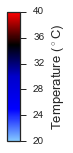

In [354]:
'''
====================
Customized colorbars
====================

This example shows how to build colorbars without an attached mappable.
'''
import matplotlib.pyplot as plt
import matplotlib as mpl

# Make a figure and axes with dimensions as desired.
fig = plt.figure(figsize=(0.2, 12))
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])

# Set the colormap and norm to correspond to the data for which
# the colorbar will be used.
cmap = cmap
norm = mpl.colors.Normalize(vmin=20, vmax=40)

# ColorbarBase derives from ScalarMappable and puts a colorbar
# in a specified axes, so it has everything needed for a standalone colorbar.  
# There are many more kwargs, but the following gives a basic
# continuous colorbar with ticks and labels.

cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap, norm=norm, orientation='vertical', ticks=[20,24,28,32,36,40])
cb1.set_label('Temperature ($^\circ$C)', fontsize=13)

plt.show()

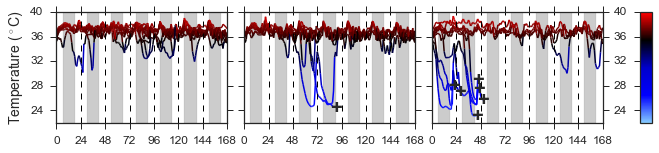

In [355]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap
sns.set_context("notebook"); sns.set_style("ticks");
fig = plt.figure(figsize=(10.4, 2.2)) #Figure size 
gs1 = gridspec.GridSpec(1, 4, width_ratios=[1,1,1,0.1], wspace=0.13) #Ratio of upper and lower subplots

ax0 = plt.subplot(gs1[0])
#Data - WT, AP (n=9)
colorline(df5FK503['ZT'][0:10080], df5FK503['temp'][0:10080], linewidth=1.5)
colorline(df5FK504['ZT'][0:10080], df5FK504['temp'][0:10080], linewidth=1.5)
colorline(df5FK536['ZT'][0:10080], df5FK536['temp'][0:10080], linewidth=1.5)
colorline(df5FK537['ZT'][0:10080], df5FK537['temp'][0:10080], linewidth=1.5)
colorline(df5FK544['ZT'][0:10080], df5FK544['temp'][0:10080], linewidth=1.5)
colorline(df5FKalb177['ZT'][0:10080], df5FKalb177['temp'][0:10080], linewidth=1.5)
colorline(df5FKalb179['ZT'][0:10080], df5FKalb179['temp'][0:10080], linewidth=1.5)
colorline(df5FKalb202['ZT'][0:10080], df5FKalb202['temp'][0:10080], linewidth=1.5)
colorline(df5FKalb230['ZT'][0:10080], df5FKalb230['temp'][0:10080], linewidth=1.5)
ax0.tick_params(labelsize=12)
plt.plot([24, 24], [20, 50], 'k--', lw=1); plt.plot([48, 48], [20, 50], 'k--', lw=1)
plt.plot([72, 72], [20, 50], 'k--', lw=1); plt.plot([96, 96], [20, 50], 'k--', lw=1)
plt.plot([120, 120], [20, 50], 'k--', lw=1); plt.plot([144, 144], [20, 50], 'k--', lw=1)
plt.ylabel('Temperature ($^\circ$C)', fontsize=14)
ax0.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax0.axvspan(6,18,color='k',alpha=0.2);ax0.axvspan(30,42,color='k',alpha=0.2);
ax0.axvspan(54,66,color='k',alpha=0.2); ax0.axvspan(78,90, color='k', alpha=0.2)
ax0.axvspan(102,114,color='k',alpha=0.2);ax0.axvspan(126,138,color='k',alpha=0.2);
ax0.axvspan(150,162,color='k',alpha=0.2); 
ax0.yaxis.set_ticks(np.arange(24.0,42.01,4.0))
ax0.set_ylim(22.0,40.0); ax0.set_xlim(0,168)

ax1 = plt.subplot(gs1[1]); 
#Data - KMO null, AP n=8
colorline(df5K1179['ZT'][0:10080], df5K1179['temp'][0:10080], linewidth=1.5)
colorline(df5K1181['ZT'][0:10080], df5K1181['temp'][0:10080], linewidth=1.5)
colorline(df5K1222['ZT'][0:10080], df5K1222['temp'][0:10080], linewidth=1.5)
colorline(df5K1225['ZT'][0:10080], df5K1225['temp'][0:10080], linewidth=1.5)
colorline(df5K1246['ZT'][0:10080], df5K1246['temp'][0:10080], linewidth=1.5)
colorline(df5K1248['ZT'][0:10080], df5K1248['temp'][0:10080], linewidth=1.5)
colorline(df5K1261['ZT'][0:10080], df5K1261['temp'][0:10080], linewidth=1.5)
colorline(df5K1262['ZT'][0:10080], df5K1262['temp'][0:10080], linewidth=1.5)
ax1.tick_params(labelsize=12)
plt.plot([24, 24], [20, 50], 'k--', lw=1); plt.plot([48, 48], [20, 50], 'k--', lw=1)
plt.plot([72, 72], [20, 50], 'k--', lw=1); plt.plot([96, 96], [20, 50], 'k--', lw=1)
plt.plot([120, 120], [20, 50], 'k--', lw=1); plt.plot([144, 144], [20, 50], 'k--', lw=1)
ax1.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax1.axvspan(6,18,color='k',alpha=0.2);ax1.axvspan(30,42,color='k',alpha=0.2);
ax1.axvspan(54,66,color='k',alpha=0.2);ax1.axvspan(78,90,color='k',alpha=0.2); 
ax1.axvspan(102,114,color='k',alpha=0.2);ax1.axvspan(126,138,color='k',alpha=0.2);
ax1.axvspan(150,162, color='k', alpha=0.2)
ax1.yaxis.set_ticklabels([])
ax1.yaxis.set_ticks(np.arange(24.0,42.01,4.0))
ax1.set_ylim(22.0,40.0); ax1.set_xlim(0,168)
ax1.text(90, 24.4, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')

ax2 = plt.subplot(gs1[2])
#Data - KMO albcre, AP n=10
colorline(df5A226['ZT'][0:10080], df5A226['temp'][0:10080], linewidth=1.5)
colorline(df5A235['ZT'][0:10080], df5A235['temp'][0:10080], linewidth=1.5)
colorline(df5A238['ZT'][0:10080], df5A238['temp'][0:10080], linewidth=1.5)
colorline(df5A241['ZT'][0:10080], df5A241['temp'][0:10080], linewidth=1.5)
colorline(df5A244['ZT'][0:10080], df5A244['temp'][0:10080], linewidth=1.5)
colorline(df5A246['ZT'][0:10080], df5A246['temp'][0:10080], linewidth=1.5)
colorline(df5A265['ZT'][0:10080], df5A265['temp'][0:10080], linewidth=1.5)
colorline(df5A272['ZT'][0:10080], df5A272['temp'][0:10080], linewidth=1.5)
colorline(df5A280['ZT'][0:10080], df5A280['temp'][0:10080], linewidth=1.5)
colorline(df5A281['ZT'][0:10080], df5A281['temp'][0:10080], linewidth=1.5)
ax2.tick_params(labelsize=12)
plt.plot([24, 24], [20, 50], 'k--', lw=1); plt.plot([48, 48], [20, 50], 'k--', lw=1)
plt.plot([72, 72], [20, 50], 'k--', lw=1); plt.plot([96, 96], [20, 50], 'k--', lw=1)
plt.plot([120, 120], [20, 50], 'k--', lw=1); plt.plot([144, 144], [20, 50], 'k--', lw=1)
ax2.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax2.axvspan(6,18, color='k', alpha=0.2);ax2.axvspan(30,42, color='k', alpha=0.2);
ax2.axvspan(54,66, color='k', alpha=0.2);ax2.axvspan(78,90, color='k', alpha=0.2);
ax2.axvspan(102,114, color='k', alpha=0.2);ax2.axvspan(126,138, color='k', alpha=0.2);
ax2.axvspan(150,162, color='k', alpha=0.2)
ax2.yaxis.set_ticks(np.arange(24.0, 42.01, 4.0))
ax2.yaxis.set_ticklabels([])
ax2.set_ylim(22.0, 40.0); ax2.set_xlim(0, 168)

ax2.text(50, 25.6, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')
ax2.text(46, 27.5, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')
ax2.text(44.9, 28.95, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')
ax2.text(44, 23.1, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')
ax2.text(27.9, 27.0, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')
ax2.text(22, 28, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')

ax3 = plt.subplot(gs1[3])
norm = mpl.colors.Normalize(vmin=22, vmax=40)
cb1 = mpl.colorbar.ColorbarBase(ax3, cmap=cmap, norm=norm, orientation='vertical', ticks=[20,24,28,32,36,40])
ax3.yaxis.set_ticks_position('left')
ax3.tick_params(labelsize=12)
plt.subplots_adjust(bottom=0.2, wspace = 0.1)
ax3.set_position([0.904,0.20, 0.017, 0.70]) #More Right, MoreUp, MoreWidth
plt.savefig('Temps_7day_03jan18_AP.png', dpi=1000)
plt.show()

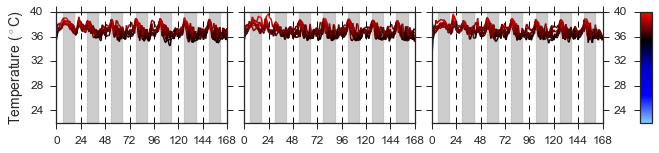

In [356]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors
from matplotlib.colors import LinearSegmentedColormap

sns.set_context("notebook"); sns.set_style("ticks");
fig = plt.figure(figsize=(10.4, 2.2)) #Figure size 
gs1 = gridspec.GridSpec(1, 4, width_ratios=[1,1,1,0.1], wspace=0.13) #Ratio of upper and lower subplots

ax0 = plt.subplot(gs1[0])
colorline(df5FK502['ZT'][0:10080], df5FK502['temp'][0:10080], linewidth=1.5)
colorline(df5FK534['ZT'][0:10080], df5FK534['temp'][0:10080], linewidth=1.5)
colorline(df5FK535['ZT'][0:10080], df5FK535['temp'][0:10080], linewidth=1.5)
colorline(df5FK545['ZT'][0:10080], df5FK545['temp'][0:10080], linewidth=1.5)
colorline(df5FKalb180['ZT'][0:10080], df5FKalb180['temp'][0:10080], linewidth=1.5)
colorline(df5FKalb205['ZT'][0:10080], df5FKalb205['temp'][0:10080], linewidth=1.5)
colorline(df5FKalb229['ZT'][0:10080], df5FKalb229['temp'][0:10080], linewidth=1.5)
ax0.tick_params(labelsize=12)
plt.plot([24, 24], [20, 40], 'k--', lw=1); plt.plot([48, 48], [20, 40], 'k--', lw=1)
plt.plot([72, 72], [20, 40], 'k--', lw=1); plt.plot([96, 96], [20, 40], 'k--', lw=1)
plt.plot([120, 120], [20, 40], 'k--', lw=1); plt.plot([144, 144], [20, 40], 'k--', lw=1)
plt.ylabel('Temperature ($^\circ$C)', fontsize=14)

ax0.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax0.axvspan(6,18,color='k',alpha=0.2);ax0.axvspan(30,42,color='k',alpha=0.2);
ax0.axvspan(54,66,color='k',alpha=0.2); ax0.axvspan(78,90, color='k', alpha=0.2)
ax0.axvspan(102,114,color='k',alpha=0.2);ax0.axvspan(126,138,color='k',alpha=0.2);
ax0.axvspan(150,162,color='k',alpha=0.2); 
ax0.yaxis.set_ticks(np.arange(24.0,42.01,4.0))
ax0.set_ylim(22.0,40.0); ax0.set_xlim(0,168)

ax1 = plt.subplot(gs1[1]); 
#Data - KMO null, Sham (n=7/7)
colorline(df5K1180['ZT'][0:10080], df5K1180['temp'][0:10080], linewidth=1.5)
colorline(df5K1216['ZT'][0:10080], df5K1216['temp'][0:10080], linewidth=1.5)
colorline(df5K1223['ZT'][0:10080], df5K1223['temp'][0:10080], linewidth=1.5)
colorline(df5K1224['ZT'][0:10080], df5K1224['temp'][0:10080], linewidth=1.5)
colorline(df5K1247['ZT'][0:10080], df5K1247['temp'][0:10080], linewidth=1.5)
colorline(df5K1263['ZT'][0:10080], df5K1263['temp'][0:10080], linewidth=1.5)
colorline(df5K1264['ZT'][0:10080], df5K1264['temp'][0:10080], linewidth=1.5)
ax1.tick_params(labelsize=12)
plt.plot([24, 24], [20, 50], 'k--', lw=1); plt.plot([48, 48], [20, 50], 'k--', lw=1)
plt.plot([72, 72], [20, 50], 'k--', lw=1); plt.plot([96, 96], [20, 50], 'k--', lw=1)
plt.plot([120, 120], [20, 50], 'k--', lw=1); plt.plot([144, 144], [20, 50], 'k--', lw=1)

#Dark phase panels in upper middle subplot
ax1.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax1.axvspan(6,18,color='k',alpha=0.2);ax1.axvspan(30,42,color='k',alpha=0.2);
ax1.axvspan(54,66,color='k',alpha=0.2);ax1.axvspan(78,90,color='k',alpha=0.2); 
ax1.axvspan(102,114,color='k',alpha=0.2);ax1.axvspan(126,138,color='k',alpha=0.2);
ax1.axvspan(150,162, color='k', alpha=0.2)
ax1.yaxis.set_ticks(np.arange(24.0,42.01,4.0))
ax1.set_ylim(22.0,40.0); ax1.set_xlim(0,168)
ax1.yaxis.set_ticklabels([])

ax2 = plt.subplot(gs1[2])
#Data - KMO albcre, Sham (n=7/7)
colorline(df5A227['ZT'][0:10080], df5A227['temp'][0:10080], linewidth=1.5)
colorline(df5A234['ZT'][0:10080], df5A234['temp'][0:10080], linewidth=1.5)
colorline(df5A243['ZT'][0:10080], df5A243['temp'][0:10080], linewidth=1.5)
colorline(df5A252['ZT'][0:10080], df5A252['temp'][0:10080], linewidth=1.5)
colorline(df5A253['ZT'][0:10080], df5A253['temp'][0:10080], linewidth=1.5)
colorline(df5A270['ZT'][0:10080], df5A270['temp'][0:10080], linewidth=1.5)
colorline(df5A282['ZT'][0:10080], df5A282['temp'][0:10080], linewidth=1.5)
ax2.tick_params(labelsize=12)
plt.plot([24, 24], [20, 50], 'k--', lw=1); plt.plot([48, 48], [20, 50], 'k--', lw=1)
plt.plot([72, 72], [20, 50], 'k--', lw=1); plt.plot([96, 96], [20, 50], 'k--', lw=1)
plt.plot([120, 120], [20, 50], 'k--', lw=1); plt.plot([144, 144], [20, 50], 'k--', lw=1)

ax2.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax2.axvspan(6,18, color='k', alpha=0.2);ax2.axvspan(30,42, color='k', alpha=0.2);
ax2.axvspan(54,66, color='k', alpha=0.2);ax2.axvspan(78,90, color='k', alpha=0.2);
ax2.axvspan(102,114, color='k', alpha=0.2);ax2.axvspan(126,138, color='k', alpha=0.2);
ax2.axvspan(150,162, color='k', alpha=0.2)
ax2.yaxis.set_ticks(np.arange(24.0, 42.01, 4.0))
ax2.set_ylim(22.0, 40.0); ax2.set_xlim(0, 168)
ax2.yaxis.set_ticklabels([])

ax3 = plt.subplot(gs1[3])
norm = mpl.colors.Normalize(vmin=22, vmax=40)
cb1 = mpl.colorbar.ColorbarBase(ax3, cmap=cmap, norm=norm, orientation='vertical', ticks=[20,24,28,32,36,40])
ax3.yaxis.set_ticks_position('left')
ax3.tick_params(labelsize=12)
plt.subplots_adjust(bottom=0.2, wspace = 0.1)
ax3.set_position([0.904,0.20, 0.017, 0.70]) #More Right, MoreUp, MoreWidth
plt.savefig('Temps_7day_03jan17_Sham.png', dpi=1000)
plt.show()

NameError: name 'df5A415' is not defined

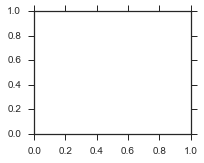

In [112]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors
from matplotlib.colors import LinearSegmentedColormap

sns.set_context("notebook"); sns.set_style("ticks");
fig = plt.figure(figsize=(3.7, 2.2)) #Figure size 
gs1 = gridspec.GridSpec(1, 2, width_ratios=[1,0.1], wspace=0.4) #Ratio of upper and lower subplots

ax0 = plt.subplot(gs1[0])
#Data - KMO albcre, AP, Vehicle (n=10)
colorline(df5A415['ZT'][0:10080], df5A415['temp'][0:10080], linewidth=0.8)
colorline(df5A416['ZT'][0:10080], df5A416['temp'][0:10080], linewidth=0.8)
colorline(df5A421['ZT'][0:10080], df5A421['temp'][0:10080], linewidth=0.8)
colorline(df5A422['ZT'][0:10080], df5A422['temp'][0:10080], linewidth=0.8)
colorline(df5A432['ZT'][0:10080], df5A432['temp'][0:10080], linewidth=0.8)
colorline(df5A439['ZT'][0:10080], df5A439['temp'][0:10080], linewidth=0.8)
colorline(df5A440['ZT'][0:10080], df5A440['temp'][0:10080], linewidth=0.8)
colorline(df5A449['ZT'][0:10080], df5A449['temp'][0:10080], linewidth=0.8)
colorline(df5A450['ZT'][0:10080], df5A450['temp'][0:10080], linewidth=0.8)
colorline(df5A451['ZT'][0:10080], df5A451['temp'][0:10080], linewidth=0.8)
ax0.tick_params(labelsize=12)
plt.plot([24, 24], [20, 50], 'k--', lw=1); plt.plot([48, 48], [20, 50], 'k--', lw=1)
plt.plot([72, 72], [20, 50], 'k--', lw=1); plt.plot([96, 96], [20, 50], 'k--', lw=1)
plt.plot([120, 120], [20, 50], 'k--', lw=1); plt.plot([144, 144], [20, 50], 'k--', lw=1)
plt.ylabel('Temperature ($^\circ$C)', fontsize=14)
ax0.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax0.axvspan(6,18,color='k',alpha=0.2);ax0.axvspan(30,42,color='k',alpha=0.2);
ax0.axvspan(54,66,color='k',alpha=0.2); ax0.axvspan(78,90, color='k', alpha=0.2)
ax0.axvspan(102,114,color='k',alpha=0.2);ax0.axvspan(126,138,color='k',alpha=0.2);
ax0.axvspan(150,162,color='k',alpha=0.2); 
ax0.yaxis.set_ticks(np.arange(24.0,42.01,4.0))
ax0.set_ylim(22.0,40.0); ax2.set_xlim(0,168)
ax0.text(22, 25.0, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')
ax0.text(26.2, 27.1, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')
 
ax1 = plt.subplot(gs1[1])
ax1.set_position([0.88,0.12, 0.016, 0.74]) #More Right, MoreUp, MoreWidth
norm = mpl.colors.Normalize(vmin=22, vmax=40)
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap, norm=norm, orientation='vertical', ticks=[20,24,28,32,36,40])
ax1.yaxis.set_ticks_position('left')
ax1.tick_params(labelsize=12)

plt.subplots_adjust(bottom=0.2)
#plt.savefig('Temps_7day_20nov17_AP_VehiclePump.png', dpi=1000)
plt.show()

In [125]:
# Topics: line, color, LineCollection, cmap, colorline, codex
'''
Defines a function colorline that draws a (multi-)colored 2D line with coordinates x and y.
The color is taken from optional data in z, and creates a LineCollection.

z can be:
- empty, in which case a default coloring will be used based on the position along the input arrays
- a single number, for a uniform color [this can also be accomplished with the usual plt.plot]
- an array of the length of at least the same length as x, to color according to this data
- an array of a smaller length, in which case the colors are repeated along the curve

The function colorline returns the LineCollection created, which can be modified afterwards.

See also: plt.streamplot
'''

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

#cmap2='brg'
#cmap2='gnuplot2'
#cmap2='GnBu'
#cmap2='cool'
#cmap2='jet'
#cmap2='nipy_spectral'
#cmap2=plt.get_cmap('viridis')
cmap2 = mpl.colors.ListedColormap(['g', 'b', '#FFFF00', 'k'])
#cmap2 = mpl.colors.ListedColormap(['b', 'g', 'y', 'r'])
#cmap2 = sns.palplot(sns.cubehelix_palette(8))
#cmap2 = 'ocean'

# Data manipulation:
def make_segments(x, y):
    '''
    Create list of line segments from x and y coordinates, in the correct format for LineCollection:
    an array of the form numlines x (points per line) x 2 (x and y) array
    '''

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    return segments

# Interface to LineCollection:
def colorline2(x, y, z=None, cmap=cmap2, norm=plt.Normalize(0,40), linewidth=3, alpha=1.0):
    '''
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    '''
    
    # Default colors equally spaced on [0,1]:
    if z is None:
        z = np.linspace(0.0, 1.0, len(y))
           
    # Special case if a single number:
    if not hasattr(z, "__iter__"):  # to check for numerical input -- this is a hack
        z = np.array([z])
        
    z = np.asarray(y)
    
    segments = make_segments(x, y)
    lc2 = LineCollection(segments, array=z, cmap=cmap2, norm=plt.Normalize(0,40), linewidth=linewidth, alpha=alpha)
    
    ax1 = plt.gca()
    ax1.add_collection(lc2)
    
    return lc2
        
def clear_frame(ax1=None):
    if ax1 is None: 
        ax1 = plt.gca() 
    ax1.xaxis.set_visible(False) 
    ax1.yaxis.set_visible(False) 
    for spine in ax1.spines.itervalues(): 
        spine.set_visible(False)

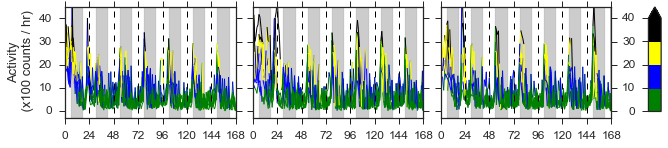

In [88]:
from matplotlib import gridspec                         #special function
sns.set_context("notebook"); sns.set_style("ticks");
#fig = plt.figure(figsize=(24, 8)) #Figure size 
fig = plt.figure(figsize=(10.4, 2.2)) #Figure size 
gs1 = gridspec.GridSpec(1, 4, width_ratios=[1,1,1,0.1], wspace=0.13) #Ratio of upper and lower subplots

ax0 = plt.subplot(gs1[0]); 
#Data - WT, Sham (n=7/7)
colorline2(df5FK502['ZT'][0:10080], df5FK502['actHund'][0:10080], linewidth=1)
colorline2(df5FK534['ZT'][0:10080], df5FK534['actHund'][0:10080], linewidth=1)
colorline2(df5FK535['ZT'][0:10080], df5FK535['actHund'][0:10080], linewidth=1)
colorline2(df5FK545['ZT'][0:10080], df5FK545['actHund'][0:10080], linewidth=1)
colorline2(df5FKalb180['ZT'][0:10080], df5FKalb180['actHund'][0:10080], linewidth=1)
colorline2(df5FKalb205['ZT'][0:10080], df5FKalb205['actHund'][0:10080], linewidth=1)
colorline2(df5FKalb229['ZT'][0:10080], df5FKalb229['actHund'][0:10080], linewidth=1)
ax0.tick_params(labelsize=12)
plt.plot([24, 24], [-1000, 5000], 'k--', lw=1); plt.plot([48, 48], [-1000, 5000], 'k--', lw=1)
plt.plot([72, 72], [-1000, 5000], 'k--', lw=1); plt.plot([96, 96], [-1000, 5000], 'k--', lw=1)
plt.plot([120, 120], [-1000, 5000], 'k--', lw=1); plt.plot([144, 144], [-1000, 5000], 'k--', lw=1)
plt.ylabel('Activity\n (x100 counts / hr)', fontsize=13)

ax1 = plt.subplot(gs1[1]); 
#Data - KMO null, Sham (n=7/7)
colorline2(df5K1180['ZT'][0:10080], df5K1180['actHund'][0:10080], linewidth=1)
colorline2(df5K1216['ZT'][0:10080], df5K1216['actHund'][0:10080], linewidth=1)
colorline2(df5K1223['ZT'][0:10080], df5K1223['actHund'][0:10080], linewidth=1)
colorline2(df5K1224['ZT'][0:10080], df5K1224['actHund'][0:10080], linewidth=1)
colorline2(df5K1247['ZT'][0:10080], df5K1247['actHund'][0:10080], linewidth=1)
colorline2(df5K1263['ZT'][0:10080], df5K1263['actHund'][0:10080], linewidth=1)
colorline2(df5K1264['ZT'][0:10080], df5K1264['actHund'][0:10080], linewidth=1)
ax1.tick_params(labelsize=12)
plt.plot([24, 24], [-1000, 5000], 'k--', lw=1); plt.plot([48, 48], [-1000, 5000], 'k--', lw=1)
plt.plot([72, 72], [-1000, 5000], 'k--', lw=1); plt.plot([96, 96], [-1000, 5000], 'k--', lw=1)
plt.plot([120, 120], [-1000, 5000], 'k--', lw=1); plt.plot([144, 144], [-1000, 5000], 'k--', lw=1)
ax1.yaxis.set_ticklabels([])

ax2 = plt.subplot(gs1[2])
#Data - KMO albcre, Sham (n=7/7)
colorline2(df5A227['ZT'][0:10080], df5A227['actHund'][0:10080], linewidth=1)
colorline2(df5A234['ZT'][0:10080], df5A234['actHund'][0:10080], linewidth=1)
colorline2(df5A243['ZT'][0:10080], df5A243['actHund'][0:10080], linewidth=1)
colorline2(df5A252['ZT'][0:10080], df5A252['actHund'][0:10080], linewidth=1)
colorline2(df5A253['ZT'][0:10080], df5A253['actHund'][0:10080], linewidth=1)
colorline2(df5A270['ZT'][0:10080], df5A270['actHund'][0:10080], linewidth=1)
colorline2(df5A282['ZT'][0:10080], df5A282['act'][0:10080], linewidth=0.8)
ax2.tick_params(labelsize=12)
plt.plot([24, 24], [-1000, 5000], 'k--', lw=1); plt.plot([48, 48], [-1000, 5000], 'k--', lw=1)
plt.plot([72, 72], [-1000, 5000], 'k--', lw=1); plt.plot([96, 96], [-1000, 5000], 'k--', lw=1)
plt.plot([120, 120], [-1000, 5000], 'k--', lw=1); plt.plot([144, 144], [-1000, 5000], 'k--', lw=1)
ax2.yaxis.set_ticklabels([])

#Dark phase panels in upper left subplot
ax0.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax0.axvspan(6,18,color='k',alpha=0.2);ax0.axvspan(30,42,color='k',alpha=0.2);ax0.axvspan(54,66,color='k',alpha=0.2);ax0.axvspan(78,90, color='k', alpha=0.2)
ax0.axvspan(102,114,color='k',alpha=0.2);ax0.axvspan(126,138,color='k',alpha=0.2);ax0.axvspan(150,162,color='k',alpha=0.2)
ax0.yaxis.set_ticks(np.arange(0,50,10))
#Set upper subplot limits
ax0.set_ylim(-3,45); ax0.set_xlim(0,168)

#Dark phase panels in upper middle subplot
ax1.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax1.axvspan(6,18,color='k',alpha=0.2);ax1.axvspan(30,42,color='k',alpha=0.2);ax1.axvspan(54,66,color='k',alpha=0.2);
ax1.axvspan(78,90,color='k',alpha=0.2); ax1.axvspan(102,114,color='k',alpha=0.2);ax1.axvspan(126,138,color='k',alpha=0.2);ax1.axvspan(150,162, color='k', alpha=0.2)
ax1.yaxis.set_ticks(np.arange(0,50,10))
ax1.set_ylim(-3,45); ax1.set_xlim(0,168)

#Dark phase panels in upper right subplot
ax2.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax2.axvspan(6,18, color='k', alpha=0.2);ax2.axvspan(30,42, color='k', alpha=0.2);ax2.axvspan(54,66, color='k', alpha=0.2);
ax2.axvspan(78,90, color='k', alpha=0.2); ax2.axvspan(102,114, color='k', alpha=0.2);ax2.axvspan(126,138, color='k', alpha=0.2);ax2.axvspan(150,162, color='k', alpha=0.2)
ax2.yaxis.set_ticks(np.arange(0,50,10))
ax2.set_ylim(-3,45); ax2.set_xlim(0,168)

ax3 = plt.subplot(gs1[3])
norm2 = mpl.colors.Normalize(vmin=0, vmax=40)
cb2 = mpl.colorbar.ColorbarBase(ax3, cmap=cmap2, norm=norm2, 
                                orientation='vertical', ticks=[0,10,20,30,40], extend='max', extendfrac=0.12)
ax3.yaxis.set_ticks_position('left')
ax3.tick_params(labelsize=12)
plt.subplots_adjust(bottom=0.2, wspace = 0.1)
ax3.set_position([0.904,0.24, 0.017, 0.66]) #More Right, MoreUp, MoreWidth
#plt.savefig('Act_7day_22nov17_Sham.png', dpi=1000)
plt.show()

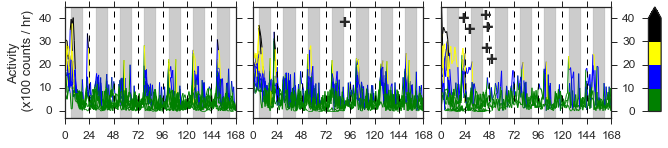

In [126]:
from matplotlib import gridspec                         #special function
sns.set_context("notebook"); sns.set_style("ticks");
#fig = plt.figure(figsize=(24, 8)) #Figure size 
fig = plt.figure(figsize=(10.4, 2.2)) #Figure size 
gs1 = gridspec.GridSpec(1, 4, width_ratios=[1,1,1,0.1], wspace=0.13) #Ratio of upper and lower subplots

ax0 = plt.subplot(gs1[0]); 
#Data - WT, AP n=9
colorline2(df5FK503['ZT'][0:10080], df5FK503['actHund'][0:10080], linewidth=1)
colorline2(df5FK504['ZT'][0:10080], df5FK504['actHund'][0:10080], linewidth=1)
colorline2(df5FK536['ZT'][0:10080], df5FK536['actHund'][0:10080], linewidth=1)
colorline2(df5FK537['ZT'][0:10080], df5FK537['actHund'][0:10080], linewidth=1)
colorline2(df5FK544['ZT'][0:10080], df5FK544['actHund'][0:10080], linewidth=1)
colorline2(df5FKalb177['ZT'][0:10080], df5FKalb177['actHund'][0:10080], linewidth=1)
colorline2(df5FKalb179['ZT'][0:10080], df5FKalb179['actHund'][0:10080], linewidth=1)
colorline2(df5FKalb202['ZT'][0:10080], df5FKalb202['actHund'][0:10080], linewidth=1)
colorline2(df5FKalb230['ZT'][0:10080], df5FKalb230['actHund'][0:10080], linewidth=1)
ax0.tick_params(labelsize=12)
plt.plot([24, 24], [-1000, 5000], 'k--', lw=1); plt.plot([48, 48], [-1000, 5000], 'k--', lw=1)
plt.plot([72, 72], [-1000, 5000], 'k--', lw=1); plt.plot([96, 96], [-1000, 5000], 'k--', lw=1)
plt.plot([120, 120], [-1000, 5000], 'k--', lw=1); plt.plot([144, 144], [-1000, 5000], 'k--', lw=1)
plt.ylabel('Activity\n (x100 counts / hr)', fontsize=13)

ax1 = plt.subplot(gs1[1]); 
#Data - KMO null, AP n=8
colorline2(df5K1179['ZT'][0:10080], df5K1179['actHund'][0:10080], linewidth=1)
colorline2(df5K1181['ZT'][0:10080], df5K1181['actHund'][0:10080], linewidth=1)
###colorline2(df5K1217['ZT'][0:10080], df5K1217['actHund'][0:10080], linewidth=1)
colorline2(df5K1222['ZT'][0:10080], df5K1222['actHund'][0:10080], linewidth=1)
colorline2(df5K1225['ZT'][0:10080], df5K1225['actHund'][0:10080], linewidth=1)
colorline2(df5K1246['ZT'][0:10080], df5K1246['actHund'][0:10080], linewidth=1)
colorline2(df5K1248['ZT'][0:10080], df5K1248['actHund'][0:10080], linewidth=1)  #Died
colorline2(df5K1261['ZT'][0:10080], df5K1261['actHund'][0:10080], linewidth=1)
colorline2(df5K1262['ZT'][0:10080], df5K1262['actHund'][0:10080], linewidth=1)
ax1.tick_params(labelsize=12)
plt.plot([24, 24], [-1000, 5000], 'k--', lw=1); plt.plot([48, 48], [-1000, 5000], 'k--', lw=1)
plt.plot([72, 72], [-1000, 5000], 'k--', lw=1); plt.plot([96, 96], [-1000, 5000], 'k--', lw=1)
plt.plot([120, 120], [-1000, 5000], 'k--', lw=1); plt.plot([144, 144], [-1000, 5000], 'k--', lw=1)
ax1.yaxis.set_ticklabels([])

ax2 = plt.subplot(gs1[2])
#Data - KMO albcre, AP n=10
colorline2(df5A226['ZT'][0:10080], df5A226['actHund'][0:10080], linewidth=1)
colorline2(df5A235['ZT'][0:10080], df5A235['actHund'][0:10080], linewidth=1)
colorline2(df5A238['ZT'][0:10080], df5A238['actHund'][0:10080], linewidth=1)
colorline2(df5A241['ZT'][0:10080], df5A241['actHund'][0:10080], linewidth=1)
colorline2(df5A244['ZT'][0:10080], df5A244['actHund'][0:10080], linewidth=1)
colorline2(df5A246['ZT'][0:10080], df5A246['actHund'][0:10080], linewidth=1)
colorline2(df5A265['ZT'][0:10080], df5A265['actHund'][0:10080], linewidth=1)
colorline2(df5A272['ZT'][0:10080], df5A272['actHund'][0:10080], linewidth=1)
colorline2(df5A280['ZT'][0:10080], df5A280['actHund'][0:10080], linewidth=1)
colorline2(df5A281['ZT'][0:10080], df5A281['actHund'][0:10080], linewidth=1)
ax2.tick_params(labelsize=12)
plt.plot([24, 24], [-1000, 5000], 'k--', lw=1); plt.plot([48, 48], [-1000, 5000], 'k--', lw=1)
plt.plot([72, 72], [-1000, 5000], 'k--', lw=1); plt.plot([96, 96], [-1000, 5000], 'k--', lw=1)
plt.plot([120, 120], [-1000, 5000], 'k--', lw=1); plt.plot([144, 144], [-1000, 5000], 'k--', lw=1)
ax2.yaxis.set_ticklabels([])

#Dark phase panels in upper left subplot
ax0.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax0.axvspan(6,18,color='k',alpha=0.2);ax0.axvspan(30,42,color='k',alpha=0.2);ax0.axvspan(54,66,color='k',alpha=0.2);ax0.axvspan(78,90, color='k', alpha=0.2)
ax0.axvspan(102,114,color='k',alpha=0.2);ax0.axvspan(126,138,color='k',alpha=0.2);ax0.axvspan(150,162,color='k',alpha=0.2)
ax0.yaxis.set_ticks(np.arange(0,50,10))
#Set upper subplot limits
ax0.set_ylim(-3,45); ax0.set_xlim(0,168)

#Dark phase panels in upper middle subplot
ax1.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax1.axvspan(6,18,color='k',alpha=0.2);ax1.axvspan(30,42,color='k',alpha=0.2);ax1.axvspan(54,66,color='k',alpha=0.2);
ax1.axvspan(78,90,color='k',alpha=0.2); ax1.axvspan(102,114,color='k',alpha=0.2);ax1.axvspan(126,138,color='k',alpha=0.2);ax1.axvspan(150,162, color='k', alpha=0.2)
ax1.yaxis.set_ticks(np.arange(0,50,10))
ax1.set_ylim(-3,45); ax1.set_xlim(0,168)

#Dark phase panels in upper right subplot
ax2.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax2.axvspan(6,18, color='k', alpha=0.2);ax2.axvspan(30,42, color='k', alpha=0.2);ax2.axvspan(54,66, color='k', alpha=0.2);
ax2.axvspan(78,90, color='k', alpha=0.2); ax2.axvspan(102,114, color='k', alpha=0.2);ax2.axvspan(126,138, color='k', alpha=0.2);ax2.axvspan(150,162, color='k', alpha=0.2)
ax2.yaxis.set_ticks(np.arange(0,50,10))
ax2.set_ylim(-3,45); ax2.set_xlim(0,168)

ax1.text(90, 38, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')

ax2.text(22, 40, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')
ax2.text(27.9, 35, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')

ax2.text(44, 41, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')
ax2.text(44.9, 27, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')
ax2.text(46, 36, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')
ax2.text(50, 22, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')

ax3 = plt.subplot(gs1[3])
norm2 = mpl.colors.Normalize(vmin=0, vmax=40)
cb2 = mpl.colorbar.ColorbarBase(ax3, cmap=cmap2, norm=norm2, 
                                orientation='vertical', ticks=[0,10,20,30,40], extend='max', extendfrac=0.12)
ax3.yaxis.set_ticks_position('left')
ax3.tick_params(labelsize=12)
plt.subplots_adjust(bottom=0.2, wspace = 0.1)
ax3.set_position([0.904,0.24, 0.017, 0.66]) #More Right, MoreUp, MoreWidth
#plt.savefig('Act_7day_22nov17_AP.png', dpi=1000)
plt.show()

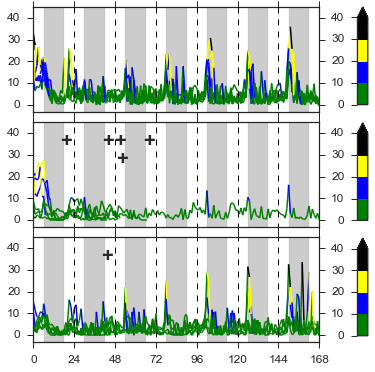

In [682]:
# from matplotlib import gridspec                         #special function
sns.set_context("notebook"); sns.set_style("ticks");
#fig = plt.figure(figsize=(24, 8)) #Figure size 
fig = plt.figure(figsize=(6, 6)) #Figure size 
gs1 = gridspec.GridSpec(3, 2, width_ratios=[1,0.1], height_ratios=[1,1,1], hspace=0.1,wspace=0.13) #Ratio of upper and lower subplots

ax0 = plt.subplot(gs1[0]); 
#Data - WT, Sham n=6
colorline2(df5FKalb123['ZT'][0:10080], df5FKalb123['actHund'][0:10080], linewidth=1.5)
colorline2(df5FKalb128['ZT'][0:10080], df5FKalb128['actHund'][0:10080], linewidth=1.5)
colorline2(df5FK508['ZT'][0:10080], df5FK508['actHund'][0:10080], linewidth=1.5)
colorline2(df5FK509['ZT'][0:10080], df5FK509['actHund'][0:10080], linewidth=1.5)
colorline2(df5FK520['ZT'][0:10080], df5FK520['actHund'][0:10080], linewidth=1.5)
colorline2(df5FK521['ZT'][0:10080], df5FK521['actHund'][0:10080], linewidth=1.5)
ax0.tick_params(labelsize=12)
plt.plot([24, 24], [-1000, 5000], 'k--', lw=1); plt.plot([48, 48], [-1000, 5000], 'k--', lw=1)
plt.plot([72, 72], [-1000, 5000], 'k--', lw=1); plt.plot([96, 96], [-1000, 5000], 'k--', lw=1)
plt.plot([120, 120], [-1000, 5000], 'k--', lw=1); plt.plot([144, 144], [-1000, 5000], 'k--', lw=1)
ax0.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax0.xaxis.set_ticklabels([])
ax0.axvspan(6,18,color='k',alpha=0.2);ax0.axvspan(30,42,color='k',alpha=0.2);ax0.axvspan(54,66,color='k',alpha=0.2);
ax0.axvspan(78,90, color='k', alpha=0.2);ax0.axvspan(102,114,color='k',alpha=0.2);
ax0.axvspan(126,138,color='k',alpha=0.2);ax0.axvspan(150,162,color='k',alpha=0.2)
ax0.yaxis.set_ticks(np.arange(0,50,10))
ax0.set_ylim(-3,45); ax0.set_xlim(0,168)

ax1 = plt.subplot(gs1[1])
norm2 = mpl.colors.Normalize(vmin=0, vmax=40)
cb2 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap2, norm=norm2, 
                                orientation='vertical', ticks=[0,10,20,30,40], extend='max', extendfrac=0.12)
ax1.yaxis.set_ticks_position('left')
ax1.tick_params(labelsize=12)
ax1.set_position([0.875,0.674,0.024,0.226]) #More Right, MoreUp, MoreWidth, More Height

ax2 = plt.subplot(gs1[2]); 
#Data - WT, AP n=6
colorline2(df5FK459['ZT'][0:52], df5FK459['actHund'][0:52], linewidth=1.5)
colorline2(df5FK460['ZT'][0:19], df5FK460['actHund'][0:19], linewidth=1.5)
colorline2(df5FK468['ZT'][0:44], df5FK468['actHund'][0:44], linewidth=1.5)
colorline2(df5FK473['ZT'][0:68], df5FK473['actHund'][0:68], linewidth=1.5)
colorline2(df5FK506['ZT'][0:51], df5FK506['actHund'][0:51], linewidth=1.5)
colorline2(df5FK507['ZT'][0:170], df5FK507['actHund'][0:170], linewidth=1.5)
ax2.tick_params(labelsize=12)
plt.plot([24, 24], [-1000, 5000], 'k--', lw=1); plt.plot([48, 48], [-1000, 5000], 'k--', lw=1)
plt.plot([72, 72], [-1000, 5000], 'k--', lw=1); plt.plot([96, 96], [-1000, 5000], 'k--', lw=1)
plt.plot([120, 120], [-1000, 5000], 'k--', lw=1); plt.plot([144, 144], [-1000, 5000], 'k--', lw=1)
#plt.ylabel('Activity (x100 counts / hr)', fontsize=13)
ax2.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax2.xaxis.set_ticklabels([])
ax2.axvspan(6,18,color='k',alpha=0.2);ax2.axvspan(30,42,color='k',alpha=0.2);ax2.axvspan(54,66,color='k',alpha=0.2);
ax2.axvspan(78,90,color='k',alpha=0.2); ax2.axvspan(102,114,color='k',alpha=0.2);ax2.axvspan(126,138,color='k',alpha=0.2);ax2.axvspan(150,162, color='k', alpha=0.2)
ax2.yaxis.set_ticks(np.arange(0,50,10))
ax2.set_ylim(-3,45); ax2.set_xlim(0,168)
ax2.text(19, 36, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')
ax2.text(52, 28, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')
ax2.text(44, 36, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')
ax2.text(68, 36, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')
ax2.text(51, 36, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')

ax3 = plt.subplot(gs1[3])
norm2 = mpl.colors.Normalize(vmin=0, vmax=40)
cb2 = mpl.colorbar.ColorbarBase(ax3, cmap=cmap2, norm=norm2, 
                                orientation='vertical', ticks=[0,10,20,30,40], extend='max', extendfrac=0.12)
ax3.yaxis.set_ticks_position('left')
ax3.tick_params(labelsize=12)
ax3.set_position([0.875,0.406, 0.024, 0.226]) #More Right, MoreUp, MoreWidth, More Height

ax4 = plt.subplot(gs1[4])
#Data - KMO null, n=6
colorline2(df5K1140['ZT'][0:170], df5K1140['actHund'][0:170], linewidth=1.5)
colorline2(df5K1141['ZT'][0:43], df5K1141['actHund'][0:43], linewidth=1.5)
colorline2(df5K1166['ZT'][0:170], df5K1166['actHund'][0:170], linewidth=1.5)
colorline2(df5K1168['ZT'][0:170], df5K1168['actHund'][0:170], linewidth=1.5)
colorline2(df5K1191['ZT'][0:170], df5K1191['actHund'][0:170], linewidth=1.5)
colorline2(df5K1192['ZT'][0:170], df5K1192['actHund'][0:170], linewidth=1.5)
ax4.text(43, 36, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')
ax4.tick_params(labelsize=12)
plt.plot([24, 24], [-1000, 5000], 'k--', lw=1); plt.plot([48, 48], [-1000, 5000], 'k--', lw=1)
plt.plot([72, 72], [-1000, 5000], 'k--', lw=1); plt.plot([96, 96], [-1000, 5000], 'k--', lw=1)
plt.plot([120, 120], [-1000, 5000], 'k--', lw=1); plt.plot([144, 144], [-1000, 5000], 'k--', lw=1)
#plt.ylabel('Activity\n (x100 counts / hr)', fontsize=13)
ax4.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax4.axvspan(6,18, color='k', alpha=0.2);ax4.axvspan(30,42, color='k', alpha=0.2);ax4.axvspan(54,66, color='k', alpha=0.2);
ax4.axvspan(78,90, color='k', alpha=0.2); ax4.axvspan(102,114, color='k', alpha=0.2);
ax4.axvspan(126,138, color='k', alpha=0.2);ax4.axvspan(150,162, color='k', alpha=0.2)
ax4.yaxis.set_ticks(np.arange(0,50,10))
ax4.set_ylim(-3,45); ax4.set_xlim(0,168)
#ax4.tick_params(axis='x', pad=40)

ax5 = plt.subplot(gs1[5])
norm2 = mpl.colors.Normalize(vmin=0, vmax=40)
cb2 = mpl.colorbar.ColorbarBase(ax5, cmap=cmap2, norm=norm2, 
                                orientation='vertical', ticks=[0,10,20,30,40], extend='max', extendfrac=0.12)
ax5.yaxis.set_ticks_position('left')
ax5.tick_params(labelsize=12)
ax5.set_position([0.875,0.139, 0.024, 0.226]) #More Right, MoreUp, MoreWidth, More Height

plt.savefig('Act_7day_HR_04jan17.png', dpi=1000)
plt.show()

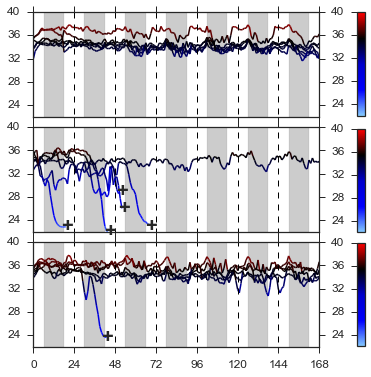

In [358]:
# from matplotlib import gridspec                         #special function
sns.set_context("notebook"); sns.set_style("ticks");
#fig = plt.figure(figsize=(24, 8)) #Figure size 
fig = plt.figure(figsize=(6, 6)) #Figure size 
gs1 = gridspec.GridSpec(3, 2, width_ratios=[1,0.1], height_ratios=[1,1,1], hspace=0.1,wspace=0.13) #Ratio of upper and lower subplots

ax0 = plt.subplot(gs1[0]); 
#Data - WT, Sham n=6
colorline(df5FKalb123['ZT'][0:170], df5FKalb123['cTemp'][0:170], linewidth=1.5)
colorline(df5FKalb128['ZT'][0:170], df5FKalb128['cTemp'][0:170], linewidth=1.5)
colorline(df5FK508['ZT'][0:170], df5FK508['cTemp'][0:170], linewidth=1.5)
colorline(df5FK509['ZT'][0:170], df5FK509['cTemp'][0:170], linewidth=1.5)
colorline(df5FK520['ZT'][0:170], df5FK520['cTemp'][0:170], linewidth=1.5)
colorline(df5FK521['ZT'][0:170], df5FK521['cTemp'][0:170], linewidth=1.5)
ax0.tick_params(labelsize=12)
plt.plot([24, 24], [-1000, 5000], 'k--', lw=1); plt.plot([48, 48], [-1000, 5000], 'k--', lw=1)
plt.plot([72, 72], [-1000, 5000], 'k--', lw=1); plt.plot([96, 96], [-1000, 5000], 'k--', lw=1)
plt.plot([120, 120], [-1000, 5000], 'k--', lw=1); plt.plot([144, 144], [-1000, 5000], 'k--', lw=1)
ax0.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax0.xaxis.set_ticklabels([])
ax0.axvspan(6,18,color='k',alpha=0.2);ax0.axvspan(30,42,color='k',alpha=0.2);ax0.axvspan(54,66,color='k',alpha=0.2);
ax0.axvspan(78,90, color='k', alpha=0.2);ax0.axvspan(102,114,color='k',alpha=0.2);
ax0.axvspan(126,138,color='k',alpha=0.2);ax0.axvspan(150,162,color='k',alpha=0.2)
ax0.yaxis.set_ticks(np.arange(24.0, 42.01, 4.0))
ax0.set_ylim(22.0, 40.0); ax0.set_xlim(0, 168)

ax1 = plt.subplot(gs1[1])
norm = mpl.colors.Normalize(vmin=22, vmax=40)
cb = mpl.colorbar.ColorbarBase(ax1, cmap=cmap, norm=norm, orientation='vertical', ticks=[20,24,28,32,36,40])
ax1.yaxis.set_ticks_position('left')
ax1.tick_params(labelsize=12)
ax1.set_position([0.875,0.66,0.017,0.24]) #More Right, MoreUp, MoreWidth, More Height 0.875,0.688,0.017,0.212

ax2 = plt.subplot(gs1[2]); 
#Data - WT, AP n=6
colorline(df5FK459['ZT'][0:53], df5FK459['cTemp'][0:53], linewidth=1.5)
colorline(df5FK460['ZT'][0:20], df5FK460['cTemp'][0:20], linewidth=1.5)
colorline(df5FK468['ZT'][0:45], df5FK468['cTemp'][0:45], linewidth=1.5)
colorline(df5FK473['ZT'][0:69], df5FK473['cTemp'][0:69], linewidth=1.5)
colorline(df5FK506['ZT'][0:52], df5FK506['cTemp'][0:52], linewidth=1.5)
colorline(df5FK507['ZT'][0:170], df5FK507['cTemp'][0:170], linewidth=1.5)
ax2.tick_params(labelsize=12)
plt.plot([24, 24], [-1000, 5000], 'k--', lw=1); plt.plot([48, 48], [-1000, 5000], 'k--', lw=1)
plt.plot([72, 72], [-1000, 5000], 'k--', lw=1); plt.plot([96, 96], [-1000, 5000], 'k--', lw=1)
plt.plot([120, 120], [-1000, 5000], 'k--', lw=1); plt.plot([144, 144], [-1000, 5000], 'k--', lw=1)
#plt.ylabel('Activity (x100 counts / hr)', fontsize=13)
ax2.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax2.xaxis.set_ticklabels([])
ax2.axvspan(6,18,color='k',alpha=0.2);ax2.axvspan(30,42,color='k',alpha=0.2);ax2.axvspan(54,66,color='k',alpha=0.2);
ax2.axvspan(78,90,color='k',alpha=0.2); ax2.axvspan(102,114,color='k',alpha=0.2);ax2.axvspan(126,138,color='k',alpha=0.2);ax2.axvspan(150,162, color='k', alpha=0.2)
ax2.yaxis.set_ticks(np.arange(24.0, 42.01, 4.0))
ax2.set_ylim(22.0, 40.0); ax2.set_xlim(0, 168)
ax2.text(20, 23, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')
ax2.text(53, 26, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')
ax2.text(45, 22, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')
ax2.text(69, 23, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')
ax2.text(52, 29, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')

ax3 = plt.subplot(gs1[3])
cb2 = mpl.colorbar.ColorbarBase(ax3, cmap=cmap, norm=norm, 
                                orientation='vertical', ticks=[20,24,28,32,36,40])
ax3.yaxis.set_ticks_position('left')
ax3.tick_params(labelsize=12)
ax3.set_position([0.875,0.390, 0.017, 0.24]) #More Right, MoreUp, MoreWidth, More Height

ax4 = plt.subplot(gs1[4])
#Data - KMO null, n=6
colorline(df5K1140['ZT'][0:170], df5K1140['cTemp'][0:170], linewidth=1.5)
colorline(df5K1141['ZT'][0:44],  df5K1141['cTemp'][0:44], linewidth=1.5)
colorline(df5K1166['ZT'][0:170], df5K1166['cTemp'][0:170], linewidth=1.5)
colorline(df5K1168['ZT'][0:170], df5K1168['cTemp'][0:170], linewidth=1.5)
colorline(df5K1191['ZT'][0:170], df5K1191['cTemp'][0:170], linewidth=1.5)
colorline(df5K1192['ZT'][0:170], df5K1192['cTemp'][0:170], linewidth=1.5)
ax4.text(43, 23.7, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')
ax4.tick_params(labelsize=12)
plt.plot([24, 24], [-1000, 5000], 'k--', lw=1); plt.plot([48, 48], [-1000, 5000], 'k--', lw=1)
plt.plot([72, 72], [-1000, 5000], 'k--', lw=1); plt.plot([96, 96], [-1000, 5000], 'k--', lw=1)
plt.plot([120, 120], [-1000, 5000], 'k--', lw=1); plt.plot([144, 144], [-1000, 5000], 'k--', lw=1)
#plt.ylabel('Activity\n (x100 counts / hr)', fontsize=13)
ax4.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax4.axvspan(6,18, color='k', alpha=0.2);ax4.axvspan(30,42, color='k', alpha=0.2);ax4.axvspan(54,66, color='k', alpha=0.2);
ax4.axvspan(78,90, color='k', alpha=0.2); ax4.axvspan(102,114, color='k', alpha=0.2);
ax4.axvspan(126,138, color='k', alpha=0.2);ax4.axvspan(150,162, color='k', alpha=0.2)
ax4.yaxis.set_ticks(np.arange(24.0, 42.01, 4.0))
ax4.set_ylim(22.0, 40.0); ax4.set_xlim(0, 168)

ax5 = plt.subplot(gs1[5])
norm = mpl.colors.Normalize(vmin=22, vmax=40)
cb = mpl.colorbar.ColorbarBase(ax5, cmap=cmap, norm=norm, 
                                orientation='vertical', ticks=[20,24,28,32,36,40])
ax5.yaxis.set_ticks_position('left')
ax5.tick_params(labelsize=12)
ax5.set_position([0.875,0.126, 0.017, 0.24]) #More Right, MoreUp, MoreWidth, More Height

plt.savefig('Temp_7day_HR_03jan18.png', dpi=1000)
plt.show()

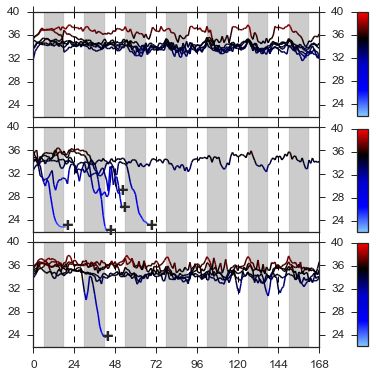

In [681]:
# from matplotlib import gridspec                         #special function
sns.set_context("notebook"); sns.set_style("ticks");
#fig = plt.figure(figsize=(24, 8)) #Figure size 
fig = plt.figure(figsize=(6, 6)) #Figure size 
gs1 = gridspec.GridSpec(3, 2, width_ratios=[1,0.1], height_ratios=[1,1,1], hspace=0.1,wspace=0.13) #Ratio of upper and lower subplots

ax0 = plt.subplot(gs1[0]); 
#Data - WT, Sham n=6
colorline(df5FKalb123['ZT'][0:170], df5FKalb123['cTemp'][0:170], linewidth=1.5)
colorline(df5FKalb128['ZT'][0:170], df5FKalb128['cTemp'][0:170], linewidth=1.5)
colorline(df5FK508['ZT'][0:170], df5FK508['cTemp'][0:170], linewidth=1.5)
colorline(df5FK509['ZT'][0:170], df5FK509['cTemp'][0:170], linewidth=1.5)
colorline(df5FK520['ZT'][0:170], df5FK520['cTemp'][0:170], linewidth=1.5)
colorline(df5FK521['ZT'][0:170], df5FK521['cTemp'][0:170], linewidth=1.5)
ax0.tick_params(labelsize=12)
plt.plot([24, 24], [-1000, 5000], 'k--', lw=1); plt.plot([48, 48], [-1000, 5000], 'k--', lw=1)
plt.plot([72, 72], [-1000, 5000], 'k--', lw=1); plt.plot([96, 96], [-1000, 5000], 'k--', lw=1)
plt.plot([120, 120], [-1000, 5000], 'k--', lw=1); plt.plot([144, 144], [-1000, 5000], 'k--', lw=1)
ax0.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax0.xaxis.set_ticklabels([])
ax0.axvspan(6,18,color='k',alpha=0.2);ax0.axvspan(30,42,color='k',alpha=0.2);ax0.axvspan(54,66,color='k',alpha=0.2);
ax0.axvspan(78,90, color='k', alpha=0.2);ax0.axvspan(102,114,color='k',alpha=0.2);
ax0.axvspan(126,138,color='k',alpha=0.2);ax0.axvspan(150,162,color='k',alpha=0.2)
ax0.yaxis.set_ticks(np.arange(24.0, 42.01, 4.0))
ax0.set_ylim(22.0, 40.0); ax0.set_xlim(0, 168)

ax1 = plt.subplot(gs1[1])
norm = mpl.colors.Normalize(vmin=22, vmax=40)
cb = mpl.colorbar.ColorbarBase(ax1, cmap=cmap, norm=norm, orientation='vertical', ticks=[20,24,28,32,36,40])
ax1.yaxis.set_ticks_position('left')
ax1.tick_params(labelsize=12)
ax1.set_position([0.875,0.66,0.024,0.24]) #More Right, MoreUp, MoreWidth, More Height 0.875,0.688,0.017,0.212

ax2 = plt.subplot(gs1[2]); 
#Data - WT, AP n=6
colorline(df5FK459['ZT'][0:53], df5FK459['cTemp'][0:53], linewidth=1.5)
colorline(df5FK460['ZT'][0:20], df5FK460['cTemp'][0:20], linewidth=1.5)
colorline(df5FK468['ZT'][0:45], df5FK468['cTemp'][0:45], linewidth=1.5)
colorline(df5FK473['ZT'][0:69], df5FK473['cTemp'][0:69], linewidth=1.5)
colorline(df5FK506['ZT'][0:52], df5FK506['cTemp'][0:52], linewidth=1.5)
colorline(df5FK507['ZT'][0:170], df5FK507['cTemp'][0:170], linewidth=1.5)
ax2.tick_params(labelsize=12)
plt.plot([24, 24], [-1000, 5000], 'k--', lw=1); plt.plot([48, 48], [-1000, 5000], 'k--', lw=1)
plt.plot([72, 72], [-1000, 5000], 'k--', lw=1); plt.plot([96, 96], [-1000, 5000], 'k--', lw=1)
plt.plot([120, 120], [-1000, 5000], 'k--', lw=1); plt.plot([144, 144], [-1000, 5000], 'k--', lw=1)
#plt.ylabel('Activity (x100 counts / hr)', fontsize=13)
ax2.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax2.xaxis.set_ticklabels([])
ax2.axvspan(6,18,color='k',alpha=0.2);ax2.axvspan(30,42,color='k',alpha=0.2);ax2.axvspan(54,66,color='k',alpha=0.2);
ax2.axvspan(78,90,color='k',alpha=0.2); ax2.axvspan(102,114,color='k',alpha=0.2);ax2.axvspan(126,138,color='k',alpha=0.2);ax2.axvspan(150,162, color='k', alpha=0.2)
ax2.yaxis.set_ticks(np.arange(24.0, 42.01, 4.0))
ax2.set_ylim(22.0, 40.0); ax2.set_xlim(0, 168)
ax2.text(20, 23, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')
ax2.text(53, 26, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')
ax2.text(45, 22, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')
ax2.text(69, 23, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')
ax2.text(52, 29, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')

ax3 = plt.subplot(gs1[3])
cb2 = mpl.colorbar.ColorbarBase(ax3, cmap=cmap, norm=norm, 
                                orientation='vertical', ticks=[20,24,28,32,36,40])
ax3.yaxis.set_ticks_position('left')
ax3.tick_params(labelsize=12)
ax3.set_position([0.875,0.390, 0.024, 0.24]) #More Right, MoreUp, MoreWidth, More Height

ax4 = plt.subplot(gs1[4])
#Data - KMO null, n=6
colorline(df5K1140['ZT'][0:170], df5K1140['cTemp'][0:170], linewidth=1.5)
colorline(df5K1141['ZT'][0:44],  df5K1141['cTemp'][0:44], linewidth=1.5)
colorline(df5K1166['ZT'][0:170], df5K1166['cTemp'][0:170], linewidth=1.5)
colorline(df5K1168['ZT'][0:170], df5K1168['cTemp'][0:170], linewidth=1.5)
colorline(df5K1191['ZT'][0:170], df5K1191['cTemp'][0:170], linewidth=1.5)
colorline(df5K1192['ZT'][0:170], df5K1192['cTemp'][0:170], linewidth=1.5)
ax4.text(43, 23.7, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')
ax4.tick_params(labelsize=12)
plt.plot([24, 24], [-1000, 5000], 'k--', lw=1); plt.plot([48, 48], [-1000, 5000], 'k--', lw=1)
plt.plot([72, 72], [-1000, 5000], 'k--', lw=1); plt.plot([96, 96], [-1000, 5000], 'k--', lw=1)
plt.plot([120, 120], [-1000, 5000], 'k--', lw=1); plt.plot([144, 144], [-1000, 5000], 'k--', lw=1)
#plt.ylabel('Activity\n (x100 counts / hr)', fontsize=13)
ax4.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax4.axvspan(6,18, color='k', alpha=0.2);ax4.axvspan(30,42, color='k', alpha=0.2);ax4.axvspan(54,66, color='k', alpha=0.2);
ax4.axvspan(78,90, color='k', alpha=0.2); ax4.axvspan(102,114, color='k', alpha=0.2);
ax4.axvspan(126,138, color='k', alpha=0.2);ax4.axvspan(150,162, color='k', alpha=0.2)
ax4.yaxis.set_ticks(np.arange(24.0, 42.01, 4.0))
ax4.set_ylim(22.0, 40.0); ax4.set_xlim(0, 168)

ax5 = plt.subplot(gs1[5])
norm = mpl.colors.Normalize(vmin=22, vmax=40)
cb = mpl.colorbar.ColorbarBase(ax5, cmap=cmap, norm=norm, 
                                orientation='vertical', ticks=[20,24,28,32,36,40])
ax5.yaxis.set_ticks_position('left')
ax5.tick_params(labelsize=12)
ax5.set_position([0.875,0.126, 0.024, 0.24]) #More Right, MoreUp, MoreWidth, More Height

plt.savefig('Temp_7day_HR_04jan18.png', dpi=1000)
plt.show()

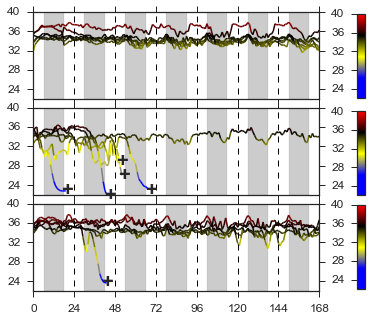

In [117]:
# from matplotlib import gridspec                         #special function
sns.set_context("notebook"); sns.set_style("ticks");
#fig = plt.figure(figsize=(24, 8)) #Figure size 
fig = plt.figure(figsize=(6, 5)) #Figure size 
gs1 = gridspec.GridSpec(3, 2, width_ratios=[1,0.1], height_ratios=[1,1,1], hspace=0.1,wspace=0.13) #Ratio of upper and lower subplots

ax0 = plt.subplot(gs1[0]); 
#Data - WT, Sham n=6
colorline(df5FKalb123['ZT'][0:170], df5FKalb123['cTemp'][0:170], linewidth=1.5)
colorline(df5FKalb128['ZT'][0:170], df5FKalb128['cTemp'][0:170], linewidth=1.5)
colorline(df5FK508['ZT'][0:170], df5FK508['cTemp'][0:170], linewidth=1.5)
colorline(df5FK509['ZT'][0:170], df5FK509['cTemp'][0:170], linewidth=1.5)
colorline(df5FK520['ZT'][0:170], df5FK520['cTemp'][0:170], linewidth=1.5)
colorline(df5FK521['ZT'][0:170], df5FK521['cTemp'][0:170], linewidth=1.5)
ax0.tick_params(labelsize=12)
plt.plot([24, 24], [-1000, 5000], 'k--', lw=1); plt.plot([48, 48], [-1000, 5000], 'k--', lw=1)
plt.plot([72, 72], [-1000, 5000], 'k--', lw=1); plt.plot([96, 96], [-1000, 5000], 'k--', lw=1)
plt.plot([120, 120], [-1000, 5000], 'k--', lw=1); plt.plot([144, 144], [-1000, 5000], 'k--', lw=1)
ax0.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax0.xaxis.set_ticklabels([])
ax0.axvspan(6,18,color='k',alpha=0.2);ax0.axvspan(30,42,color='k',alpha=0.2);ax0.axvspan(54,66,color='k',alpha=0.2);
ax0.axvspan(78,90, color='k', alpha=0.2);ax0.axvspan(102,114,color='k',alpha=0.2);
ax0.axvspan(126,138,color='k',alpha=0.2);ax0.axvspan(150,162,color='k',alpha=0.2)
ax0.yaxis.set_ticks(np.arange(24.0, 42.01, 4.0))
ax0.set_ylim(22.0, 40.0); ax0.set_xlim(0, 168)

ax1 = plt.subplot(gs1[1])
norm = mpl.colors.Normalize(vmin=22, vmax=40)
cb = mpl.colorbar.ColorbarBase(ax1, cmap=cmap, norm=norm, orientation='vertical', ticks=[20,24,28,32,36,40])
ax1.yaxis.set_ticks_position('left')
ax1.tick_params(labelsize=12)
ax1.set_position([0.875,0.66,0.017,0.234]) #More Right, MoreUp, MoreWidth, More Height 0.875,0.688,0.017,0.212

ax2 = plt.subplot(gs1[2]); 
#Data - WT, AP n=6
colorline(df5FK459['ZT'][0:53], df5FK459['cTemp'][0:53], linewidth=1.5)
colorline(df5FK460['ZT'][0:20], df5FK460['cTemp'][0:20], linewidth=1.5)
colorline(df5FK468['ZT'][0:45], df5FK468['cTemp'][0:45], linewidth=1.5)
colorline(df5FK473['ZT'][0:69], df5FK473['cTemp'][0:69], linewidth=1.5)
colorline(df5FK506['ZT'][0:52], df5FK506['cTemp'][0:52], linewidth=1.5)
colorline(df5FK507['ZT'][0:170], df5FK507['cTemp'][0:170], linewidth=1.5)
ax2.tick_params(labelsize=12)
plt.plot([24, 24], [-1000, 5000], 'k--', lw=1); plt.plot([48, 48], [-1000, 5000], 'k--', lw=1)
plt.plot([72, 72], [-1000, 5000], 'k--', lw=1); plt.plot([96, 96], [-1000, 5000], 'k--', lw=1)
plt.plot([120, 120], [-1000, 5000], 'k--', lw=1); plt.plot([144, 144], [-1000, 5000], 'k--', lw=1)
#plt.ylabel('Activity (x100 counts / hr)', fontsize=13)
ax2.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax2.xaxis.set_ticklabels([])
ax2.axvspan(6,18,color='k',alpha=0.2);ax2.axvspan(30,42,color='k',alpha=0.2);ax2.axvspan(54,66,color='k',alpha=0.2);
ax2.axvspan(78,90,color='k',alpha=0.2); ax2.axvspan(102,114,color='k',alpha=0.2);ax2.axvspan(126,138,color='k',alpha=0.2);ax2.axvspan(150,162, color='k', alpha=0.2)
ax2.yaxis.set_ticks(np.arange(24.0, 42.01, 4.0))
ax2.set_ylim(22.0, 40.0); ax2.set_xlim(0, 168)
ax2.text(20, 23, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')
ax2.text(53, 26, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')
ax2.text(45, 22, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')
ax2.text(69, 23, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')
ax2.text(52, 29, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')

ax3 = plt.subplot(gs1[3])
cb2 = mpl.colorbar.ColorbarBase(ax3, cmap=cmap, norm=norm, 
                                orientation='vertical', ticks=[20,24,28,32,36,40])
ax3.yaxis.set_ticks_position('left')
ax3.tick_params(labelsize=12)
ax3.set_position([0.875,0.390, 0.017, 0.234]) #More Right, MoreUp, MoreWidth, More Height

ax4 = plt.subplot(gs1[4])
#Data - KMO null, n=6
colorline(df5K1140['ZT'][0:170], df5K1140['cTemp'][0:170], linewidth=1.5)
colorline(df5K1141['ZT'][0:44],  df5K1141['cTemp'][0:44], linewidth=1.5)
colorline(df5K1166['ZT'][0:170], df5K1166['cTemp'][0:170], linewidth=1.5)
colorline(df5K1168['ZT'][0:170], df5K1168['cTemp'][0:170], linewidth=1.5)
colorline(df5K1191['ZT'][0:170], df5K1191['cTemp'][0:170], linewidth=1.5)
colorline(df5K1192['ZT'][0:170], df5K1192['cTemp'][0:170], linewidth=1.5)
ax4.text(43, 23.7, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')
ax4.tick_params(labelsize=12)
plt.plot([24, 24], [-1000, 5000], 'k--', lw=1); plt.plot([48, 48], [-1000, 5000], 'k--', lw=1)
plt.plot([72, 72], [-1000, 5000], 'k--', lw=1); plt.plot([96, 96], [-1000, 5000], 'k--', lw=1)
plt.plot([120, 120], [-1000, 5000], 'k--', lw=1); plt.plot([144, 144], [-1000, 5000], 'k--', lw=1)
#plt.ylabel('Activity\n (x100 counts / hr)', fontsize=13)
ax4.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax4.axvspan(6,18, color='k', alpha=0.2);ax4.axvspan(30,42, color='k', alpha=0.2);ax4.axvspan(54,66, color='k', alpha=0.2);
ax4.axvspan(78,90, color='k', alpha=0.2); ax4.axvspan(102,114, color='k', alpha=0.2);
ax4.axvspan(126,138, color='k', alpha=0.2);ax4.axvspan(150,162, color='k', alpha=0.2)
ax4.yaxis.set_ticks(np.arange(24.0, 42.01, 4.0))
ax4.set_ylim(22.0, 40.0); ax4.set_xlim(0, 168)

ax5 = plt.subplot(gs1[5])
norm = mpl.colors.Normalize(vmin=22, vmax=40)
cb = mpl.colorbar.ColorbarBase(ax5, cmap=cmap, norm=norm, 
                                orientation='vertical', ticks=[20,24,28,32,36,40])
ax5.yaxis.set_ticks_position('left')
ax5.tick_params(labelsize=12)
ax5.set_position([0.875,0.13, 0.017, 0.234]) #More Right, MoreUp, MoreWidth, More Height

plt.savefig('Temp_7day_HR_28dec17.png', dpi=1000)
plt.show()

In [221]:
# Topics: line, color, LineCollection, cmap, colorline, codex
'''
Defines a function colorline that draws a (multi-)colored 2D line with coordinates x and y.
The color is taken from optional data in z, and creates a LineCollection.

z can be:
- empty, in which case a default coloring will be used based on the position along the input arrays
- a single number, for a uniform color [this can also be accomplished with the usual plt.plot]
- an array of the length of at least the same length as x, to color according to this data
- an array of a smaller length, in which case the colors are repeated along the curve

The function colorline returns the LineCollection created, which can be modified afterwards.

See also: plt.streamplot
'''

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

#cmap3='bry'
#cmap3='gnuplot2'
#cmap2='GnBu'
#cmap2='cool'
#cmap3='jet'
#cmap3='nipy_spectral'
#cmap3=plt.get_cmap('viridis')
cmap3 = mpl.colors.ListedColormap(['r', 'r', 'navy', 'navy', '#FFFF00'])
#cmap2 = sns.palplot(sns.cubehelix_palette(8))
#cmap3 = 'ocean'
#cmap3 = 'gist_stern'
# -50,100,350,500,650,800
#norm=plt.Normalize(150,750)

# Data manipulation:
def make_segments(x, y):
    '''
    Create list of line segments from x and y coordinates, in the correct format for LineCollection:
    an array of the form numlines x (points per line) x 2 (x and y) array
    '''

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    return segments

# Interface to LineCollection:
def colorline3(x, y, z=None, cmap=cmap3, norm=plt.Normalize(50,800), linewidth=3, alpha=1.0):
    '''
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    '''
    
    # Default colors equally spaced on [0,1]:
    if z is None:
        z = np.linspace(0.0, 1.0, len(y))
           
    # Special case if a single number:
    if not hasattr(z, "__iter__"):  # to check for numerical input -- this is a hack
        z = np.array([z])
        
    z = np.asarray(y)
    
    segments = make_segments(x, y)
    lc2 = LineCollection(segments, array=z, cmap=cmap3, norm=plt.Normalize(50,800), linewidth=linewidth, alpha=alpha)
    
    ax1 = plt.gca()
    ax1.add_collection(lc2)
    
    return lc2
        
def clear_frame(ax1=None):
    if ax1 is None: 
        ax1 = plt.gca() 
    ax1.xaxis.set_visible(False) 
    ax1.yaxis.set_visible(False) 
    for spine in ax1.spines.itervalues(): 
        spine.set_visible(False)

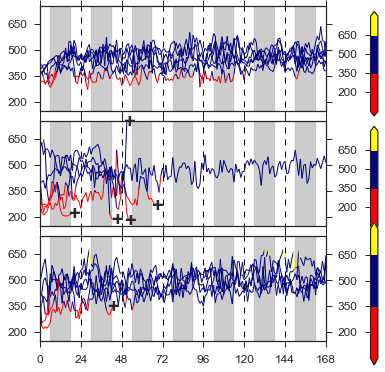

In [241]:
# from matplotlib import gridspec                         #special function
sns.set_context("notebook"); sns.set_style("ticks");
#fig = plt.figure(figsize=(24, 8)) #Figure size 
fig = plt.figure(figsize=(6, 6)) #Figure size 
gs1 = gridspec.GridSpec(3, 2, width_ratios=[1,0.1], height_ratios=[1,1,1], hspace=0.1,wspace=0.13) #Ratio of upper and lower subplots

ax0 = plt.subplot(gs1[0]); 
#Data - WT, Sham n=6
colorline3(df5FKalb123['ZT'][0:170], df5FKalb123['heart'][0:170], linewidth=1)
colorline3(df5FKalb128['ZT'][0:170], df5FKalb128['heart'][0:170], linewidth=1)
colorline3(df5FK508['ZT'][0:170], df5FK508['heart'][0:170], linewidth=1)
colorline3(df5FK509['ZT'][0:170], df5FK509['heart'][0:170], linewidth=1)
colorline3(df5FK520['ZT'][0:170], df5FK520['heart'][0:170], linewidth=1)
colorline3(df5FK521['ZT'][0:170], df5FK521['heart'][0:170], linewidth=1)
ax0.tick_params(labelsize=12)
plt.plot([24, 24], [-1000, 5000], 'k--', lw=1); plt.plot([48, 48], [-1000, 5000], 'k--', lw=1)
plt.plot([72, 72], [-1000, 5000], 'k--', lw=1); plt.plot([96, 96], [-1000, 5000], 'k--', lw=1)
plt.plot([120, 120], [-1000, 5000], 'k--', lw=1); plt.plot([144, 144], [-1000, 5000], 'k--', lw=1)
ax0.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax0.xaxis.set_ticklabels([])
ax0.axvspan(6,18,color='k',alpha=0.2);ax0.axvspan(30,42,color='k',alpha=0.2);ax0.axvspan(54,66,color='k',alpha=0.2);
ax0.axvspan(78,90, color='k', alpha=0.2);ax0.axvspan(102,114,color='k',alpha=0.2);
ax0.axvspan(126,138,color='k',alpha=0.2);ax0.axvspan(150,162,color='k',alpha=0.2)
ax0.yaxis.set_ticks(np.arange(200, 750.01, 150))
ax0.set_ylim(150, 750); ax0.set_xlim(0, 168)

ax1 = plt.subplot(gs1[1])
norm3 = mpl.colors.Normalize(vmin=50, vmax=800)
cb = mpl.colorbar.ColorbarBase(ax1, cmap=cmap3, norm=norm3, orientation='vertical', ticks=[200,350,500,650], extend='both', extendfrac=0.05)
ax1.yaxis.set_ticks_position('left')
ax1.tick_params(labelsize=12)
ax1.set_position([0.89,0.646,0.017,0.242]) #More Right, MoreUp, MoreWidth, More Height

ax2 = plt.subplot(gs1[2]); 
#Data - WT, AP n=6
colorline3(df5FK459['ZT'][0:53], df5FK459['heart'][0:53], linewidth=1)
colorline3(df5FK460['ZT'][0:20], df5FK460['heart'][0:20], linewidth=1)
colorline3(df5FK468['ZT'][0:45], df5FK468['heart'][0:45], linewidth=1)
colorline3(df5FK473['ZT'][0:69], df5FK473['heart'][0:69], linewidth=1)
colorline3(df5FK506['ZT'][0:52], df5FK506['heart'][0:52], linewidth=1)
colorline3(df5FK507['ZT'][0:170], df5FK507['heart'][0:170], linewidth=1)
ax2.tick_params(labelsize=12)
plt.plot([24, 24], [-1000, 5000], 'k--', lw=1); plt.plot([48, 48], [-1000, 5000], 'k--', lw=1)
plt.plot([72, 72], [-1000, 5000], 'k--', lw=1); plt.plot([96, 96], [-1000, 5000], 'k--', lw=1)
plt.plot([120, 120], [-1000, 5000], 'k--', lw=1); plt.plot([144, 144], [-1000, 5000], 'k--', lw=1)
#plt.ylabel('Activity (x100 counts / hr)', fontsize=13)
ax2.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax2.xaxis.set_ticklabels([])
ax2.axvspan(6,18,color='k',alpha=0.2);ax2.axvspan(30,42,color='k',alpha=0.2);ax2.axvspan(54,66,color='k',alpha=0.2);
ax2.axvspan(78,90,color='k',alpha=0.2); ax2.axvspan(102,114,color='k',alpha=0.2);ax2.axvspan(126,138,color='k',alpha=0.2);ax2.axvspan(150,162, color='k', alpha=0.2)
ax2.yaxis.set_ticks(np.arange(200, 750.01, 150))
ax2.set_ylim(150, 750); ax2.set_xlim(0, 168)
ax2.text(20, 224, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')
ax2.text(53, 182, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')
ax2.text(45, 185, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')
ax2.text(69, 269, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')
ax2.text(52, 749, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')

ax3 = plt.subplot(gs1[3])
cb2 = mpl.colorbar.ColorbarBase(ax3, cmap=cmap3, norm=norm3, 
                                orientation='vertical', ticks=[200,350,500,650], extend='both', extendfrac=0.05)
ax3.yaxis.set_ticks_position('left')
ax3.tick_params(labelsize=12)
ax3.set_position([0.89,0.380, 0.017, 0.242]) #More Right, MoreUp, MoreWidth, More Height

ax4 = plt.subplot(gs1[4])
#Data - KMO null, n=6
colorline3(df5K1140['ZT'][0:170], df5K1140['heart'][0:170], linewidth=1)
colorline3(df5K1141['ZT'][0:44],  df5K1141['heart'][0:44], linewidth=1)
colorline3(df5K1166['ZT'][0:170], df5K1166['heart'][0:170], linewidth=1)
colorline3(df5K1168['ZT'][0:170], df5K1168['heart'][0:170], linewidth=1)
colorline3(df5K1191['ZT'][0:170], df5K1191['heart'][0:170], linewidth=1)
colorline3(df5K1192['ZT'][0:170], df5K1192['heart'][0:170], linewidth=1)
ax4.text(43, 348, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')
ax4.tick_params(labelsize=12)
plt.plot([24, 24], [-1000, 5000], 'k--', lw=1); plt.plot([48, 48], [-1000, 5000], 'k--', lw=1)
plt.plot([72, 72], [-1000, 5000], 'k--', lw=1); plt.plot([96, 96], [-1000, 5000], 'k--', lw=1)
plt.plot([120, 120], [-1000, 5000], 'k--', lw=1); plt.plot([144, 144], [-1000, 5000], 'k--', lw=1)
#plt.ylabel('Activity\n (x100 counts / hr)', fontsize=13)
ax4.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax4.axvspan(6,18, color='k', alpha=0.2);ax4.axvspan(30,42, color='k', alpha=0.2);ax4.axvspan(54,66, color='k', alpha=0.2);
ax4.axvspan(78,90, color='k', alpha=0.2); ax4.axvspan(102,114, color='k', alpha=0.2);
ax4.axvspan(126,138, color='k', alpha=0.2);ax4.axvspan(150,162, color='k', alpha=0.2)
ax4.yaxis.set_ticks(np.arange(200, 750.01, 150))
ax4.set_ylim(150, 750); ax4.set_xlim(0, 168)

ax5 = plt.subplot(gs1[5])
cb = mpl.colorbar.ColorbarBase(ax5, cmap=cmap3, norm=norm3, 
                                orientation='vertical', ticks=[200,350,500,650], extend='both', extendfrac=0.05)
ax5.yaxis.set_ticks_position('left')
ax5.tick_params(labelsize=12)
ax5.set_position([0.89,0.07, 0.017, 0.330]) #More Right, MoreUp, MoreWidth, More Height

#plt.savefig('HR_7day_HR_23nov17.png', dpi=1000)
plt.show()

In [288]:
# Topics: line, color, LineCollection, cmap, colorline, codex
'''
Defines a function colorline that draws a (multi-)colored 2D line with coordinates x and y.
The color is taken from optional data in z, and creates a LineCollection.

z can be:
- empty, in which case a default coloring will be used based on the position along the input arrays
- a single number, for a uniform color [this can also be accomplished with the usual plt.plot]
- an array of the length of at least the same length as x, to color according to this data
- an array of a smaller length, in which case the colors are repeated along the curve

The function colorline returns the LineCollection created, which can be modified afterwards.

See also: plt.streamplot
'''

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

#cmap3='bry'
#cmap3='gnuplot2'
#cmap2='GnBu'
#cmap2='cool'
#cmap3='jet'
#cmap3='nipy_spectral'
#cmap3=plt.get_cmap('viridis')
cmap4 = mpl.colors.ListedColormap(['r', 'r', 'r', 'r', 
                                   'navy', 'navy', 'navy', 'navy', 'navy','navy', 
                                   '#FFFF00', '#FFFF00'])
#cmap2 = sns.palplot(sns.cubehelix_palette(8))
#cmap3 = 'ocean'
#cmap3 = 'gist_stern'
# -50,100,350,500,650,800
#norm=plt.Normalize(150,750)

# Data manipulation:
def make_segments(x, y):
    '''
    Create list of line segments from x and y coordinates, in the correct format for LineCollection:
    an array of the form numlines x (points per line) x 2 (x and y) array
    '''

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    return segments

# Interface to LineCollection:
def colorline4(x, y, z=None, cmap=cmap4, norm=plt.Normalize(150,750), linewidth=3, alpha=1.0):
    '''
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    '''
    
    # Default colors equally spaced on [0,1]:
    if z is None:
        z = np.linspace(0.0, 1.0, len(y))
           
    # Special case if a single number:
    if not hasattr(z, "__iter__"):  # to check for numerical input -- this is a hack
        z = np.array([z])
        
    z = np.asarray(y)
    
    segments = make_segments(x, y)
    lc2 = LineCollection(segments, array=z, cmap=cmap4, norm=plt.Normalize(150,750), linewidth=linewidth, alpha=alpha)
    
    ax1 = plt.gca()
    ax1.add_collection(lc2)
    
    return lc2
        
def clear_frame(ax1=None):
    if ax1 is None: 
        ax1 = plt.gca() 
    ax1.xaxis.set_visible(False) 
    ax1.yaxis.set_visible(False) 
    for spine in ax1.spines.itervalues(): 
        spine.set_visible(False)

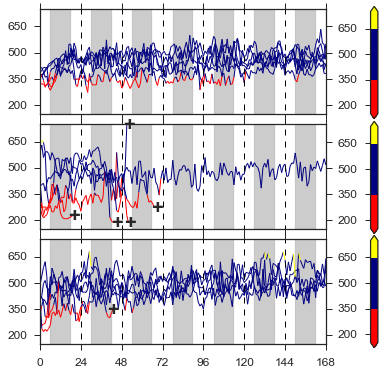

In [292]:
# from matplotlib import gridspec                         #special function
sns.set_context("notebook"); sns.set_style("ticks");
#fig = plt.figure(figsize=(24, 8)) #Figure size 
fig = plt.figure(figsize=(6, 6)) #Figure size 
gs1 = gridspec.GridSpec(3, 2, width_ratios=[1,0.1], height_ratios=[1,1,1], hspace=0.1,wspace=0.13) #Ratio of upper and lower subplots

ax0 = plt.subplot(gs1[0]); 
#Data - WT, Sham n=6
colorline4(df5FKalb123['ZT'][0:170], df5FKalb123['heart'][0:170], linewidth=1)
colorline4(df5FKalb128['ZT'][0:170], df5FKalb128['heart'][0:170], linewidth=1)
colorline4(df5FK508['ZT'][0:170], df5FK508['heart'][0:170], linewidth=1)
colorline4(df5FK509['ZT'][0:170], df5FK509['heart'][0:170], linewidth=1)
colorline4(df5FK520['ZT'][0:170], df5FK520['heart'][0:170], linewidth=1)
colorline4(df5FK521['ZT'][0:170], df5FK521['heart'][0:170], linewidth=1)
ax0.tick_params(labelsize=12)
plt.plot([24, 24], [-1000, 5000], 'k--', lw=1); plt.plot([48, 48], [-1000, 5000], 'k--', lw=1)
plt.plot([72, 72], [-1000, 5000], 'k--', lw=1); plt.plot([96, 96], [-1000, 5000], 'k--', lw=1)
plt.plot([120, 120], [-1000, 5000], 'k--', lw=1); plt.plot([144, 144], [-1000, 5000], 'k--', lw=1)
ax0.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax0.xaxis.set_ticklabels([])
ax0.axvspan(6,18,color='k',alpha=0.2);ax0.axvspan(30,42,color='k',alpha=0.2);ax0.axvspan(54,66,color='k',alpha=0.2);
ax0.axvspan(78,90, color='k', alpha=0.2);ax0.axvspan(102,114,color='k',alpha=0.2);
ax0.axvspan(126,138,color='k',alpha=0.2);ax0.axvspan(150,162,color='k',alpha=0.2)
ax0.yaxis.set_ticks(np.arange(200, 750.01, 150))
ax0.set_ylim(150, 750); ax0.set_xlim(0, 168)

ax1 = plt.subplot(gs1[1])
norm4 = mpl.colors.Normalize(vmin=150, vmax=750)
cb = mpl.colorbar.ColorbarBase(ax1, cmap=cmap4, norm=norm4, orientation='vertical', ticks=[200,350,500,650], extend='both', extendfrac=0.05)
ax1.yaxis.set_ticks_position('left')
ax1.tick_params(labelsize=12)
ax1.set_position([0.89,0.646,0.017,0.260]) #More Right, MoreUp, MoreWidth, More Height

ax2 = plt.subplot(gs1[2]); 
#Data - WT, AP n=6
colorline4(df5FK459['ZT'][0:53], df5FK459['heart'][0:53], linewidth=1)
colorline4(df5FK460['ZT'][0:20], df5FK460['heart'][0:20], linewidth=1)
colorline4(df5FK468['ZT'][0:45], df5FK468['heart'][0:45], linewidth=1)
colorline4(df5FK473['ZT'][0:69], df5FK473['heart'][0:69], linewidth=1)
colorline4(df5FK506['ZT'][0:52], df5FK506['heart'][0:52], linewidth=1)
colorline4(df5FK507['ZT'][0:170], df5FK507['heart'][0:170], linewidth=1)
ax2.tick_params(labelsize=12)
plt.plot([24, 24], [-1000, 5000], 'k--', lw=1); plt.plot([48, 48], [-1000, 5000], 'k--', lw=1)
plt.plot([72, 72], [-1000, 5000], 'k--', lw=1); plt.plot([96, 96], [-1000, 5000], 'k--', lw=1)
plt.plot([120, 120], [-1000, 5000], 'k--', lw=1); plt.plot([144, 144], [-1000, 5000], 'k--', lw=1)
#plt.ylabel('Activity (x100 counts / hr)', fontsize=13)
ax2.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax2.xaxis.set_ticklabels([])
ax2.axvspan(6,18,color='k',alpha=0.2);ax2.axvspan(30,42,color='k',alpha=0.2);ax2.axvspan(54,66,color='k',alpha=0.2);
ax2.axvspan(78,90,color='k',alpha=0.2); ax2.axvspan(102,114,color='k',alpha=0.2);ax2.axvspan(126,138,color='k',alpha=0.2);ax2.axvspan(150,162, color='k', alpha=0.2)
ax2.yaxis.set_ticks(np.arange(200, 750.01, 150))
ax2.set_ylim(150, 750); ax2.set_xlim(0, 168)
ax2.text(20, 224, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')
ax2.text(53, 182, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')
ax2.text(45, 185, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')
ax2.text(69, 269, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')
ax2.text(52, 749, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')

ax3 = plt.subplot(gs1[3])
cb = mpl.colorbar.ColorbarBase(ax3, cmap=cmap4, norm=norm4, 
                                orientation='vertical', ticks=[200,350,500,650], extend='both', extendfrac=0.05)
ax3.yaxis.set_ticks_position('left')
ax3.tick_params(labelsize=12)
ax3.set_position([0.89,0.380, 0.017, 0.260]) #More Right, MoreUp, MoreWidth, More Height

ax4 = plt.subplot(gs1[4])
#Data - KMO null, n=6
colorline4(df5K1140['ZT'][0:170], df5K1140['heart'][0:170], linewidth=1)
colorline4(df5K1141['ZT'][0:44],  df5K1141['heart'][0:44], linewidth=1)
colorline4(df5K1166['ZT'][0:170], df5K1166['heart'][0:170], linewidth=1)
colorline4(df5K1168['ZT'][0:170], df5K1168['heart'][0:170], linewidth=1)
colorline4(df5K1191['ZT'][0:170], df5K1191['heart'][0:170], linewidth=1)
colorline4(df5K1192['ZT'][0:170], df5K1192['heart'][0:170], linewidth=1)
ax4.text(43, 348, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')
ax4.tick_params(labelsize=12)
plt.plot([24, 24], [-1000, 5000], 'k--', lw=1); plt.plot([48, 48], [-1000, 5000], 'k--', lw=1)
plt.plot([72, 72], [-1000, 5000], 'k--', lw=1); plt.plot([96, 96], [-1000, 5000], 'k--', lw=1)
plt.plot([120, 120], [-1000, 5000], 'k--', lw=1); plt.plot([144, 144], [-1000, 5000], 'k--', lw=1)
#plt.ylabel('Activity\n (x100 counts / hr)', fontsize=13)
ax4.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax4.axvspan(6,18, color='k', alpha=0.2);ax4.axvspan(30,42, color='k', alpha=0.2);ax4.axvspan(54,66, color='k', alpha=0.2);
ax4.axvspan(78,90, color='k', alpha=0.2); ax4.axvspan(102,114, color='k', alpha=0.2);
ax4.axvspan(126,138, color='k', alpha=0.2);ax4.axvspan(150,162, color='k', alpha=0.2)
ax4.yaxis.set_ticks(np.arange(200, 750.01, 150))
ax4.set_ylim(150, 750); ax4.set_xlim(0, 168)

ax5 = plt.subplot(gs1[5])
cb = mpl.colorbar.ColorbarBase(ax5, cmap=cmap4, norm=norm4, orientation='vertical', 
                               ticks=[200,350,500,650], extend='both', extendfrac=0.05)
ax5.yaxis.set_ticks_position('left')
ax5.tick_params(labelsize=12)
ax5.set_position([0.89,0.1160, 0.017, 0.260]) #More Right, MoreUp, MoreWidth, More Height

#plt.savefig('HR_7day_HR_23nov17.png', dpi=1000)
plt.show()

In [308]:
# Topics: line, color, LineCollection, cmap, colorline, codex
'''
Defines a function colorline that draws a (multi-)colored 2D line with coordinates x and y.
The color is taken from optional data in z, and creates a LineCollection.

z can be:
- empty, in which case a default coloring will be used based on the position along the input arrays
- a single number, for a uniform color [this can also be accomplished with the usual plt.plot]
- an array of the length of at least the same length as x, to color according to this data
- an array of a smaller length, in which case the colors are repeated along the curve

The function colorline returns the LineCollection created, which can be modified afterwards.

See also: plt.streamplot
'''

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

#cmap3='bry'
#cmap3='gnuplot2'
#cmap2='GnBu'
#cmap2='cool'
#cmap3='jet'
#cmap3='nipy_spectral'
#cmap3=plt.get_cmap('viridis')
cmap5 = mpl.colors.ListedColormap(['r', 'r', 'r', 'navy', 'navy', 'navy'])
#cmap2 = sns.palplot(sns.cubehelix_palette(8))
#cmap3 = 'ocean'
#cmap3 = 'gist_stern'
# -50,100,350,500,650,800
#norm=plt.Normalize(150,750)

# Data manipulation:
def make_segments(x, y):
    '''
    Create list of line segments from x and y coordinates, in the correct format for LineCollection:
    an array of the form numlines x (points per line) x 2 (x and y) array
    '''

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    return segments

# Interface to LineCollection:
def colorline5(x, y, z=None, cmap=cmap5, norm=plt.Normalize(0,800), linewidth=3, alpha=1.0):
    '''
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    '''
    
    # Default colors equally spaced on [0,1]:
    if z is None:
        z = np.linspace(0.0, 1.0, len(y))
           
    # Special case if a single number:
    if not hasattr(z, "__iter__"):  # to check for numerical input -- this is a hack
        z = np.array([z])
        
    z = np.asarray(y)
    
    segments = make_segments(x, y)
    lc2 = LineCollection(segments, array=z, cmap=cmap5, norm=plt.Normalize(0,800), linewidth=linewidth, alpha=alpha)
    
    ax1 = plt.gca()
    ax1.add_collection(lc2)
    
    return lc2
        
def clear_frame(ax1=None):
    if ax1 is None: 
        ax1 = plt.gca() 
    ax1.xaxis.set_visible(False) 
    ax1.yaxis.set_visible(False) 
    for spine in ax1.spines.itervalues(): 
        spine.set_visible(False)

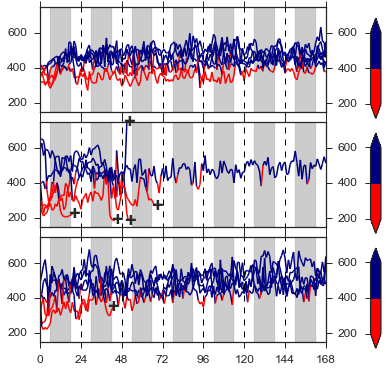

In [680]:
# from matplotlib import gridspec                         #special function
sns.set_context("notebook"); sns.set_style("ticks");
#fig = plt.figure(figsize=(24, 8)) #Figure size 
fig = plt.figure(figsize=(6, 6)) #Figure size 
gs1 = gridspec.GridSpec(3, 2, width_ratios=[1,0.1], height_ratios=[1,1,1], hspace=0.1,wspace=0.13) #Ratio of upper and lower subplots

ax0 = plt.subplot(gs1[0]); 
#Data - WT, Sham n=6
colorline5(df5FKalb123['ZT'][0:170], df5FKalb123['heart'][0:170], linewidth=1.5)
colorline5(df5FKalb128['ZT'][0:170], df5FKalb128['heart'][0:170], linewidth=1.5)
colorline5(df5FK508['ZT'][0:170], df5FK508['heart'][0:170], linewidth=1.5)
colorline5(df5FK509['ZT'][0:170], df5FK509['heart'][0:170], linewidth=1.5)
colorline5(df5FK520['ZT'][0:170], df5FK520['heart'][0:170], linewidth=1.5)
colorline5(df5FK521['ZT'][0:170], df5FK521['heart'][0:170], linewidth=1.5)
ax0.tick_params(labelsize=12)
plt.plot([24, 24], [-1000, 5000], 'k--', lw=1); plt.plot([48, 48], [-1000, 5000], 'k--', lw=1)
plt.plot([72, 72], [-1000, 5000], 'k--', lw=1); plt.plot([96, 96], [-1000, 5000], 'k--', lw=1)
plt.plot([120, 120], [-1000, 5000], 'k--', lw=1); plt.plot([144, 144], [-1000, 5000], 'k--', lw=1)
ax0.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax0.xaxis.set_ticklabels([])
ax0.axvspan(6,18,color='k',alpha=0.2);ax0.axvspan(30,42,color='k',alpha=0.2);ax0.axvspan(54,66,color='k',alpha=0.2);
ax0.axvspan(78,90, color='k', alpha=0.2);ax0.axvspan(102,114,color='k',alpha=0.2);
ax0.axvspan(126,138,color='k',alpha=0.2);ax0.axvspan(150,162,color='k',alpha=0.2)
ax0.yaxis.set_ticks(np.arange(200, 750.01, 200))
ax0.set_ylim(150, 750); ax0.set_xlim(0, 168)

ax1 = plt.subplot(gs1[1])
norm4 = mpl.colors.Normalize(vmin=200, vmax=600)
cb = mpl.colorbar.ColorbarBase(ax1, cmap=cmap5, norm=norm4, orientation='vertical', ticks=[200,400,600], extend='both', extendfrac=0.20)
ax1.yaxis.set_ticks_position('left')
ax1.tick_params(labelsize=12)
ax1.set_position([0.89,0.642,0.024,0.232]) #More Right, MoreUp, MoreWidth, More Height

ax2 = plt.subplot(gs1[2]); 
#Data - WT, AP n=6
colorline5(df5FK459['ZT'][0:53], df5FK459['heart'][0:53], linewidth=1.5)
colorline5(df5FK460['ZT'][0:20], df5FK460['heart'][0:20], linewidth=1.5)
colorline5(df5FK468['ZT'][0:45], df5FK468['heart'][0:45], linewidth=1.5)
colorline5(df5FK473['ZT'][0:69], df5FK473['heart'][0:69], linewidth=1.5)
colorline5(df5FK506['ZT'][0:52], df5FK506['heart'][0:52], linewidth=1.5)
colorline5(df5FK507['ZT'][0:170], df5FK507['heart'][0:170], linewidth=1.5)
ax2.tick_params(labelsize=12)
plt.plot([24, 24], [-1000, 5000], 'k--', lw=1); plt.plot([48, 48], [-1000, 5000], 'k--', lw=1)
plt.plot([72, 72], [-1000, 5000], 'k--', lw=1); plt.plot([96, 96], [-1000, 5000], 'k--', lw=1)
plt.plot([120, 120], [-1000, 5000], 'k--', lw=1); plt.plot([144, 144], [-1000, 5000], 'k--', lw=1)
#plt.ylabel('Activity (x100 counts / hr)', fontsize=13)
ax2.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax2.xaxis.set_ticklabels([])
ax2.axvspan(6,18,color='k',alpha=0.2);ax2.axvspan(30,42,color='k',alpha=0.2);ax2.axvspan(54,66,color='k',alpha=0.2);
ax2.axvspan(78,90,color='k',alpha=0.2); ax2.axvspan(102,114,color='k',alpha=0.2);ax2.axvspan(126,138,color='k',alpha=0.2);ax2.axvspan(150,162, color='k', alpha=0.2)
ax2.yaxis.set_ticks(np.arange(200, 750.01, 200))
ax2.set_ylim(150, 750); ax2.set_xlim(0, 168)
ax2.text(20, 224, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')
ax2.text(53, 182, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')
ax2.text(45, 185, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')
ax2.text(69, 269, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')
ax2.text(52, 749, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')

ax3 = plt.subplot(gs1[3])
cb = mpl.colorbar.ColorbarBase(ax3, cmap=cmap5, norm=norm4, 
                                orientation='vertical', ticks=[200,400,600], extend='both', extendfrac=0.20)
ax3.yaxis.set_ticks_position('left')
ax3.tick_params(labelsize=12)
ax3.set_position([0.89,0.376, 0.024, 0.232]) #More Right, MoreUp, MoreWidth, More Height

ax4 = plt.subplot(gs1[4])
#Data - KMO null, n=6
colorline5(df5K1140['ZT'][0:170], df5K1140['heart'][0:170], linewidth=1.5)
colorline5(df5K1141['ZT'][0:44],  df5K1141['heart'][0:44], linewidth=1.5)
colorline5(df5K1166['ZT'][0:170], df5K1166['heart'][0:170], linewidth=1.5)
colorline5(df5K1168['ZT'][0:170], df5K1168['heart'][0:170], linewidth=1.5)
colorline5(df5K1191['ZT'][0:170], df5K1191['heart'][0:170], linewidth=1.5)
colorline5(df5K1192['ZT'][0:170], df5K1192['heart'][0:170], linewidth=1.5)
ax4.text(43, 348, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')
ax4.tick_params(labelsize=12)
plt.plot([24, 24], [-1000, 5000], 'k--', lw=1); plt.plot([48, 48], [-1000, 5000], 'k--', lw=1)
plt.plot([72, 72], [-1000, 5000], 'k--', lw=1); plt.plot([96, 96], [-1000, 5000], 'k--', lw=1)
plt.plot([120, 120], [-1000, 5000], 'k--', lw=1); plt.plot([144, 144], [-1000, 5000], 'k--', lw=1)
#plt.ylabel('Activity\n (x100 counts / hr)', fontsize=13)
ax4.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax4.axvspan(6,18, color='k', alpha=0.2);ax4.axvspan(30,42, color='k', alpha=0.2);ax4.axvspan(54,66, color='k', alpha=0.2);
ax4.axvspan(78,90, color='k', alpha=0.2); ax4.axvspan(102,114, color='k', alpha=0.2);
ax4.axvspan(126,138, color='k', alpha=0.2);ax4.axvspan(150,162, color='k', alpha=0.2)
ax4.yaxis.set_ticks(np.arange(200, 750.01, 200))
ax4.set_ylim(150, 750); ax4.set_xlim(0, 168)

ax5 = plt.subplot(gs1[5])
cb = mpl.colorbar.ColorbarBase(ax5, cmap=cmap5, norm=norm4, orientation='vertical', 
                               ticks=[200,400,600], extend='both', extendfrac=0.20)
ax5.yaxis.set_ticks_position('left')
ax5.tick_params(labelsize=12)
ax5.set_position([0.89,0.1100, 0.024, 0.232]) #More Right, MoreUp, MoreWidth, More Height

plt.savefig('HR_7day_HR_04jan17.png', dpi=1000)
plt.show()

In [267]:
# -50,100,350,500,650,800
# 200,350,500,650

In [262]:
#KMO wt - Sham
#FKalb123 (EM09) A; FKalb128 (EM06) B; FK508 (EM03) C; FK509 (EM04) D; FK520 (EM03) E; FK521 (EM04) F;

#KMO null - AP
#K1140 (EM09) G; K1141 (EM06) H; K1166 (EM03) I; K1168 (EM04) J; K1191 (EM03) K; K1192 (EM04) L;

#KMO wt - AP
#FK459 (EM03) M; FK460 (EM04) N; FK468 (EM03) O; FK473 (EM04) P; FK506 (EM09) Q; FK507 (EM06) R;

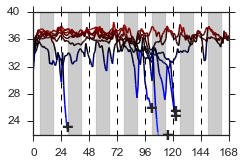

In [434]:
sns.set_context("notebook"); sns.set_style("ticks"); fig = plt.figure(figsize=(4.1, 2.2)) #Figure size 
#gs1 = gridspec.GridSpec(1, 2, width_ratios=[1,0.1], wspace=0.13) #Ratio of upper and lower subplots

ax0 = plt.subplot(gs1[0])
colorline(df5A381['ZT'][0:10080], df5A381['temp'][0:10080], linewidth=1.5)
colorline(df5A383['ZT'][0:10080], df5A383['temp'][0:10080], linewidth=1.5)
colorline(df5A384['ZT'][0:10080], df5A384['temp'][0:10080], linewidth=1.5)
colorline(df5A388['ZT'][0:10080], df5A388['temp'][0:10080], linewidth=1.5)
colorline(df5A390['ZT'][0:10080], df5A390['temp'][0:10080], linewidth=1.5)
colorline(df5A391['ZT'][0:10080], df5A391['temp'][0:10080], linewidth=1.5)
colorline(df5A392['ZT'][0:10080], df5A392['temp'][0:10080], linewidth=1.5)
colorline(df5A393['ZT'][0:10080], df5A393['temp'][0:10080], linewidth=1.5)
ax0.tick_params(labelsize=12)

plt.plot([24, 24], [20, 40], 'k--', lw=1); plt.plot([48, 48], [20, 40], 'k--', lw=1)
plt.plot([72, 72], [20, 40], 'k--', lw=1); plt.plot([96, 96], [20, 40], 'k--', lw=1)
plt.plot([120, 120], [20, 40], 'k--', lw=1); plt.plot([144, 144], [20, 40], 'k--', lw=1)
#plt.ylabel('Temperature ($^\circ$C)', fontsize=14)

ax0.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax0.axvspan(6,18,color='k',alpha=0.2);ax0.axvspan(30,42,color='k',alpha=0.2);
ax0.axvspan(54,66,color='k',alpha=0.2); ax0.axvspan(78,90, color='k', alpha=0.2)
ax0.axvspan(102,114,color='k',alpha=0.2);ax0.axvspan(126,138,color='k',alpha=0.2);
ax0.axvspan(150,162,color='k',alpha=0.2); ax0.yaxis.set_ticks(np.arange(24.0,42.01,4.0))
ax0.set_ylim(22.0,40.0); ax0.set_xlim(0,168)

ax0.text(122, 24.6, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold') #A383
ax0.text(122, 25.3, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold') #A388
ax0.text(101, 25.8, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold') #A391
ax0.text(29, 22.9, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold') #A392
ax0.text(115, 21.8, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold') #A393

#ax1 = plt.subplot(gs1[1])
#norm = mpl.colors.Normalize(vmin=22, vmax=40)
#cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap, norm=norm, orientation='vertical', ticks=[20,24,28,32,36,40])
#ax1.yaxis.set_ticks_position('left'); ax1.tick_params(labelsize=12)
#plt.subplots_adjust(bottom=0.2, wspace = 0.1)
#ax1.set_position([0.904,0.20, 0.017, 0.70]) #More Right, MoreUp, MoreWidth
plt.savefig('Temps_7day_03jan17_DrugWater.png', dpi=1000)
plt.show()

In [ ]:
fig = plt.figure(figsize=(10.4, 2.2)) #Figure size 
gs1 = gridspec.GridSpec(1, 4, width_ratios=[1,1,1,0.1], wspace=0.13) #Ratio of upper and lower subplots

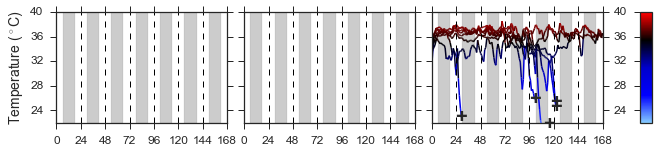

In [439]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap
sns.set_context("notebook"); sns.set_style("ticks");
fig = plt.figure(figsize=(10.4, 2.2)) #Figure size 
gs1 = gridspec.GridSpec(1, 4, width_ratios=[1,1,1,0.1], wspace=0.13) #Ratio of upper and lower subplots

ax0 = plt.subplot(gs1[0])
#Data - WT, AP (n=9)
ax0.tick_params(labelsize=12)
plt.plot([24, 24], [20, 50], 'k--', lw=1); plt.plot([48, 48], [20, 50], 'k--', lw=1)
plt.plot([72, 72], [20, 50], 'k--', lw=1); plt.plot([96, 96], [20, 50], 'k--', lw=1)
plt.plot([120, 120], [20, 50], 'k--', lw=1); plt.plot([144, 144], [20, 50], 'k--', lw=1)
plt.ylabel('Temperature ($^\circ$C)', fontsize=14)
ax0.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax0.axvspan(6,18,color='k',alpha=0.2);ax0.axvspan(30,42,color='k',alpha=0.2);
ax0.axvspan(54,66,color='k',alpha=0.2); ax0.axvspan(78,90, color='k', alpha=0.2)
ax0.axvspan(102,114,color='k',alpha=0.2);ax0.axvspan(126,138,color='k',alpha=0.2);
ax0.axvspan(150,162,color='k',alpha=0.2); 
ax0.yaxis.set_ticks(np.arange(24.0,42.01,4.0))
ax0.set_ylim(22.0,40.0); ax0.set_xlim(0,168)

ax1 = plt.subplot(gs1[1]); 
#Data - KMO null, AP n=8
ax1.tick_params(labelsize=12)
plt.plot([24, 24], [20, 50], 'k--', lw=1); plt.plot([48, 48], [20, 50], 'k--', lw=1)
plt.plot([72, 72], [20, 50], 'k--', lw=1); plt.plot([96, 96], [20, 50], 'k--', lw=1)
plt.plot([120, 120], [20, 50], 'k--', lw=1); plt.plot([144, 144], [20, 50], 'k--', lw=1)
ax1.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax1.axvspan(6,18,color='k',alpha=0.2);ax1.axvspan(30,42,color='k',alpha=0.2);
ax1.axvspan(54,66,color='k',alpha=0.2);ax1.axvspan(78,90,color='k',alpha=0.2); 
ax1.axvspan(102,114,color='k',alpha=0.2);ax1.axvspan(126,138,color='k',alpha=0.2);
ax1.axvspan(150,162, color='k', alpha=0.2)
ax1.yaxis.set_ticklabels([])
ax1.yaxis.set_ticks(np.arange(24.0,42.01,4.0))
ax1.set_ylim(22.0,40.0); ax1.set_xlim(0,168)

ax2 = plt.subplot(gs1[2])
#Data - KMO albcre, AP n=10
colorline(df5A381['ZT'][0:10080], df5A381['temp'][0:10080], linewidth=1.5)
colorline(df5A383['ZT'][0:10080], df5A383['temp'][0:10080], linewidth=1.5)
colorline(df5A384['ZT'][0:10080], df5A384['temp'][0:10080], linewidth=1.5)
colorline(df5A388['ZT'][0:10080], df5A388['temp'][0:10080], linewidth=1.5)
colorline(df5A390['ZT'][0:10080], df5A390['temp'][0:10080], linewidth=1.5)
colorline(df5A391['ZT'][0:10080], df5A391['temp'][0:10080], linewidth=1.5)
colorline(df5A392['ZT'][0:10080], df5A392['temp'][0:10080], linewidth=1.5)
colorline(df5A393['ZT'][0:10080], df5A393['temp'][0:10080], linewidth=1.5)
ax2.tick_params(labelsize=12)
plt.plot([24, 24], [20, 50], 'k--', lw=1); plt.plot([48, 48], [20, 50], 'k--', lw=1)
plt.plot([72, 72], [20, 50], 'k--', lw=1); plt.plot([96, 96], [20, 50], 'k--', lw=1)
plt.plot([120, 120], [20, 50], 'k--', lw=1); plt.plot([144, 144], [20, 50], 'k--', lw=1)
ax2.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax2.axvspan(6,18, color='k', alpha=0.2);ax2.axvspan(30,42, color='k', alpha=0.2);
ax2.axvspan(54,66, color='k', alpha=0.2);ax2.axvspan(78,90, color='k', alpha=0.2);
ax2.axvspan(102,114, color='k', alpha=0.2);ax2.axvspan(126,138, color='k', alpha=0.2);
ax2.axvspan(150,162, color='k', alpha=0.2)
ax2.yaxis.set_ticks(np.arange(24.0, 42.01, 4.0))
ax2.yaxis.set_ticklabels([])
ax2.set_ylim(22.0, 40.0); ax2.set_xlim(0, 168)

ax2.text(122, 24.6, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold') #A383
ax2.text(122, 25.3, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold') #A388
ax2.text(101, 25.8, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold') #A391
ax2.text(29, 22.9, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold') #A392
ax2.text(115, 21.8, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold') #A393

ax3 = plt.subplot(gs1[3])
norm = mpl.colors.Normalize(vmin=22, vmax=40)
cb1 = mpl.colorbar.ColorbarBase(ax3, cmap=cmap, norm=norm, orientation='vertical', ticks=[20,24,28,32,36,40])
ax3.yaxis.set_ticks_position('left')
ax3.tick_params(labelsize=12)
plt.subplots_adjust(bottom=0.2, wspace = 0.1)
ax3.set_position([0.904,0.20, 0.017, 0.70]) #More Right, MoreUp, MoreWidth
plt.savefig('Temps_7day_03jan18_DrugWater.png', dpi=1000)
plt.show()

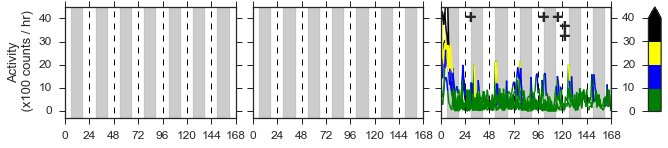

In [449]:
from matplotlib import gridspec                         #special function
sns.set_context("notebook"); sns.set_style("ticks");
#fig = plt.figure(figsize=(24, 8)) #Figure size 
fig = plt.figure(figsize=(10.4, 2.2)) #Figure size 
gs1 = gridspec.GridSpec(1, 4, width_ratios=[1,1,1,0.1], wspace=0.13) #Ratio of upper and lower subplots

ax0 = plt.subplot(gs1[0]); 
#Data - WT, Sham (n=7/7)
ax0.tick_params(labelsize=12)
plt.plot([24, 24], [-1000, 5000], 'k--', lw=1); plt.plot([48, 48], [-1000, 5000], 'k--', lw=1)
plt.plot([72, 72], [-1000, 5000], 'k--', lw=1); plt.plot([96, 96], [-1000, 5000], 'k--', lw=1)
plt.plot([120, 120], [-1000, 5000], 'k--', lw=1); plt.plot([144, 144], [-1000, 5000], 'k--', lw=1)
plt.ylabel('Activity\n (x100 counts / hr)', fontsize=13)

ax1 = plt.subplot(gs1[1]); 
#Data - KMO null, Sham (n=7/7)
ax1.tick_params(labelsize=12)
plt.plot([24, 24], [-1000, 5000], 'k--', lw=1); plt.plot([48, 48], [-1000, 5000], 'k--', lw=1)
plt.plot([72, 72], [-1000, 5000], 'k--', lw=1); plt.plot([96, 96], [-1000, 5000], 'k--', lw=1)
plt.plot([120, 120], [-1000, 5000], 'k--', lw=1); plt.plot([144, 144], [-1000, 5000], 'k--', lw=1)
ax1.yaxis.set_ticklabels([])

ax2 = plt.subplot(gs1[2])
#Data - KMO albcre, Sham (n=7/7)
#colorline2(df5A227['ZT'][0:10080], df5A227['actHund'][0:10080], linewidth=1)
#colorline2(df5A234['ZT'][0:10080], df5A234['actHund'][0:10080], linewidth=1)
#colorline2(df5A243['ZT'][0:10080], df5A243['actHund'][0:10080], linewidth=1)
#colorline2(df5A252['ZT'][0:10080], df5A252['actHund'][0:10080], linewidth=1)
#colorline2(df5A253['ZT'][0:10080], df5A253['actHund'][0:10080], linewidth=1)
#colorline2(df5A270['ZT'][0:10080], df5A270['actHund'][0:10080], linewidth=1)

colorline2(df5A381['ZT'][0:10080], df5A381['actHund'][0:10080], linewidth=1.5)
colorline2(df5A383['ZT'][0:10080], df5A383['actHund'][0:10080], linewidth=1.5)
colorline2(df5A384['ZT'][0:10080], df5A384['actHund'][0:10080], linewidth=1.5)
colorline2(df5A388['ZT'][0:10080], df5A388['actHund'][0:10080], linewidth=1.5)
colorline2(df5A390['ZT'][0:10080], df5A390['actHund'][0:10080], linewidth=1.5)
colorline2(df5A391['ZT'][0:10080], df5A391['actHund'][0:10080], linewidth=1.5)
colorline2(df5A392['ZT'][0:10080], df5A392['actHund'][0:10080], linewidth=1.5)
colorline2(df5A393['ZT'][0:10080], df5A393['actHund'][0:10080], linewidth=1.5)



colorline2(df5A282['ZT'][0:10080], df5A282['act'][0:10080], linewidth=0.8)
ax2.tick_params(labelsize=12)
plt.plot([24, 24], [-1000, 5000], 'k--', lw=1); plt.plot([48, 48], [-1000, 5000], 'k--', lw=1)
plt.plot([72, 72], [-1000, 5000], 'k--', lw=1); plt.plot([96, 96], [-1000, 5000], 'k--', lw=1)
plt.plot([120, 120], [-1000, 5000], 'k--', lw=1); plt.plot([144, 144], [-1000, 5000], 'k--', lw=1)
ax2.yaxis.set_ticklabels([])

#Dark phase panels in upper left subplot
ax0.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax0.axvspan(6,18,color='k',alpha=0.2);ax0.axvspan(30,42,color='k',alpha=0.2);ax0.axvspan(54,66,color='k',alpha=0.2);ax0.axvspan(78,90, color='k', alpha=0.2)
ax0.axvspan(102,114,color='k',alpha=0.2);ax0.axvspan(126,138,color='k',alpha=0.2);ax0.axvspan(150,162,color='k',alpha=0.2)
ax0.yaxis.set_ticks(np.arange(0,50,10))
#Set upper subplot limits
ax0.set_ylim(-3,45); ax0.set_xlim(0,168)

#Dark phase panels in upper middle subplot
ax1.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax1.axvspan(6,18,color='k',alpha=0.2);ax1.axvspan(30,42,color='k',alpha=0.2);ax1.axvspan(54,66,color='k',alpha=0.2);
ax1.axvspan(78,90,color='k',alpha=0.2); ax1.axvspan(102,114,color='k',alpha=0.2);ax1.axvspan(126,138,color='k',alpha=0.2);ax1.axvspan(150,162, color='k', alpha=0.2)
ax1.yaxis.set_ticks(np.arange(0,50,10))
ax1.set_ylim(-3,45); ax1.set_xlim(0,168)

#Dark phase panels in upper right subplot
ax2.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax2.axvspan(6,18, color='k', alpha=0.2);ax2.axvspan(30,42, color='k', alpha=0.2);ax2.axvspan(54,66, color='k', alpha=0.2);
ax2.axvspan(78,90, color='k', alpha=0.2); ax2.axvspan(102,114, color='k', alpha=0.2);ax2.axvspan(126,138, color='k', alpha=0.2);ax2.axvspan(150,162, color='k', alpha=0.2)
ax2.yaxis.set_ticks(np.arange(0,50,10))
ax2.set_ylim(-3,45); ax2.set_xlim(0,168)

ax2.text(122, 32, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold') #A383
ax2.text(122, 36, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold') #A388
ax2.text(101, 40, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold') #A391
ax2.text(29, 40, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold') #A392
ax2.text(115, 40, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold') #A393


ax3 = plt.subplot(gs1[3])
norm2 = mpl.colors.Normalize(vmin=0, vmax=40)
cb2 = mpl.colorbar.ColorbarBase(ax3, cmap=cmap2, norm=norm2, 
                                orientation='vertical', ticks=[0,10,20,30,40], extend='max', extendfrac=0.12)
ax3.yaxis.set_ticks_position('left')
ax3.tick_params(labelsize=12)
plt.subplots_adjust(bottom=0.2, wspace = 0.1)
ax3.set_position([0.904,0.24, 0.017, 0.66]) #More Right, MoreUp, MoreWidth
plt.savefig('Act_7day_03jan18_DrugWater.png', dpi=1000)
plt.show()

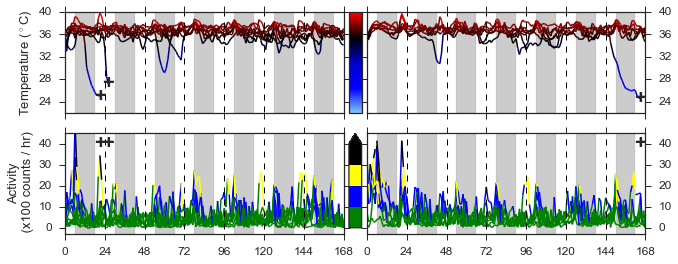

In [668]:
sns.set_context("notebook"); sns.set_style("ticks"); fig = plt.figure(figsize=(10.4, 4.4)) 
gs1 = gridspec.GridSpec(2, 3, width_ratios=[1,0.07,1], wspace=0.01)

ax0 = plt.subplot(gs1[0]);ax0.tick_params(labelsize=12)
colorline(df5A415['ZT'][0:10080], df5A415['temp'][0:10080], linewidth=1.5)
colorline(df5A416['ZT'][0:10080], df5A416['temp'][0:10080], linewidth=1.5)
colorline(df5A421['ZT'][0:10080], df5A421['temp'][0:10080], linewidth=1.5)
colorline(df5A422['ZT'][0:10080], df5A422['temp'][0:10080], linewidth=1.5)
colorline(df5A432['ZT'][0:10080], df5A432['temp'][0:10080], linewidth=1.5)
colorline(df5A439['ZT'][0:10080], df5A439['temp'][0:10080], linewidth=1.5)
colorline(df5A440['ZT'][0:10080], df5A440['temp'][0:10080], linewidth=1.5)
colorline(df5A449['ZT'][0:10080], df5A449['temp'][0:10080], linewidth=1.5)
colorline(df5A450['ZT'][0:10080], df5A450['temp'][0:10080], linewidth=1.5)
colorline(df5A451['ZT'][0:10080], df5A451['temp'][0:10080], linewidth=1.5)

plt.plot([24, 24], [20, 50], 'k--', lw=1); plt.plot([48, 48], [20, 50], 'k--', lw=1)
plt.plot([72, 72], [20, 50], 'k--', lw=1); plt.plot([96, 96], [20, 50], 'k--', lw=1)
plt.plot([120, 120], [20, 50], 'k--', lw=1); plt.plot([144, 144], [20, 50], 'k--', lw=1)
plt.ylabel('Temperature ($^\circ$C)', fontsize=13)
ax0.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax0.axvspan(6,18,color='k',alpha=0.2);ax0.axvspan(30,42,color='k',alpha=0.2);
ax0.axvspan(54,66,color='k',alpha=0.2); ax0.axvspan(78,90, color='k', alpha=0.2)
ax0.axvspan(102,114,color='k',alpha=0.2);ax0.axvspan(126,138,color='k',alpha=0.2);
ax0.axvspan(150,162,color='k',alpha=0.2); 
ax0.yaxis.set_ticks(np.arange(24.0,42.01,4.0))
ax0.set_ylim(22.0,40.0); ax0.set_xlim(0,168); ax0.xaxis.set_ticklabels([])
#ax0.set_title('KMO alb-cre - AP - Minipump - Vehicle - n=10', fontsize=14)
ax0.text(21, 25.0, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold') #A415
ax0.text(26, 27.2, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold') #A450

ax1 = plt.subplot(gs1[1])
norm = mpl.colors.Normalize(vmin=22, vmax=40)
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap, norm=norm, orientation='vertical', ticks=[20,24,28,32,36,40])
ax1.yaxis.set_ticks_position('none')
ax1.yaxis.set_ticklabels([]);ax1.tick_params(labelsize=12)
plt.subplots_adjust(bottom=0.2, wspace = 0.01)
ax1.set_position([0.504, 0.580, 0.017, 0.320]) #More Right, MoreUp, MoreWidth, More Height

ax2 = plt.subplot(gs1[2]); ax2.tick_params(labelsize=12)
colorline(df5A411['ZT'][0:10080], df5A411['temp'][0:10080], linewidth=1.5)
colorline(df5A420['ZT'][0:10080], df5A420['temp'][0:10080], linewidth=1.5)
colorline(df5A430['ZT'][0:10080], df5A430['temp'][0:10080], linewidth=1.5)
colorline(df5A431['ZT'][0:10080], df5A431['temp'][0:10080], linewidth=1.5)
colorline(df5A436['ZT'][0:10080], df5A436['temp'][0:10080], linewidth=1.5)
colorline(df5A438['ZT'][0:10080], df5A438['temp'][0:10080], linewidth=1.5)
colorline(df5A452['ZT'][0:10080], df5A452['temp'][0:10080], linewidth=1.5)
plt.plot([24, 24], [20, 50], 'k--', lw=1); plt.plot([48, 48], [20, 50], 'k--', lw=1)
plt.plot([72, 72], [20, 50], 'k--', lw=1); plt.plot([96, 96], [20, 50], 'k--', lw=1)
plt.plot([120, 120], [20, 50], 'k--', lw=1); plt.plot([144, 144], [20, 50], 'k--', lw=1)
ax2.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax2.axvspan(6,18, color='k', alpha=0.2);ax2.axvspan(30,42, color='k', alpha=0.2);
ax2.axvspan(54,66, color='k', alpha=0.2);ax2.axvspan(78,90, color='k', alpha=0.2);
ax2.axvspan(102,114, color='k', alpha=0.2);ax2.axvspan(126,138, color='k', alpha=0.2);
ax2.axvspan(150,162, color='k', alpha=0.2)
ax2.yaxis.set_ticks(np.arange(24.0, 42.01, 4.0))
ax2.set_ylim(22.0, 40.0); ax2.set_xlim(0, 168)
ax2.xaxis.set_ticklabels([]);ax2.yaxis.tick_right();ax2.yaxis.set_ticks_position('both')
#ax2.set_title('KMO alb-cre - AP - Minipump - KMOi - n=7', fontsize=14)
ax2.text(165, 24.6, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold') #A436

ax3 = plt.subplot(gs1[3]); ax3.tick_params(labelsize=12)
colorline2(df5A415['ZT'][0:10080], df5A415['actHund'][0:10080], linewidth=1.5)
colorline2(df5A416['ZT'][0:10080], df5A416['actHund'][0:10080], linewidth=1.5)
colorline2(df5A421['ZT'][0:10080], df5A421['actHund'][0:10080], linewidth=1.5)
colorline2(df5A422['ZT'][0:10080], df5A422['actHund'][0:10080], linewidth=1.5)
colorline2(df5A432['ZT'][0:10080], df5A432['actHund'][0:10080], linewidth=1.5)
colorline2(df5A439['ZT'][0:10080], df5A439['actHund'][0:10080], linewidth=1.5)
colorline2(df5A440['ZT'][0:10080], df5A440['actHund'][0:10080], linewidth=1.5)
colorline2(df5A449['ZT'][0:10080], df5A449['actHund'][0:10080], linewidth=1.5)
colorline2(df5A450['ZT'][0:10080], df5A450['actHund'][0:10080], linewidth=1.5)
colorline2(df5A451['ZT'][0:10080], df5A451['actHund'][0:10080], linewidth=1.5)

plt.plot([24, 24], [-1000, 5000], 'k--', lw=1); plt.plot([48, 48], [-1000, 5000], 'k--', lw=1)
plt.plot([72, 72], [-1000, 5000], 'k--', lw=1); plt.plot([96, 96], [-1000, 5000], 'k--', lw=1)
plt.plot([120, 120], [-1000, 5000], 'k--', lw=1); plt.plot([144, 144], [-1000, 5000], 'k--', lw=1)
plt.ylabel('Activity\n (x100 counts / hr)', fontsize=13)
ax3.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax3.axvspan(6,18,color='k',alpha=0.2);ax3.axvspan(30,42,color='k',alpha=0.2);
ax3.axvspan(54,66,color='k',alpha=0.2);ax3.axvspan(78,90, color='k', alpha=0.2);
ax3.axvspan(102,114,color='k',alpha=0.2);ax3.axvspan(126,138,color='k',alpha=0.2);
ax3.axvspan(150,162,color='k',alpha=0.2);ax3.yaxis.set_ticks(np.arange(0,50,10))
ax3.set_ylim(-3,45); ax3.set_xlim(0,168)
ax3.text(21, 40, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold') #A415
ax3.text(26, 40, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold') #A450


ax4 = plt.subplot(gs1[4])
cb2 = mpl.colorbar.ColorbarBase(ax4, cmap=cmap2, norm=norm2, 
                          orientation='vertical', ticks=[0,10,20,30,40], extend='max', extendfrac=0.12) 
ax4.yaxis.set_ticks_position('none')
ax4.yaxis.set_ticklabels([]); ax4.tick_params(labelsize=12)
ax4.set_position([0.504, 0.219, 0.017, 0.298]) #More Right, MoreUp, MoreWidth, More Height

ax5 = plt.subplot(gs1[5]); ax5.tick_params(labelsize=12)
colorline2(df5A411['ZT'][0:10080], df5A411['actHund'][0:10080], linewidth=1.5)
colorline2(df5A420['ZT'][0:10080], df5A420['actHund'][0:10080], linewidth=1.5)
colorline2(df5A430['ZT'][0:10080], df5A430['actHund'][0:10080], linewidth=1.5)
colorline2(df5A431['ZT'][0:10080], df5A431['actHund'][0:10080], linewidth=1.5)
colorline2(df5A436['ZT'][0:10080], df5A436['actHund'][0:10080], linewidth=1.5)
colorline2(df5A438['ZT'][0:10080], df5A438['actHund'][0:10080], linewidth=1.5)
colorline2(df5A452['ZT'][0:10080], df5A452['actHund'][0:10080], linewidth=1.5)
plt.plot([24, 24], [-1000, 5000], 'k--', lw=1); plt.plot([48, 48], [-1000, 5000], 'k--', lw=1)
plt.plot([72, 72], [-1000, 5000], 'k--', lw=1); plt.plot([96, 96], [-1000, 5000], 'k--', lw=1)
plt.plot([120, 120], [-1000, 5000], 'k--', lw=1); plt.plot([144, 144], [-1000, 5000], 'k--', lw=1)
ax5.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax5.axvspan(6,18,color='k',alpha=0.2);ax5.axvspan(30,42,color='k',alpha=0.2);
ax5.axvspan(54,66,color='k',alpha=0.2);ax5.axvspan(78,90, color='k', alpha=0.2)
ax5.axvspan(102,114,color='k',alpha=0.2);ax5.axvspan(126,138,color='k',alpha=0.2);
ax5.axvspan(150,162,color='k',alpha=0.2);ax5.yaxis.set_ticks(np.arange(0,50,10))
ax5.set_ylim(-3,45); ax5.set_xlim(0,168); 
ax5.yaxis.tick_right();ax5.yaxis.set_ticks_position('both')
ax5.text(165, 40, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold') #A436
plt.savefig('7day_04jan18_Minipump.png', dpi=1000)
plt.show()